# Dog Breed recognition TFM

Francisco Florido Valero

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #interacting with the operating system
import gc #optional garbage collector
import tensorflow as tf #end-to-end open source platform for machine learning
#keras and tensor flow modules used for the DL model and preprocessing
from keras import Sequential 
from keras.layers import Dense,Dropout, Flatten, BatchNormalization,Activation 
from keras.layers import Lambda, Input, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# matplotlib to plot images and visualizations 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.autonotebook import tqdm

#train test split module from sklearn
from sklearn.model_selection import train_test_split





<ipython-input-2-0180c2df2a86>:21: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
path = 'D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/'
train_dir = os.path.join(path, "Train_images/")
test_dir = os.path.join(path, "Test_images/")
not_train_path = os.path.join(path,"not_train/")
labels_train_path = os.path.join(path, "Dog_Breed_trainingdata.csv")
labels_test_path = os.path.join(path, "Dog_Breed_testdata_sorted.csv")
mapping_test_path = os.path.join(path, "Dog_Breed_id_mapping.csv")

In [4]:
print(path)

print(test_dir)

D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/
D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/Test_images/


## 1- Exploring the data

In [4]:
train_df = pd.read_csv(labels_train_path)
df_idMapping = pd.read_csv(mapping_test_path)


In [5]:
display(train_df.head(3))

pet_id               breed                                         color  \
0  21425781  Labrador Retriever  White - with Red, Golden, Orange or Chestnut   
1  25425678     Black Mouth Cur                               Tan/Yellow/Fawn   
2  21571324  Labrador Retriever                               Brown/Chocolate   

  sex    age                         size hair_length special_needs_p  \
0   f  adult    Med. 26-60 lbs (12-27 kg)         NaN               f   
1   f  adult  Large 61-100 lbs (28-45 kg)         NaN             NaN   
2   m  young    Med. 26-60 lbs (12-27 kg)         NaN               f   

  purebred_p shots_current_p housetrained_p declawed_p good_with_kids_p  \
0          f               t              f        NaN                f   
1          f             NaN            NaN        NaN              NaN   
2          f               t              t        NaN                f   

  good_with_dogs_p good_with_cats_p spayed_neutered_p  
0                t              NaN                 t  
1              NaN              NaN                 t  
2                t                t                 t

In [6]:
mask = train_df['pet_id'] == 1183215
display(train_df[mask])

pet_id           breed color sex    age                       size  \
50666  1183215  Siberian Husky   NaN   m  young  Med. 26-60 lbs (12-27 kg)   

      hair_length special_needs_p purebred_p shots_current_p housetrained_p  \
50666      medium               f          t               t              t   

      declawed_p good_with_kids_p good_with_dogs_p good_with_cats_p  \
50666        NaN                t                t              NaN   

      spayed_neutered_p  
50666                 t

In [7]:
display(df_idMapping.head(8))

breed  breed_id
0        Affenpinscher         1
1         Afghan Hound         2
2     Airedale Terrier         3
3               Akbash         4
4                Akita         5
5     Alaskan Malamute         6
6     American Bulldog         7
7  American Eskimo Dog         8

In [8]:
mask = df_idMapping['breed'] == 'Labrador Retriever'
df_idMapping[mask]

breed  breed_id
122  Labrador Retriever       123

In [9]:
df_idMapping.shape

(218, 2)

As we can appreciate there is 218 breeds of dogs to be classified

In [10]:
train_df = pd.merge(train_df, df_idMapping, on='breed', how='left')

In [11]:
display(train_df.head())

pet_id                      breed  \
0  21425781         Labrador Retriever   
1  25425678            Black Mouth Cur   
2  21571324         Labrador Retriever   
3  25526487          Doberman Pinscher   
4  25946457  American Pit Bull Terrier   

                                          color sex    age  \
0  White - with Red, Golden, Orange or Chestnut   f  adult   
1                               Tan/Yellow/Fawn   f  adult   
2                               Brown/Chocolate   m  young   
3              Black - with Tan, Yellow or Fawn   m  adult   
4                               Brown/Chocolate   m  puppy   

                           size hair_length special_needs_p purebred_p  \
0     Med. 26-60 lbs (12-27 kg)         NaN               f          f   
1   Large 61-100 lbs (28-45 kg)         NaN             NaN          f   
2     Med. 26-60 lbs (12-27 kg)         NaN               f          f   
3   Large 61-100 lbs (28-45 kg)         NaN               f          f   
4  Small 25 lbs (11 kg) or less         NaN             NaN          f   

  shots_current_p housetrained_p declawed_p good_with_kids_p good_with_dogs_p  \
0               t              f        NaN                f                t   
1             NaN            NaN        NaN              NaN              NaN   
2               t              t        NaN                f                t   
3               t              t        NaN                t              NaN   
4             NaN            NaN        NaN              NaN              NaN   

  good_with_cats_p spayed_neutered_p  breed_id  
0              NaN                 t     123.0  
1              NaN                 t      29.0  
2                t                 t     123.0  
3                f                 t      71.0  
4              NaN                 f      10.0

In [12]:
display(train_df.head())

pet_id                      breed  \
0  21425781         Labrador Retriever   
1  25425678            Black Mouth Cur   
2  21571324         Labrador Retriever   
3  25526487          Doberman Pinscher   
4  25946457  American Pit Bull Terrier   

                                          color sex    age  \
0  White - with Red, Golden, Orange or Chestnut   f  adult   
1                               Tan/Yellow/Fawn   f  adult   
2                               Brown/Chocolate   m  young   
3              Black - with Tan, Yellow or Fawn   m  adult   
4                               Brown/Chocolate   m  puppy   

                           size hair_length special_needs_p purebred_p  \
0     Med. 26-60 lbs (12-27 kg)         NaN               f          f   
1   Large 61-100 lbs (28-45 kg)         NaN             NaN          f   
2     Med. 26-60 lbs (12-27 kg)         NaN               f          f   
3   Large 61-100 lbs (28-45 kg)         NaN               f          f   
4  Small 25 lbs (11 kg) or less         NaN             NaN          f   

  shots_current_p housetrained_p declawed_p good_with_kids_p good_with_dogs_p  \
0               t              f        NaN                f                t   
1             NaN            NaN        NaN              NaN              NaN   
2               t              t        NaN                f                t   
3               t              t        NaN                t              NaN   
4             NaN            NaN        NaN              NaN              NaN   

  good_with_cats_p spayed_neutered_p  breed_id  
0              NaN                 t     123.0  
1              NaN                 t      29.0  
2                t                 t     123.0  
3                f                 t      71.0  
4              NaN                 f      10.0

In [13]:
mask = train_df['pet_id'] == '1183215.jpg'
train_df[mask]

Empty DataFrame
Columns: [pet_id, breed, color, sex, age, size, hair_length, special_needs_p, purebred_p, shots_current_p, housetrained_p, declawed_p, good_with_kids_p, good_with_dogs_p, good_with_cats_p, spayed_neutered_p, breed_id]
Index: []

In [14]:
train_df['pet_id'] = train_df['pet_id'].astype(str)
train_df['pet_id'] = train_df['pet_id'].map(lambda x: x+'.jpg')
cols_needed = ['pet_id','breed_id', 'breed']
train_df = train_df[cols_needed]
display(train_df.head(10))
#train_df['breed_id'] = train_df['breed_id'].astype(int)

pet_id  breed_id                      breed
0  21425781.jpg     123.0         Labrador Retriever
1  25425678.jpg      29.0            Black Mouth Cur
2  21571324.jpg     123.0         Labrador Retriever
3  25526487.jpg      71.0          Doberman Pinscher
4  25946457.jpg      10.0  American Pit Bull Terrier
5  25163724.jpg     207.0   Treeing Walker Coonhound
6  22589814.jpg     123.0         Labrador Retriever
7  24529399.jpg     154.0           Pit Bull Terrier
8  25692400.jpg      10.0  American Pit Bull Terrier
9  24842214.jpg      24.0           Belgian Malinois

In [15]:
display(train_df.head(5))
print(len(train_df))

pet_id  breed_id                      breed
0  21425781.jpg     123.0         Labrador Retriever
1  25425678.jpg      29.0            Black Mouth Cur
2  21571324.jpg     123.0         Labrador Retriever
3  25526487.jpg      71.0          Doberman Pinscher
4  25946457.jpg      10.0  American Pit Bull Terrier

65499


In [16]:
train_df.isna().sum()

pet_id       0
breed_id    41
breed        0
dtype: int64

In [17]:
train_df = train_df.dropna(axis=0, how='any')
print(len(train_df))

65458


In [18]:
train_df.isna().sum()

pet_id      0
breed_id    0
breed       0
dtype: int64

In [19]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65458 entries, 0 to 65498
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pet_id    65458 non-null  object 
 1   breed_id  65458 non-null  float64
 2   breed     65458 non-null  object 
dtypes: float64(1), object(2)
memory usage: 2.0+ MB


In [20]:
display(df_idMapping.head(5))

breed  breed_id
0     Affenpinscher         1
1      Afghan Hound         2
2  Airedale Terrier         3
3            Akbash         4
4             Akita         5

In [21]:
#train_df = pd.merge(train_df, df_idMapping, on='breed_id', how= 'left')

In [22]:
display(train_df.head(5))

pet_id  breed_id                      breed
0  21425781.jpg     123.0         Labrador Retriever
1  25425678.jpg      29.0            Black Mouth Cur
2  21571324.jpg     123.0         Labrador Retriever
3  25526487.jpg      71.0          Doberman Pinscher
4  25946457.jpg      10.0  American Pit Bull Terrier

In [23]:
train_df.isna().sum()

pet_id      0
breed_id    0
breed       0
dtype: int64

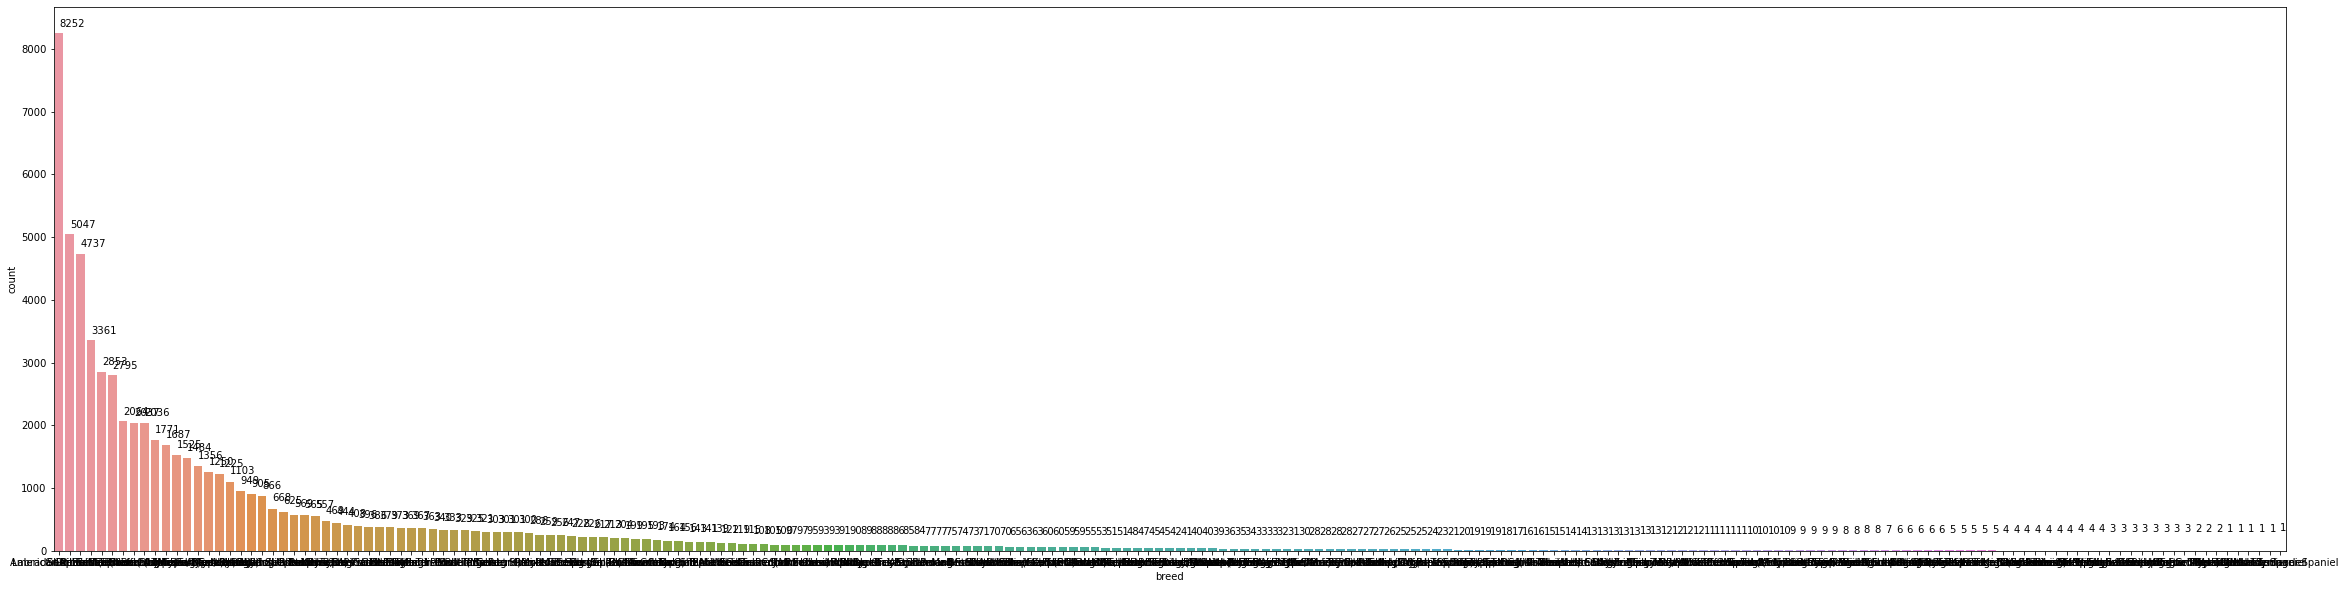

In [24]:
#Potting the categorical ratio

#function to plot bar height information

def barh(ax):
    
    for p in ax.patches:
        val = p.get_height() #height of the bar
        x = p.get_x()+ p.get_width()/2 # x- position 
        y = p.get_x()+ p.get_height()+100 #y-position
        ax.annotate(round(val,2),(x,y))
    
#Plotting the class distribution in a descending order

plt.figure(figsize = (40,10))
ax0 =sns.countplot(x=train_df['breed'],order=train_df['breed'].value_counts().index )
barh(ax0)
plt.show()   

In [25]:
from plotly.express import pie

class_val = pd.DataFrame(train_df['breed'].value_counts())
print(class_val)

fig = pie(class_val,values ='breed', names = list(class_val.index), title = 'Image Class distribution ')
fig.show()

                           breed
Labrador Retriever          8252
American Pit Bull Terrier   5047
Chihuahua                   4737
Pit Bull Terrier            3361
German Shepherd Dog         2853
...                          ...
Glen of Imaal Terrier          1
Otterhound                     1
English Toy Spaniel            1
Munsterlander                  1
Welsh Springer Spaniel         1

[209 rows x 1 columns]


In [26]:
mask = train_df['breed'].value_counts() == 1
mask[mask]

Afghan Hound              True
Glen of Imaal Terrier     True
Otterhound                True
English Toy Spaniel       True
Munsterlander             True
Welsh Springer Spaniel    True
Name: breed, dtype: bool

In [27]:
breeds = ['English Toy Spaniel', 'Welsh Springer Spaniel', 'Glen of Imaal Terrier', 'Afghan Hound', 'Otterhound', 'Munsterlander']
mask = train_df['breed'].isin(breeds)
train_df[mask]

pet_id  breed_id                   breed
4984   19654247.jpg       2.0            Afghan Hound
14334  21663031.jpg     138.0           Munsterlander
24307  25055282.jpg      83.0     English Toy Spaniel
28480  19616456.jpg      99.0   Glen of Imaal Terrier
36652  21288315.jpg     211.0  Welsh Springer Spaniel
55780  25957069.jpg     146.0              Otterhound

In [28]:
data_to_append = {'pet_id': ['000001.jpg', '000002.jpg', '000003.jpg', '000004.jpg', '000005.jpg', 
                             '000006.jpg', '000007.jpg', '000008.jpg', '000009.jpg', '0000010.jpg',
                             '0000011.jpg', '0000012.jpg', '0000013.jpg', '0000014.jpg', '0000015.jpg',
                             '0000016.jpg', '0000017.jpg', '0000018.jpg', '0000019.jpg', '0000020.jpg',
                             '0000021.jpg', '0000022.jpg', '0000023.jpg', '0000024.jpg', '0000025.jpg',
                             '0000026.jpg', '0000027.jpg', '0000028.jpg', '0000029.jpg', '0000030.jpg'],
                  'breed_id': [83.0, 83.0, 83.0, 83.0, 83.0,
                               211.0, 211.0, 211.0, 211.0, 211.0,
                               99.0, 99.0, 99.0, 99.0, 99.0,
                               2.0, 2.0, 2.0, 2.0, 2.0,
                               146.0, 146.0, 146.0, 146.0, 146.0,
                               138.0, 138.0, 138.0, 138.0, 138.0],
                  'breed': ['English Toy Spaniel', 'English Toy Spaniel', 'English Toy Spaniel', 'English Toy Spaniel', 'English Toy Spaniel',
                            'Welsh Springer Spaniel', 'Welsh Springer Spaniel', 'Welsh Springer Spaniel', 'Welsh Springer Spaniel', 'Welsh Springer Spaniel',
                            'Glen of Imaal Terrier', 'Glen of Imaal Terrier', 'Glen of Imaal Terrier', 'Glen of Imaal Terrier', 'Glen of Imaal Terrier',
                            'Afghan Hound', 'Afghan Hound', 'Afghan Hound', 'Afghan Hound', 'Afghan Hound',
                            'Otterhound', 'Otterhound', 'Otterhound', 'Otterhound', 'Otterhound',
                            'Munsterlander', 'Munsterlander', 'Munsterlander', 'Munsterlander', 'Munsterlander']}

df_append = pd.DataFrame(data_to_append)
#train_df = train_df.append(data_to_append, ignore_index = True)

In [29]:
df_append

pet_id  breed_id                   breed
0    000001.jpg      83.0     English Toy Spaniel
1    000002.jpg      83.0     English Toy Spaniel
2    000003.jpg      83.0     English Toy Spaniel
3    000004.jpg      83.0     English Toy Spaniel
4    000005.jpg      83.0     English Toy Spaniel
5    000006.jpg     211.0  Welsh Springer Spaniel
6    000007.jpg     211.0  Welsh Springer Spaniel
7    000008.jpg     211.0  Welsh Springer Spaniel
8    000009.jpg     211.0  Welsh Springer Spaniel
9   0000010.jpg     211.0  Welsh Springer Spaniel
10  0000011.jpg      99.0   Glen of Imaal Terrier
11  0000012.jpg      99.0   Glen of Imaal Terrier
12  0000013.jpg      99.0   Glen of Imaal Terrier
13  0000014.jpg      99.0   Glen of Imaal Terrier
14  0000015.jpg      99.0   Glen of Imaal Terrier
15  0000016.jpg       2.0            Afghan Hound
16  0000017.jpg       2.0            Afghan Hound
17  0000018.jpg       2.0            Afghan Hound
18  0000019.jpg       2.0            Afghan Hound
19  0000020.jpg       2.0            Afghan Hound
20  0000021.jpg     146.0              Otterhound
21  0000022.jpg     146.0              Otterhound
22  0000023.jpg     146.0              Otterhound
23  0000024.jpg     146.0              Otterhound
24  0000025.jpg     146.0              Otterhound
25  0000026.jpg     138.0           Munsterlander
26  0000027.jpg     138.0           Munsterlander
27  0000028.jpg     138.0           Munsterlander
28  0000029.jpg     138.0           Munsterlander
29  0000030.jpg     138.0           Munsterlander

We have these clases with just 1 picture of each we can either eliminate them or download more pictures of them. We are going to get some more pictures of these clases.

In [30]:
train_df = train_df.append(df_append)

In [31]:
train_df.tail()

pet_id  breed_id          breed
25  0000026.jpg     138.0  Munsterlander
26  0000027.jpg     138.0  Munsterlander
27  0000028.jpg     138.0  Munsterlander
28  0000029.jpg     138.0  Munsterlander
29  0000030.jpg     138.0  Munsterlander

# Adding more images through web scrapping

First we are going to check which classes have less than 200 images

In [32]:

mask = train_df.groupby('breed').count()


In [33]:
mask

pet_id  breed_id
breed                                            
Affenpinscher                        23        23
Afghan Hound                          6         6
Airedale Terrier                     30        30
Akbash                               15        15
Akita                               139       139
...                                 ...       ...
Whippet                              89        89
Wirehaired Fox Terrier               60        60
Wirehaired Pointing Griffon           3         3
Xoloitzcuintle/Mexican Hairless      12        12
Yorkie, Yorkshire Terrier           396       396

[209 rows x 2 columns]

In [34]:
list_less_than_hundred = mask[mask.breed_id<100]

In [35]:
list_less_than_hundred = list_less_than_hundred.index.unique().tolist()

In [36]:
#list_less_than_hundred[45]

In [37]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import os
import json
import urllib
import sys
import time
import bs4
import requests

def download_image(url, folder_name, num):
    timeStarted = time.time()
    # write image to file
    reponse = requests.get(url)
    if reponse.status_code==200:
        with open(os.path.join(folder_name, str(num)+".jpg"), 'wb') as file:
            file.write(reponse.content)

def search_images_new():
    download_path = 'D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/added_image'
    for searchtext in list_less_than_hundred:
        #searchtext = 'English_Sheepdog'
        folder_name = os.path.join(download_path + searchtext.replace(" ", "_"))
        print(folder_name)
        
        if not os.path.exists(download_path + searchtext.replace(" ", "_")):
                os.makedirs(download_path + searchtext.replace(" ", "_"))


        url = "https://www.google.co.in/search?q="+searchtext+"&source=lnms&tbm=isch"
        driver_path = 'D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/driver/chromedriver_win32/chromedriver.exe'
        driver = webdriver.Chrome(driver_path)
        driver.get(url)


        #Scrolling all the way up
        #driver.execute_script("window.scrollTo(0, 0);")
        for _ in range(2):
            for __ in range(10):
                # multiple scrolls needed to show all 400 images
                driver.execute_script("window.scrollBy(0, 1000000)")
                time.sleep(0.2)
            # to load next 400 images
            time.sleep(0.5)

        page_html = driver.page_source
        pageSoup = bs4.BeautifulSoup(page_html, 'html.parser')
        containers = pageSoup.findAll('div', {'class':"isv-r PNCib MSM1fd BUooTd"} )

        print(len(containers))

        len_containers = len(containers)

        for i in range(1, 101):
            if i % 25 == 0:
                continue

            xPath = """//*[@id="islrg"]/div[1]/div[%s]"""%(i)

            previewImageXPath = """//*[@id="islrg"]/div[1]/div[%s]/a[1]/div[1]/img"""%(i)
            previewImageElement = driver.find_element_by_xpath(previewImageXPath)
            previewImageURL = previewImageElement.get_attribute("src")
            #print("preview URL", previewImageURL)


            #print(xPath)


            driver.find_element_by_xpath(xPath).click()
            #time.sleep(3)

            timeStarted = time.time()
            while True:

                imageElement = driver.find_element_by_xpath("""//*[@id="Sva75c"]/div/div/div[3]/div[2]/c-wiz/div/div[1]/div[1]/div[2]/div[1]/a/img""")
                imageURL= imageElement.get_attribute('src')

                if imageURL != previewImageURL:
                    #print("actual URL", imageURL)
                    break

                else:
                    #making a timeout if the full res image can't be loaded
                    currentTime = time.time()

                    if currentTime - timeStarted > 10:
                        print("Timeout! Will download a lower resolution image and move onto the next one")
                        break


            #Downloading image
            try:
                download_image(imageURL, folder_name, i)
                print("Downloaded element %s out of %s total. URL: %s" % (i, len_containers + 1, imageURL))
            except:
                print("Couldn't download an image %s, continuing downloading the next one"%(i))



In [38]:
search_images_new()

D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/added_imageAffenpinscher


<ipython-input-37-7e2c091b9d51>:32: DeprecationWarning:

executable_path has been deprecated, please pass in a Service object



400


<ipython-input-37-7e2c091b9d51>:61: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

<ipython-input-37-7e2c091b9d51>:69: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead

<ipython-input-37-7e2c091b9d51>:75: DeprecationWarning:

find_element_by_* commands are deprecated. Please use find_element() instead



Downloaded element 1 out of 401 total. URL: https://www.purina.es/sites/default/files/styles/nppe_breed_selector_500/public/breed_library/affenpinscher.jpg?itok=pbPSr0kh
Timeout! Will download a lower resolution image and move onto the next one
Couldn't download an image 2, continuing downloading the next one
Downloaded element 3 out of 401 total. URL: https://www.dogbible.com/i/es/affenpinscher-temperamento.png
Couldn't download an image 4, continuing downloading the next one
Downloaded element 5 out of 401 total. URL: https://t2.ea.ltmcdn.com/es/razas/0/5/6/perro-affenpinscher_650_0_600.jpg
Downloaded element 6 out of 401 total. URL: https://estaticos.muyinteresante.es/media/cache/760x570_thumb/uploads/images/article/591a1bb25bafe85bc028bdda/affenpinscher_0.jpg
Downloaded element 7 out of 401 total. URL: https://cdn.wamiz.fr/cdn-cgi/image/quality=80,width=460,height=600,fit=cover/animal/breed/pictures/613f5a2af00db702175761.jpg
Downloaded element 8 out of 401 total. URL: https://www.

NoSuchWindowException: Message: no such window: target window already closed
from unknown error: web view not found
  (Session info: chrome=97.0.4692.71)
Stacktrace:
Backtrace:
	Ordinal0 [0x00AC6903+2517251]
	Ordinal0 [0x00A5F8E1+2095329]
	Ordinal0 [0x00962848+1058888]
	Ordinal0 [0x0094BF90+966544]
	Ordinal0 [0x009A8999+1345945]
	Ordinal0 [0x009B5342+1397570]
	Ordinal0 [0x009A639B+1336219]
	Ordinal0 [0x009827A7+1189799]
	Ordinal0 [0x00983609+1193481]
	GetHandleVerifier [0x00C55904+1577972]
	GetHandleVerifier [0x00D00B97+2279047]
	GetHandleVerifier [0x00B56D09+534521]
	GetHandleVerifier [0x00B55DB9+530601]
	Ordinal0 [0x00A64FF9+2117625]
	Ordinal0 [0x00A698A8+2136232]
	Ordinal0 [0x00A699E2+2136546]
	Ordinal0 [0x00A73541+2176321]
	BaseThreadInitThunk [0x75CDFA29+25]
	RtlGetAppContainerNamedObjectPath [0x77927A9E+286]
	RtlGetAppContainerNamedObjectPath [0x77927A6E+238]


# RENAMING AND IMPORTING THE NEW IMAGES IN train_df

### get the downloaded folders

In [55]:
return ("Value Error")

SyntaxError: 'return' outside function (<ipython-input-55-7681e5504109>, line 1)

In [39]:
path = 'D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/'
folders = os.listdir(path)

In [40]:
folders

['added_imageAffenpinscher',
 'added_imageAfghan_Hound',
 'added_imageAiredale_Terrier',
 'added_imageAkbash',
 'added_imageAlaskan_Malamute',
 'added_imageAmerican_Eskimo_Dog',
 'added_imageAmerican_Hairless_Terrier',
 'added_imageAustralian_Kelpie',
 'added_imageAustralian_Terrier',
 'added_imageBasenji',
 'added_imageBearded_Collie',
 'added_imageBeauceron',
 'added_imageBelgian_Shepherd',
 'added_imageBernese_Mountain_Dog',
 'added_imageBichon_Frise',
 'added_imageBloodhound',
 'added_imageBluetick_Coonhound',
 'added_imageBlue_Lacy',
 'added_imageBorzoi',
 'added_imageBouvier_des_Flandres',
 'added_imageBoykin_Spaniel',
 'added_imageBrittany_dog',
 'added_imageBrussels_Griffon',
 'added_imageBulldog',
 'added_imageBullmastiff',
 'added_imageCanaan_Dog',
 'added_imageCane_Corso',
 'added_imageCardigan_Welsh_Corgi',
 'added_imageCarolina_Dog',
 'added_imageCavalier_King_Charles_Spaniel',
 'added_imageChesapeake_Bay_Retriever',
 'added_imageChinese_Crested',
 'added_imageClumber_Span

In [41]:
len(folders)

161

In [47]:
folders[1]

'added_imageAfghan_Hound'

#### renaming images

In [ ]:
i = 0
for breed in folders[:139]:
    i += 1
    folder = path + breed
    for count, filename in enumerate(os.listdir(folder)):
        dst = f"{str(i)}000{str(i)}0000{str(count)}.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"

        # rename() function will
        # rename all the files
        os.rename(src, dst)

In [54]:
    folder = path + folders[2]
    for count, filename in enumerate(os.listdir(folder)):
        1000100000
        dst = f"3000100{str(count)}00.jpg"
        src =f"{folder}/{filename}"  # foldername/filename, if .py file is outside folder
        dst =f"{folder}/{dst}"
         
        # rename() function will
        # rename all the files
        os.rename(src, dst)

In [62]:
folders[0:2]

['added_imageAffenpinscher', 'added_imageAfghan_Hound']

### add images to df

In [63]:
i = 0
pet_id = []
breed_list = []
import re
for breed in folders[0:2]:
    i += 1
    folder = path + breed
    name = breed.split('_')
    print(name)
    if len(name) > 2:
        typ = ' '+breed.split('_')[2]
    else:
        typ = ''
    name = breed.split('_')[1]
    breed_name = re.findall('[A-Z][^A-Z]*', name)
    for count, filename in enumerate(os.listdir(folder)):
        print(str(filename) + str(breed_name[0])+str(typ))
        pet_id.append(str(filename))
        breed_list.append(str(breed_name[0])+str(typ))
        

['added', 'imageAffenpinscher']
1000100000.jpgAffenpinscher
1000100100.jpgAffenpinscher
10001001000.jpgAffenpinscher
100010010000.jpgAffenpinscher
100010010100.jpgAffenpinscher
100010010200.jpgAffenpinscher
100010010300.jpgAffenpinscher
100010010400.jpgAffenpinscher
100010010500.jpgAffenpinscher
100010010600.jpgAffenpinscher
100010010700.jpgAffenpinscher
100010010800.jpgAffenpinscher
100010010900.jpgAffenpinscher
10001001100.jpgAffenpinscher
100010011000.jpgAffenpinscher
100010011100.jpgAffenpinscher
100010011200.jpgAffenpinscher
100010011300.jpgAffenpinscher
100010011400.jpgAffenpinscher
100010011500.jpgAffenpinscher
100010011600.jpgAffenpinscher
100010011700.jpgAffenpinscher
100010011800.jpgAffenpinscher
100010011900.jpgAffenpinscher
10001001200.jpgAffenpinscher
100010012000.jpgAffenpinscher
100010012100.jpgAffenpinscher
100010012200.jpgAffenpinscher
100010012300.jpgAffenpinscher
100010012400.jpgAffenpinscher
100010012500.jpgAffenpinscher
100010012600.jpgAffenpinscher
100010012700.jp

In [ ]:
import re
re.findall('[A-Z][^A-Z]*', folders[0])

In [64]:
added_df = pd.DataFrame(
    {'pet_id': pet_id,
     'breed': breed_list,
    })

In [ ]:
added_df

In [65]:
list_in_train = train_df['breed'].unique().tolist()
list_in_added = added_df['breed'].unique().tolist()

In [66]:
not_in = []
for breed in list_in_added:
    if breed not in list_in_train:
        not_in.append(breed)

In [67]:
not_in

[]

In [ ]:
list_in_train.sort()
print(list_in_train)

In [ ]:
len(list_in_train)

In [ ]:
mask = added_df['breed'] == 'oloitzcuintle/Mexican Hairless'
added_df.loc[mask,'breed'] = 'Xoloitzcuintle/Mexican Hairless'
mask1 = added_df['breed'] == 'Smooth Fox'
added_df.loc[mask1,'breed'] = 'Smooth Fox Terrier'
mask2 = added_df['breed'] == 'Spitz (Unknown'
added_df.loc[mask2,'breed'] = 'Spitz (Unknown Type, Small)'
mask3 = added_df['breed'] == 'Toy Fox'
added_df.loc[mask3,'breed'] = 'Toy Fox Terrier'
mask5 = added_df['breed'] == 'Welsh Springer'
added_df.loc[mask5,'breed'] = 'Welsh Springer Spaniel'
mask6 = added_df['breed'] == 'Westie, West'
added_df.loc[mask6,'breed'] = 'Westie, West Highland White Terrier'
mask7 = added_df['breed'] == 'Wirehaired Fox'
added_df.loc[mask7,'breed'] = 'Wirehaired Fox Terrier'
mask8 = added_df['breed'] == 'Wirehaired Pointing'
added_df.loc[mask8,'breed'] = 'Wirehaired Pointing Griffon'
mask9 = added_df['breed'] == 'Xoloitzcuintle'
added_df.loc[mask9,'breed'] = 'oloitzcuintle/Mexican Hairless'

In [ ]:
mask = added_df['breed'] == 'Brittanydog'
added_df.loc[mask,'breed'] = 'Brittany'
mask1 = added_df['breed'] == 'BrusselsGriffon'
added_df.loc[mask1,'breed'] = 'Brussels Griffon'
mask2 = added_df['breed'] == 'CanaanDog'
added_df.loc[mask2,'breed'] = 'Canaan Dog'
mask3 = added_df['breed'] == 'CaneCorso'
added_df.loc[mask3,'breed'] = 'Cane Corso'
mask5 = added_df['breed'] == 'CardiganWelsh'
added_df.loc[mask5,'breed'] = 'Cardigan Welsh Corgi'
mask6 = added_df['breed'] == 'AustralianKelpie'
added_df.loc[mask6,'breed'] = 'Australian Kelpie'
mask7 = added_df['breed'] == 'AustralianTerrier'
added_df.loc[mask7,'breed'] = 'Australian Terrier'
mask8 = added_df['breed'] == 'BeardedCollie'
added_df.loc[mask8,'breed'] = 'Bearded Collie'
mask9 = added_df['breed'] == 'BelgianShepherd'
added_df.loc[mask9,'breed'] = 'Belgian Shepherd'
mask10 = added_df['breed'] == 'BerneseMountain'
added_df.loc[mask10,'breed'] = 'Bernese Mountain Dog'
mask11 = added_df['breed'] == 'BichonFrise'
added_df.loc[mask11,'breed'] = 'Bichon Frise'
mask12 = added_df['breed'] == 'BluetickCoonhound'
added_df.loc[mask12,'breed'] = 'Bluetick Coonhound'
mask13 = added_df['breed'] == 'BlueLacy'
added_df.loc[mask13,'breed'] = 'Blue Lacy/Texas Lacy'
mask14 = added_df['breed'] == 'Bouvierdes'
added_df.loc[mask14,'breed'] = 'Bouvier des Flandres'
mask15 = added_df['breed'] == 'BoykinSpaniel'
added_df.loc[mask15,'breed'] = 'Boykin Spaniel'

In [ ]:
added_df.to_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/adedd_df.csv')

In [194]:
added_df = pd.read_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/adedd_df.csv')

In [192]:
added_df_2 = added_df.copy()

In [195]:
added_df

Unnamed: 0             pet_id                            breed
0               0     1000100000.jpg                    Affenpinscher
1               1     1000100001.jpg                    Affenpinscher
2               2    10001000010.jpg                    Affenpinscher
3               3   100010000100.jpg                    Affenpinscher
4               4   100010000101.jpg                    Affenpinscher
...           ...                ...                              ...
12543       12543   251210000900.jpg  Xoloitzcuintle/Mexican Hairless
12544       12544  2512100009000.jpg  Xoloitzcuintle/Mexican Hairless
12545       12545  2512100009100.jpg  Xoloitzcuintle/Mexican Hairless
12546       12546  2512100009200.jpg  Xoloitzcuintle/Mexican Hairless
12547       12547  2512100009300.jpg  Xoloitzcuintle/Mexican Hairless

[12548 rows x 3 columns]

In [ ]:
df_idMapping

In [78]:
added_df_merged = pd.merge(added_df,df_idMapping, on=['breed'])

In [196]:
added_all = added_df.append(added_df_merged)

In [222]:
train_df = train_df.append(added_all)

In [342]:
train_df.to_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_with_added_images.csv', index=False)

In [387]:
train_df = pd.read_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_with_added_images.csv')

In [388]:
train_df

pet_id  breed_id                      breed  Unnamed: 0
0         21425781.jpg     123.0         Labrador Retriever         NaN
1         25425678.jpg      29.0            Black Mouth Cur         NaN
2         21571324.jpg     123.0         Labrador Retriever         NaN
3         25526487.jpg      71.0          Doberman Pinscher         NaN
4         25946457.jpg      10.0  American Pit Bull Terrier         NaN
...                ...       ...                        ...         ...
91935  20001009500.jpg       2.0               Afghan Hound         NaN
91936  20001009600.jpg       2.0               Afghan Hound         NaN
91937  20001009700.jpg       2.0               Afghan Hound         NaN
91938  20001009800.jpg       2.0               Afghan Hound         NaN
91939  20001009900.jpg       2.0               Afghan Hound         NaN

[91940 rows x 4 columns]

In [389]:
mask = train_df.groupby('breed').count()
display(mask)

pet_id  breed_id  Unnamed: 0
breed                                                        
Affenpinscher                      1083       767         316
Afghan Hound                        924       618         306
Airedale Terrier                    300        30         270
Akbash                              269        15         254
Akita                               139       139           0
...                                 ...       ...         ...
Whippet                             273        89         184
Wirehaired Fox Terrier              250        60         190
Wirehaired Pointing Griffon         187         3         184
Xoloitzcuintle/Mexican Hairless     200        12         188
Yorkie, Yorkshire Terrier           396       396           0

[210 rows x 3 columns]

In [396]:
train_dir

'D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/Train_images/*'

In [404]:
from glob import glob
ids = glob(train_dir)
print(ids)
labels = []
image_id_original_list = []
import re
lista_imagenes_en_dir = []

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [405]:
for image_id in ids:
    #getting picture name without .jpg
    image_id_original = image_id
    image_id = image_id.split("/")[-1]
    image_id = re.sub('[^a-zA-Z0-9 \n\.]', '/', image_id)
    image_id = image_id.split("/")[-1]
    print(image_id)
    #image_id = image_id.translate({ord(c): " " for c in "!@#$%^&*()[]{};:,./<>?\|`~-=_+"})
    #image_id = image_id.split(" ")[-1]
    #print(image_id)
    lista_imagenes_en_dir.append(str(image_id))
    
    '''
    try:
        breed_name = list(train_df[train_df['pet_id'] == image_id]['breed'])[0]
        print(breed_name)
        #breed_idx = breed2id[breed_name]
        #print(breed_idx)
        #labels.append(breed_idx)
    except:
        print(image_id_original)
        # move the images which id doesnt appear in dataset so that they are not used to be trained
        #shutil.move(image_id_original,not_train_path)
        image_id_original_list.append(image_id_original)
        pass
    '''

000001.jpg
0000010.jpg
0000011.jpg
0000012.jpg
0000013.jpg
0000014.jpg
0000015.jpg
0000016.jpg
0000017.jpg
0000018.jpg
0000019.jpg
000002.jpg
0000020.jpg
0000021.jpg
0000022.jpg
0000023.jpg
0000024.jpg
0000025.jpg
0000026.jpg
0000027.jpg
0000028.jpg
0000029.jpg
000003.jpg
0000030.jpg
000004.jpg
000005.jpg
000006.jpg
000007.jpg
000008.jpg
000009.jpg
1.jpg
10.jpg
10000010000000.jpg
10000010000001.jpg
100000100000010.jpg
100000100000011.jpg
100000100000012.jpg
100000100000013.jpg
100000100000014.jpg
100000100000015.jpg
100000100000016.jpg
100000100000017.jpg
100000100000018.jpg
100000100000019.jpg
10000010000002.jpg
100000100000020.jpg
100000100000021.jpg
100000100000022.jpg
100000100000023.jpg
100000100000024.jpg
100000100000025.jpg
100000100000026.jpg
100000100000027.jpg
100000100000028.jpg
100000100000029.jpg
10000010000003.jpg
100000100000030.jpg
100000100000031.jpg
100000100000032.jpg
100000100000033.jpg
100000100000034.jpg
100000100000035.jpg
100000100000036.jpg
100000100000037.jpg


In [403]:
len(image_id_original_list)

174

In [406]:
len(lista_imagenes_en_dir)

73958

In [412]:
len(lista_imagenes_en_dataset)

15641

In [421]:
lista_imagenes_en_dataset = train_df['pet_id'].unique().tolist()

In [422]:
lista_imagenes_en_dataset[0]

'21425781.jpg'

In [423]:
lista_de_fotos_que_no_estan = [i for i in lista_imagenes_en_dataset if i not in lista_imagenes_en_dir]

In [424]:
len(lista_de_fotos_que_no_estan)

4703

In [417]:
train_df_100

pet_id                           breed breed_id  \
19571  133000133000051.jpg          Welsh Springer Spaniel      211   
9909          25926978.jpg              Anatolian Shepherd       13   
13239    6400064000063.jpg                         Harrier      107   
1536          25492672.jpg        Retriever (Unknown Type)      168   
15294    6100061000058.jpg                    Goldendoodle      101   
...                    ...                             ...      ...   
6909          25173122.jpg             Mixed Breed (Small)      136   
7274          25781646.jpg          Spaniel (Unknown Type)      189   
5396          25871010.jpg                          Collie       62   
844           24872908.jpg  American Staffordshire Terrier       11   
12679    6700067000021.jpg                    Irish Setter      112   

                                                 img_dir  
19571  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
9909   D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
13239  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
1536   D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
15294  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
...                                                  ...  
6909   D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
7274   D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
5396   D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
844    D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
12679  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  

[15934 rows x 4 columns]

In [435]:
train_df_filtrada['breed'].unique().tolist()

['Labrador Retriever',
 'Black Mouth Cur',
 'Doberman Pinscher',
 'American Pit Bull Terrier',
 'Treeing Walker Coonhound',
 'Pit Bull Terrier',
 'Belgian Malinois',
 'Dachshund',
 'American Staffordshire Terrier',
 'Chihuahua',
 'Dalmatian',
 'Shepherd (Unknown Type)',
 'Terrier (Unknown Type, Small)',
 'Boxer',
 'Husky',
 'Retriever (Unknown Type)',
 'Bulldog',
 'German Shepherd Dog',
 'Mixed Breed (Medium)',
 'Cattle Dog',
 'French Bulldog',
 'Yorkie, Yorkshire Terrier',
 'Jack Russell Terrier',
 'Pomeranian',
 'Staffordshire Bull Terrier',
 'Great Pyrenees',
 'Australian Cattle Dog',
 'Shih Tzu',
 'Great Dane',
 'Rottweiler',
 'American Bulldog',
 'Italian Greyhound',
 'Papillon',
 'Australian Shepherd',
 'Bull Terrier',
 'Belgian Shepherd',
 'Akita',
 'Pug',
 'Chinese Crested',
 'Catahoula Leopard Dog',
 'Pekingese',
 'Wirehaired Fox Terrier',
 'Basset Hound',
 'Hound (Unknown Type)',
 'Pointer',
 'English Bulldog',
 'Border Collie',
 'Terrier (Unknown Type, Medium)',
 'Brussels G

In [425]:
mask = train_df['pet_id'].isin(lista_de_fotos_que_no_estan)
train_df_filtrada = train_df[~mask]


In [449]:
mask = train_df_filtrada['breed'].value_counts() < 60
train_df_filtrada['breed'].value_counts()[mask]

Havanese                57
Border Terrier          50
Manchester Terrier      47
Japanese Chin           45
Miniature Schnauzer     44
Labradoodle             38
Newfoundland            33
Airedale Terrier        30
Norfolk Terrier         16
Giant Schnauzer         14
English Shepherd        14
Neapolitan Mastiff      12
Leonberger               9
Munsterlander            6
King Charles Spaniel     6
Keeshond                 4
Maremma Sheepdog         4
Kai Dog                  4
Norwegian Elkhound       4
Lancashire Heeler        3
Name: breed, dtype: int64

In [450]:
train_df_filtrada.to_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_filtrado.csv', index=False)

In [448]:
mask1 = train_df_filtrada['breed'] == 'Fox Terrier (Smooth)'
train_df_filtrada = train_df_filtrada[~mask1]

In [ ]:
## Plotting the class distribution in a descending order

plt.figure(figsize = (40,10))
ax0 =sns.countplot(x=train_df_100['breed'],order=train_df_100['breed'].value_counts().index )
barh(ax0)
plt.show()   

In [379]:
len(list_to_delete)

15934

In [371]:
len(list_to_delete)

91940

In [451]:
train_df_100 = pd.DataFrame(columns=['pet_id', 'breed_id', 'breed'])
display(train_df_100)

Empty DataFrame
Columns: [pet_id, breed_id, breed]
Index: []

In [452]:
#large_df = pd.concat(small_dfs, ignore_index=True)
mask = train_df_filtrada['breed'] == breed_list[0]
df = train_df_filtrada[mask].head(100)
display(df)
train_df_100 = df.copy()
for breed in breed_list[1:]:
    mask = train_df_filtrada['breed'] == breed
    df = train_df_filtrada[mask].head(100)
    display(df)
    train_df_100 = pd.concat([train_df_100, df], axis=0)
    display(train_df_100)

pet_id  breed_id               breed  Unnamed: 0
0    21425781.jpg     123.0  Labrador Retriever         NaN
2    21571324.jpg     123.0  Labrador Retriever         NaN
6    22589814.jpg     123.0  Labrador Retriever         NaN
11   25264499.jpg     123.0  Labrador Retriever         NaN
21   25016455.jpg     123.0  Labrador Retriever         NaN
..            ...       ...                 ...         ...
658  25616990.jpg     123.0  Labrador Retriever         NaN
667  25456444.jpg     123.0  Labrador Retriever         NaN
672  25689154.jpg     123.0  Labrador Retriever         NaN
674  25827248.jpg     123.0  Labrador Retriever         NaN
678  25699836.jpg     123.0  Labrador Retriever         NaN

[100 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
1      25425678.jpg      29.0  Black Mouth Cur         NaN
423     6520357.jpg      29.0  Black Mouth Cur         NaN
562    24308889.jpg      29.0  Black Mouth Cur         NaN
799    25132220.jpg      29.0  Black Mouth Cur         NaN
1143   25700012.jpg      29.0  Black Mouth Cur         NaN
...             ...       ...              ...         ...
16331  23963611.jpg      29.0  Black Mouth Cur         NaN
16496  25876980.jpg      29.0  Black Mouth Cur         NaN
16532  25032853.jpg      29.0  Black Mouth Cur         NaN
17109  25904272.jpg      29.0  Black Mouth Cur         NaN
17143  24079071.jpg      29.0  Black Mouth Cur         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
16331  23963611.jpg      29.0     Black Mouth Cur         NaN
16496  25876980.jpg      29.0     Black Mouth Cur         NaN
16532  25032853.jpg      29.0     Black Mouth Cur         NaN
17109  25904272.jpg      29.0     Black Mouth Cur         NaN
17143  24079071.jpg      29.0     Black Mouth Cur         NaN

[200 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
3      25526487.jpg      71.0  Doberman Pinscher         NaN
68     16726354.jpg      71.0  Doberman Pinscher         NaN
80     25854171.jpg      71.0  Doberman Pinscher         NaN
122    25444243.jpg      71.0  Doberman Pinscher         NaN
211    25385609.jpg      71.0  Doberman Pinscher         NaN
...             ...       ...                ...         ...
15180  25664117.jpg      71.0  Doberman Pinscher         NaN
15221  25558955.jpg      71.0  Doberman Pinscher         NaN
15287  25879434.jpg      71.0  Doberman Pinscher         NaN
15290  25886985.jpg      71.0  Doberman Pinscher         NaN
15405  25105524.jpg      71.0  Doberman Pinscher         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
15180  25664117.jpg      71.0   Doberman Pinscher         NaN
15221  25558955.jpg      71.0   Doberman Pinscher         NaN
15287  25879434.jpg      71.0   Doberman Pinscher         NaN
15290  25886985.jpg      71.0   Doberman Pinscher         NaN
15405  25105524.jpg      71.0   Doberman Pinscher         NaN

[300 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
4     25946457.jpg      10.0  American Pit Bull Terrier         NaN
8     25692400.jpg      10.0  American Pit Bull Terrier         NaN
39    25957257.jpg      10.0  American Pit Bull Terrier         NaN
42    24862828.jpg      10.0  American Pit Bull Terrier         NaN
52    25952121.jpg      10.0  American Pit Bull Terrier         NaN
...            ...       ...                        ...         ...
1491  25825615.jpg      10.0  American Pit Bull Terrier         NaN
1536  25476959.jpg      10.0  American Pit Bull Terrier         NaN
1543  25277195.jpg      10.0  American Pit Bull Terrier         NaN
1574  25807677.jpg      10.0  American Pit Bull Terrier         NaN
1576  25941637.jpg      10.0  American Pit Bull Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
0     21425781.jpg     123.0         Labrador Retriever         NaN
2     21571324.jpg     123.0         Labrador Retriever         NaN
6     22589814.jpg     123.0         Labrador Retriever         NaN
11    25264499.jpg     123.0         Labrador Retriever         NaN
21    25016455.jpg     123.0         Labrador Retriever         NaN
...            ...       ...                        ...         ...
1491  25825615.jpg      10.0  American Pit Bull Terrier         NaN
1536  25476959.jpg      10.0  American Pit Bull Terrier         NaN
1543  25277195.jpg      10.0  American Pit Bull Terrier         NaN
1574  25807677.jpg      10.0  American Pit Bull Terrier         NaN
1576  25941637.jpg      10.0  American Pit Bull Terrier         NaN

[400 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
5      25163724.jpg     207.0  Treeing Walker Coonhound         NaN
205    18617651.jpg     207.0  Treeing Walker Coonhound         NaN
227    23519172.jpg     207.0  Treeing Walker Coonhound         NaN
542    23352995.jpg     207.0  Treeing Walker Coonhound         NaN
1062   24146606.jpg     207.0  Treeing Walker Coonhound         NaN
...             ...       ...                       ...         ...
30554  18048817.jpg     207.0  Treeing Walker Coonhound         NaN
30671  24436565.jpg     207.0  Treeing Walker Coonhound         NaN
30740  25485949.jpg     207.0  Treeing Walker Coonhound         NaN
30970  16447317.jpg     207.0  Treeing Walker Coonhound         NaN
31200  18914072.jpg     207.0  Treeing Walker Coonhound         NaN

[100 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
0      21425781.jpg     123.0        Labrador Retriever         NaN
2      21571324.jpg     123.0        Labrador Retriever         NaN
6      22589814.jpg     123.0        Labrador Retriever         NaN
11     25264499.jpg     123.0        Labrador Retriever         NaN
21     25016455.jpg     123.0        Labrador Retriever         NaN
...             ...       ...                       ...         ...
30554  18048817.jpg     207.0  Treeing Walker Coonhound         NaN
30671  24436565.jpg     207.0  Treeing Walker Coonhound         NaN
30740  25485949.jpg     207.0  Treeing Walker Coonhound         NaN
30970  16447317.jpg     207.0  Treeing Walker Coonhound         NaN
31200  18914072.jpg     207.0  Treeing Walker Coonhound         NaN

[500 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
7     24529399.jpg     154.0  Pit Bull Terrier         NaN
12    25656462.jpg     154.0  Pit Bull Terrier         NaN
85    21514545.jpg     154.0  Pit Bull Terrier         NaN
96    18955717.jpg     154.0  Pit Bull Terrier         NaN
105   24897256.jpg     154.0  Pit Bull Terrier         NaN
...            ...       ...               ...         ...
2226  14345671.jpg     154.0  Pit Bull Terrier         NaN
2234  12358259.jpg     154.0  Pit Bull Terrier         NaN
2253  25810066.jpg     154.0  Pit Bull Terrier         NaN
2263  25867973.jpg     154.0  Pit Bull Terrier         NaN
2338  14653583.jpg     154.0  Pit Bull Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
2226  14345671.jpg     154.0    Pit Bull Terrier         NaN
2234  12358259.jpg     154.0    Pit Bull Terrier         NaN
2253  25810066.jpg     154.0    Pit Bull Terrier         NaN
2263  25867973.jpg     154.0    Pit Bull Terrier         NaN
2338  14653583.jpg     154.0    Pit Bull Terrier         NaN

[600 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
9      24842214.jpg      24.0  Belgian Malinois         NaN
896    23141906.jpg      24.0  Belgian Malinois         NaN
1655   19051001.jpg      24.0  Belgian Malinois         NaN
1946   23786679.jpg      24.0  Belgian Malinois         NaN
3214   25637207.jpg      24.0  Belgian Malinois         NaN
...             ...       ...               ...         ...
42380  25131436.jpg      24.0  Belgian Malinois         NaN
43103  25942020.jpg      24.0  Belgian Malinois         NaN
43574  25121918.jpg      24.0  Belgian Malinois         NaN
43680  25625914.jpg      24.0  Belgian Malinois         NaN
43726  25122033.jpg      24.0  Belgian Malinois         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
42380  25131436.jpg      24.0    Belgian Malinois         NaN
43103  25942020.jpg      24.0    Belgian Malinois         NaN
43574  25121918.jpg      24.0    Belgian Malinois         NaN
43680  25625914.jpg      24.0    Belgian Malinois         NaN
43726  25122033.jpg      24.0    Belgian Malinois         NaN

[700 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
10    24753912.jpg      68.0  Dachshund         NaN
50    24228351.jpg      68.0  Dachshund         NaN
138   25811070.jpg      68.0  Dachshund         NaN
164   25913903.jpg      68.0  Dachshund         NaN
198   25837092.jpg      68.0  Dachshund         NaN
...            ...       ...        ...         ...
5313  25645431.jpg      68.0  Dachshund         NaN
5533  17455072.jpg      68.0  Dachshund         NaN
5550  25765975.jpg      68.0  Dachshund         NaN
5629  23144726.jpg      68.0  Dachshund         NaN
5771  23867092.jpg      68.0  Dachshund         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
5313  25645431.jpg      68.0           Dachshund         NaN
5533  17455072.jpg      68.0           Dachshund         NaN
5550  25765975.jpg      68.0           Dachshund         NaN
5629  23144726.jpg      68.0           Dachshund         NaN
5771  23867092.jpg      68.0           Dachshund         NaN

[800 rows x 4 columns]

pet_id  breed_id                           breed  Unnamed: 0
13    18640373.jpg      11.0  American Staffordshire Terrier         NaN
28    25024590.jpg      11.0  American Staffordshire Terrier         NaN
38    25882636.jpg      11.0  American Staffordshire Terrier         NaN
56    25851374.jpg      11.0  American Staffordshire Terrier         NaN
70    25668763.jpg      11.0  American Staffordshire Terrier         NaN
...            ...       ...                             ...         ...
2430  21392706.jpg      11.0  American Staffordshire Terrier         NaN
2503  25376764.jpg      11.0  American Staffordshire Terrier         NaN
2650  19384128.jpg      11.0  American Staffordshire Terrier         NaN
2712  25494897.jpg      11.0  American Staffordshire Terrier         NaN
2747  25824172.jpg      11.0  American Staffordshire Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id                           breed  Unnamed: 0
0     21425781.jpg     123.0              Labrador Retriever         NaN
2     21571324.jpg     123.0              Labrador Retriever         NaN
6     22589814.jpg     123.0              Labrador Retriever         NaN
11    25264499.jpg     123.0              Labrador Retriever         NaN
21    25016455.jpg     123.0              Labrador Retriever         NaN
...            ...       ...                             ...         ...
2430  21392706.jpg      11.0  American Staffordshire Terrier         NaN
2503  25376764.jpg      11.0  American Staffordshire Terrier         NaN
2650  19384128.jpg      11.0  American Staffordshire Terrier         NaN
2712  25494897.jpg      11.0  American Staffordshire Terrier         NaN
2747  25824172.jpg      11.0  American Staffordshire Terrier         NaN

[900 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
14    16576026.jpg      55.0  Chihuahua         NaN
16    25658530.jpg      55.0  Chihuahua         NaN
27    25355846.jpg      55.0  Chihuahua         NaN
36    25732981.jpg      55.0  Chihuahua         NaN
41    25410693.jpg      55.0  Chihuahua         NaN
...            ...       ...        ...         ...
1495  25870730.jpg      55.0  Chihuahua         NaN
1513  22378129.jpg      55.0  Chihuahua         NaN
1528  25368475.jpg      55.0  Chihuahua         NaN
1578  25604161.jpg      55.0  Chihuahua         NaN
1579  25916119.jpg      55.0  Chihuahua         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
1495  25870730.jpg      55.0           Chihuahua         NaN
1513  22378129.jpg      55.0           Chihuahua         NaN
1528  25368475.jpg      55.0           Chihuahua         NaN
1578  25604161.jpg      55.0           Chihuahua         NaN
1579  25916119.jpg      55.0           Chihuahua         NaN

[1000 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
15     24455426.jpg      69.0  Dalmatian         NaN
747    24885882.jpg      69.0  Dalmatian         NaN
915    25833948.jpg      69.0  Dalmatian         NaN
1624   25855015.jpg      69.0  Dalmatian         NaN
2653   19290806.jpg      69.0  Dalmatian         NaN
...             ...       ...        ...         ...
63717  19609711.jpg      69.0  Dalmatian         NaN
64196  24778139.jpg      69.0  Dalmatian         NaN
64367  20824146.jpg      69.0  Dalmatian         NaN
64832  19020703.jpg      69.0  Dalmatian         NaN
64918  25700298.jpg      69.0  Dalmatian         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
63717  19609711.jpg      69.0           Dalmatian         NaN
64196  24778139.jpg      69.0           Dalmatian         NaN
64367  20824146.jpg      69.0           Dalmatian         NaN
64832  19020703.jpg      69.0           Dalmatian         NaN
64918  25700298.jpg      69.0           Dalmatian         NaN

[1100 rows x 4 columns]

pet_id  breed_id                    breed  Unnamed: 0
17    25701941.jpg     182.0  Shepherd (Unknown Type)         NaN
48    25702086.jpg     182.0  Shepherd (Unknown Type)         NaN
61    24308784.jpg     182.0  Shepherd (Unknown Type)         NaN
63    25891456.jpg     182.0  Shepherd (Unknown Type)         NaN
93    19706983.jpg     182.0  Shepherd (Unknown Type)         NaN
...            ...       ...                      ...         ...
2553  25857843.jpg     182.0  Shepherd (Unknown Type)         NaN
2554  25865060.jpg     182.0  Shepherd (Unknown Type)         NaN
2557  25890442.jpg     182.0  Shepherd (Unknown Type)         NaN
2560  25879564.jpg     182.0  Shepherd (Unknown Type)         NaN
2563  22921213.jpg     182.0  Shepherd (Unknown Type)         NaN

[100 rows x 4 columns]

pet_id  breed_id                    breed  Unnamed: 0
0     21425781.jpg     123.0       Labrador Retriever         NaN
2     21571324.jpg     123.0       Labrador Retriever         NaN
6     22589814.jpg     123.0       Labrador Retriever         NaN
11    25264499.jpg     123.0       Labrador Retriever         NaN
21    25016455.jpg     123.0       Labrador Retriever         NaN
...            ...       ...                      ...         ...
2553  25857843.jpg     182.0  Shepherd (Unknown Type)         NaN
2554  25865060.jpg     182.0  Shepherd (Unknown Type)         NaN
2557  25890442.jpg     182.0  Shepherd (Unknown Type)         NaN
2560  25879564.jpg     182.0  Shepherd (Unknown Type)         NaN
2563  22921213.jpg     182.0  Shepherd (Unknown Type)         NaN

[1200 rows x 4 columns]

pet_id  breed_id                          breed  Unnamed: 0
18    25574384.jpg     200.0  Terrier (Unknown Type, Small)         NaN
35    25957705.jpg     200.0  Terrier (Unknown Type, Small)         NaN
79    25927778.jpg     200.0  Terrier (Unknown Type, Small)         NaN
137   23341006.jpg     200.0  Terrier (Unknown Type, Small)         NaN
151   25923380.jpg     200.0  Terrier (Unknown Type, Small)         NaN
...            ...       ...                            ...         ...
4348  18656468.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4391  25957789.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4428  25946480.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4508  25384448.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4544  25934943.jpg     200.0  Terrier (Unknown Type, Small)         NaN

[100 rows x 4 columns]

pet_id  breed_id                          breed  Unnamed: 0
0     21425781.jpg     123.0             Labrador Retriever         NaN
2     21571324.jpg     123.0             Labrador Retriever         NaN
6     22589814.jpg     123.0             Labrador Retriever         NaN
11    25264499.jpg     123.0             Labrador Retriever         NaN
21    25016455.jpg     123.0             Labrador Retriever         NaN
...            ...       ...                            ...         ...
4348  18656468.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4391  25957789.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4428  25946480.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4508  25384448.jpg     200.0  Terrier (Unknown Type, Small)         NaN
4544  25934943.jpg     200.0  Terrier (Unknown Type, Small)         NaN

[1300 rows x 4 columns]

pet_id  breed_id  breed  Unnamed: 0
19    25927047.jpg      39.0  Boxer         NaN
20    22070913.jpg      39.0  Boxer         NaN
55    25575707.jpg      39.0  Boxer         NaN
64    24605081.jpg      39.0  Boxer         NaN
103   25684708.jpg      39.0  Boxer         NaN
...            ...       ...    ...         ...
2552  25480039.jpg      39.0  Boxer         NaN
2555  25749030.jpg      39.0  Boxer         NaN
2583  25499925.jpg      39.0  Boxer         NaN
2598  21696380.jpg      39.0  Boxer         NaN
2628  25821352.jpg      39.0  Boxer         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
2552  25480039.jpg      39.0               Boxer         NaN
2555  25749030.jpg      39.0               Boxer         NaN
2583  25499925.jpg      39.0               Boxer         NaN
2598  21696380.jpg      39.0               Boxer         NaN
2628  25821352.jpg      39.0               Boxer         NaN

[1400 rows x 4 columns]

pet_id  breed_id  breed  Unnamed: 0
22    25753854.jpg     111.0  Husky         NaN
126   24685034.jpg     111.0  Husky         NaN
127   25873960.jpg     111.0  Husky         NaN
176   25906512.jpg     111.0  Husky         NaN
256   25753866.jpg     111.0  Husky         NaN
...            ...       ...    ...         ...
7553  25673376.jpg     111.0  Husky         NaN
7565  25760368.jpg     111.0  Husky         NaN
7567  25629797.jpg     111.0  Husky         NaN
7658  22517881.jpg     111.0  Husky         NaN
7726  22556549.jpg     111.0  Husky         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
7553  25673376.jpg     111.0               Husky         NaN
7565  25760368.jpg     111.0               Husky         NaN
7567  25629797.jpg     111.0               Husky         NaN
7658  22517881.jpg     111.0               Husky         NaN
7726  22556549.jpg     111.0               Husky         NaN

[1500 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
23     25751702.jpg     168.0  Retriever (Unknown Type)         NaN
111    24668571.jpg     168.0  Retriever (Unknown Type)         NaN
147    25495266.jpg     168.0  Retriever (Unknown Type)         NaN
324    25079244.jpg     168.0  Retriever (Unknown Type)         NaN
405    25260587.jpg     168.0  Retriever (Unknown Type)         NaN
...             ...       ...                       ...         ...
13478  25150553.jpg     168.0  Retriever (Unknown Type)         NaN
13720  24778821.jpg     168.0  Retriever (Unknown Type)         NaN
13750  24218558.jpg     168.0  Retriever (Unknown Type)         NaN
13863  25753267.jpg     168.0  Retriever (Unknown Type)         NaN
13870  25868603.jpg     168.0  Retriever (Unknown Type)         NaN

[100 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
0      21425781.jpg     123.0        Labrador Retriever         NaN
2      21571324.jpg     123.0        Labrador Retriever         NaN
6      22589814.jpg     123.0        Labrador Retriever         NaN
11     25264499.jpg     123.0        Labrador Retriever         NaN
21     25016455.jpg     123.0        Labrador Retriever         NaN
...             ...       ...                       ...         ...
13478  25150553.jpg     168.0  Retriever (Unknown Type)         NaN
13720  24778821.jpg     168.0  Retriever (Unknown Type)         NaN
13750  24218558.jpg     168.0  Retriever (Unknown Type)         NaN
13863  25753267.jpg     168.0  Retriever (Unknown Type)         NaN
13870  25868603.jpg     168.0  Retriever (Unknown Type)         NaN

[1600 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
25           23491319.jpg      44.0  Bulldog         NaN
169          20614581.jpg      44.0  Bulldog         NaN
1381         25677189.jpg      44.0  Bulldog         NaN
2033         24499854.jpg      44.0  Bulldog         NaN
2154         12515763.jpg      44.0  Bulldog         NaN
...                   ...       ...      ...         ...
68597  24000240000103.jpg       NaN  Bulldog      2657.0
68598  24000240000104.jpg       NaN  Bulldog      2658.0
68599  24000240000105.jpg       NaN  Bulldog      2659.0
68600  24000240000106.jpg       NaN  Bulldog      2660.0
68601  24000240000107.jpg       NaN  Bulldog      2661.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0            21425781.jpg     123.0  Labrador Retriever         NaN
2            21571324.jpg     123.0  Labrador Retriever         NaN
6            22589814.jpg     123.0  Labrador Retriever         NaN
11           25264499.jpg     123.0  Labrador Retriever         NaN
21           25016455.jpg     123.0  Labrador Retriever         NaN
...                   ...       ...                 ...         ...
68597  24000240000103.jpg       NaN             Bulldog      2657.0
68598  24000240000104.jpg       NaN             Bulldog      2658.0
68599  24000240000105.jpg       NaN             Bulldog      2659.0
68600  24000240000106.jpg       NaN             Bulldog      2660.0
68601  24000240000107.jpg       NaN             Bulldog      2661.0

[1700 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
26    25740973.jpg      95.0  German Shepherd Dog         NaN
30    25637683.jpg      95.0  German Shepherd Dog         NaN
91    25858569.jpg      95.0  German Shepherd Dog         NaN
102   25701088.jpg      95.0  German Shepherd Dog         NaN
112   25605168.jpg      95.0  German Shepherd Dog         NaN
...            ...       ...                  ...         ...
2126  25458941.jpg      95.0  German Shepherd Dog         NaN
2129  25520434.jpg      95.0  German Shepherd Dog         NaN
2139  25886214.jpg      95.0  German Shepherd Dog         NaN
2140  25713188.jpg      95.0  German Shepherd Dog         NaN
2158  25861993.jpg      95.0  German Shepherd Dog         NaN

[100 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
0     21425781.jpg     123.0   Labrador Retriever         NaN
2     21571324.jpg     123.0   Labrador Retriever         NaN
6     22589814.jpg     123.0   Labrador Retriever         NaN
11    25264499.jpg     123.0   Labrador Retriever         NaN
21    25016455.jpg     123.0   Labrador Retriever         NaN
...            ...       ...                  ...         ...
2126  25458941.jpg      95.0  German Shepherd Dog         NaN
2129  25520434.jpg      95.0  German Shepherd Dog         NaN
2139  25886214.jpg      95.0  German Shepherd Dog         NaN
2140  25713188.jpg      95.0  German Shepherd Dog         NaN
2158  25861993.jpg      95.0  German Shepherd Dog         NaN

[1800 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
31    25949584.jpg     135.0  Mixed Breed (Medium)         NaN
156   25606607.jpg     135.0  Mixed Breed (Medium)         NaN
184   25207559.jpg     135.0  Mixed Breed (Medium)         NaN
251   25440910.jpg     135.0  Mixed Breed (Medium)         NaN
269   25655048.jpg     135.0  Mixed Breed (Medium)         NaN
...            ...       ...                   ...         ...
3388  25022475.jpg     135.0  Mixed Breed (Medium)         NaN
3406  24586062.jpg     135.0  Mixed Breed (Medium)         NaN
3417  25154611.jpg     135.0  Mixed Breed (Medium)         NaN
3439  25573399.jpg     135.0  Mixed Breed (Medium)         NaN
3453  25243094.jpg     135.0  Mixed Breed (Medium)         NaN

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0     21425781.jpg     123.0    Labrador Retriever         NaN
2     21571324.jpg     123.0    Labrador Retriever         NaN
6     22589814.jpg     123.0    Labrador Retriever         NaN
11    25264499.jpg     123.0    Labrador Retriever         NaN
21    25016455.jpg     123.0    Labrador Retriever         NaN
...            ...       ...                   ...         ...
3388  25022475.jpg     135.0  Mixed Breed (Medium)         NaN
3406  24586062.jpg     135.0  Mixed Breed (Medium)         NaN
3417  25154611.jpg     135.0  Mixed Breed (Medium)         NaN
3439  25573399.jpg     135.0  Mixed Breed (Medium)         NaN
3453  25243094.jpg     135.0  Mixed Breed (Medium)         NaN

[1900 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
32     25729981.jpg      52.0  Cattle Dog         NaN
166    25228826.jpg      52.0  Cattle Dog         NaN
291    24656798.jpg      52.0  Cattle Dog         NaN
333    24915048.jpg      52.0  Cattle Dog         NaN
741    24772442.jpg      52.0  Cattle Dog         NaN
...             ...       ...         ...         ...
17356  15849026.jpg      52.0  Cattle Dog         NaN
18034  25598161.jpg      52.0  Cattle Dog         NaN
18093  25936325.jpg      52.0  Cattle Dog         NaN
18146  25867252.jpg      52.0  Cattle Dog         NaN
18192  13291558.jpg      52.0  Cattle Dog         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
17356  15849026.jpg      52.0          Cattle Dog         NaN
18034  25598161.jpg      52.0          Cattle Dog         NaN
18093  25936325.jpg      52.0          Cattle Dog         NaN
18146  25867252.jpg      52.0          Cattle Dog         NaN
18192  13291558.jpg      52.0          Cattle Dog         NaN

[2000 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
34          25894546.jpg      92.0  French Bulldog         NaN
2879        25900712.jpg      92.0  French Bulldog         NaN
3092        24548598.jpg      92.0  French Bulldog         NaN
3292        25837964.jpg      92.0  French Bulldog         NaN
3872        24688707.jpg      92.0  French Bulldog         NaN
...                  ...       ...             ...         ...
71685  5400054000046.jpg       NaN  French Bulldog      5745.0
71686  5400054000047.jpg       NaN  French Bulldog      5746.0
71687  5400054000048.jpg       NaN  French Bulldog      5747.0
71688  5400054000049.jpg       NaN  French Bulldog      5748.0
71689   540005400005.jpg       NaN  French Bulldog      5749.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
71685  5400054000046.jpg       NaN      French Bulldog      5745.0
71686  5400054000047.jpg       NaN      French Bulldog      5746.0
71687  5400054000048.jpg       NaN      French Bulldog      5747.0
71688  5400054000049.jpg       NaN      French Bulldog      5748.0
71689   540005400005.jpg       NaN      French Bulldog      5749.0

[2100 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
37     25752912.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
57     23542212.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
310    24444257.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
450    25922145.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
583    25958993.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
...             ...       ...                        ...         ...
15728  25854463.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15740  25202721.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15802  25455204.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15912  25947729.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15922  25893001.jpg     218.0  Yorkie, Yorkshire Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
0      21425781.jpg     123.0         Labrador Retriever         NaN
2      21571324.jpg     123.0         Labrador Retriever         NaN
6      22589814.jpg     123.0         Labrador Retriever         NaN
11     25264499.jpg     123.0         Labrador Retriever         NaN
21     25016455.jpg     123.0         Labrador Retriever         NaN
...             ...       ...                        ...         ...
15728  25854463.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15740  25202721.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15802  25455204.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15912  25947729.jpg     218.0  Yorkie, Yorkshire Terrier         NaN
15922  25893001.jpg     218.0  Yorkie, Yorkshire Terrier         NaN

[2200 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
43     20685265.jpg     116.0  Jack Russell Terrier         NaN
69     23110671.jpg     116.0  Jack Russell Terrier         NaN
73     25919410.jpg     116.0  Jack Russell Terrier         NaN
234    25844236.jpg     116.0  Jack Russell Terrier         NaN
379    25887420.jpg     116.0  Jack Russell Terrier         NaN
...             ...       ...                   ...         ...
9637   16380935.jpg     116.0  Jack Russell Terrier         NaN
9785   24832855.jpg     116.0  Jack Russell Terrier         NaN
9922   25358336.jpg     116.0  Jack Russell Terrier         NaN
9965   25541831.jpg     116.0  Jack Russell Terrier         NaN
10045  24979963.jpg     116.0  Jack Russell Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0      21425781.jpg     123.0    Labrador Retriever         NaN
2      21571324.jpg     123.0    Labrador Retriever         NaN
6      22589814.jpg     123.0    Labrador Retriever         NaN
11     25264499.jpg     123.0    Labrador Retriever         NaN
21     25016455.jpg     123.0    Labrador Retriever         NaN
...             ...       ...                   ...         ...
9637   16380935.jpg     116.0  Jack Russell Terrier         NaN
9785   24832855.jpg     116.0  Jack Russell Terrier         NaN
9922   25358336.jpg     116.0  Jack Russell Terrier         NaN
9965   25541831.jpg     116.0  Jack Russell Terrier         NaN
10045  24979963.jpg     116.0  Jack Russell Terrier         NaN

[2300 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
44     25258708.jpg     158.0  Pomeranian         NaN
441    25949467.jpg     158.0  Pomeranian         NaN
686    25335824.jpg     158.0  Pomeranian         NaN
883    25932312.jpg     158.0  Pomeranian         NaN
1028   25827888.jpg     158.0  Pomeranian         NaN
...             ...       ...         ...         ...
24261  25837791.jpg     158.0  Pomeranian         NaN
24343  11873095.jpg     158.0  Pomeranian         NaN
24650  25570752.jpg     158.0  Pomeranian         NaN
24765  25919642.jpg     158.0  Pomeranian         NaN
24797  25040242.jpg     158.0  Pomeranian         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
24261  25837791.jpg     158.0          Pomeranian         NaN
24343  11873095.jpg     158.0          Pomeranian         NaN
24650  25570752.jpg     158.0          Pomeranian         NaN
24765  25919642.jpg     158.0          Pomeranian         NaN
24797  25040242.jpg     158.0          Pomeranian         NaN

[2400 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
46     21512630.jpg     195.0  Staffordshire Bull Terrier         NaN
131    23760796.jpg     195.0  Staffordshire Bull Terrier         NaN
342    25913888.jpg     195.0  Staffordshire Bull Terrier         NaN
1095   25955979.jpg     195.0  Staffordshire Bull Terrier         NaN
1376   25731751.jpg     195.0  Staffordshire Bull Terrier         NaN
...             ...       ...                         ...         ...
17176  25060592.jpg     195.0  Staffordshire Bull Terrier         NaN
17456  24775337.jpg     195.0  Staffordshire Bull Terrier         NaN
17563  25419774.jpg     195.0  Staffordshire Bull Terrier         NaN
17706  24563577.jpg     195.0  Staffordshire Bull Terrier         NaN
17964  25882473.jpg     195.0  Staffordshire Bull Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
0      21425781.jpg     123.0          Labrador Retriever         NaN
2      21571324.jpg     123.0          Labrador Retriever         NaN
6      22589814.jpg     123.0          Labrador Retriever         NaN
11     25264499.jpg     123.0          Labrador Retriever         NaN
21     25016455.jpg     123.0          Labrador Retriever         NaN
...             ...       ...                         ...         ...
17176  25060592.jpg     195.0  Staffordshire Bull Terrier         NaN
17456  24775337.jpg     195.0  Staffordshire Bull Terrier         NaN
17563  25419774.jpg     195.0  Staffordshire Bull Terrier         NaN
17706  24563577.jpg     195.0  Staffordshire Bull Terrier         NaN
17964  25882473.jpg     195.0  Staffordshire Bull Terrier         NaN

[2500 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
47     25781850.jpg     104.0  Great Pyrenees         NaN
375    22971136.jpg     104.0  Great Pyrenees         NaN
427    25918371.jpg     104.0  Great Pyrenees         NaN
525    25959933.jpg     104.0  Great Pyrenees         NaN
824    23702600.jpg     104.0  Great Pyrenees         NaN
...             ...       ...             ...         ...
12746  24894909.jpg     104.0  Great Pyrenees         NaN
12935  25322488.jpg     104.0  Great Pyrenees         NaN
13219  25945633.jpg     104.0  Great Pyrenees         NaN
13279  25529002.jpg     104.0  Great Pyrenees         NaN
13428  25850873.jpg     104.0  Great Pyrenees         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
12746  24894909.jpg     104.0      Great Pyrenees         NaN
12935  25322488.jpg     104.0      Great Pyrenees         NaN
13219  25945633.jpg     104.0      Great Pyrenees         NaN
13279  25529002.jpg     104.0      Great Pyrenees         NaN
13428  25850873.jpg     104.0      Great Pyrenees         NaN

[2600 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
51    25386042.jpg      14.0  Australian Cattle Dog         NaN
98    25748578.jpg      14.0  Australian Cattle Dog         NaN
109   25498333.jpg      14.0  Australian Cattle Dog         NaN
118   23212691.jpg      14.0  Australian Cattle Dog         NaN
158   25616923.jpg      14.0  Australian Cattle Dog         NaN
...            ...       ...                    ...         ...
4046  25702025.jpg      14.0  Australian Cattle Dog         NaN
4136  25699561.jpg      14.0  Australian Cattle Dog         NaN
4168  25071941.jpg      14.0  Australian Cattle Dog         NaN
4183  24246666.jpg      14.0  Australian Cattle Dog         NaN
4189  25663435.jpg      14.0  Australian Cattle Dog         NaN

[100 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
0     21425781.jpg     123.0     Labrador Retriever         NaN
2     21571324.jpg     123.0     Labrador Retriever         NaN
6     22589814.jpg     123.0     Labrador Retriever         NaN
11    25264499.jpg     123.0     Labrador Retriever         NaN
21    25016455.jpg     123.0     Labrador Retriever         NaN
...            ...       ...                    ...         ...
4046  25702025.jpg      14.0  Australian Cattle Dog         NaN
4136  25699561.jpg      14.0  Australian Cattle Dog         NaN
4168  25071941.jpg      14.0  Australian Cattle Dog         NaN
4183  24246666.jpg      14.0  Australian Cattle Dog         NaN
4189  25663435.jpg      14.0  Australian Cattle Dog         NaN

[2700 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
53     24146000.jpg     184.0  Shih Tzu         NaN
271    25939849.jpg     184.0  Shih Tzu         NaN
581    25947727.jpg     184.0  Shih Tzu         NaN
647    25795194.jpg     184.0  Shih Tzu         NaN
790    19851348.jpg     184.0  Shih Tzu         NaN
...             ...       ...       ...         ...
13494  25854710.jpg     184.0  Shih Tzu         NaN
13878  23327707.jpg     184.0  Shih Tzu         NaN
14118  25513021.jpg     184.0  Shih Tzu         NaN
14141  25777736.jpg     184.0  Shih Tzu         NaN
14188  25939956.jpg     184.0  Shih Tzu         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
13494  25854710.jpg     184.0            Shih Tzu         NaN
13878  23327707.jpg     184.0            Shih Tzu         NaN
14118  25513021.jpg     184.0            Shih Tzu         NaN
14141  25777736.jpg     184.0            Shih Tzu         NaN
14188  25939956.jpg     184.0            Shih Tzu         NaN

[2800 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
327    25922768.jpg      58.0  Chow Chow         NaN
469    25758124.jpg      58.0  Chow Chow         NaN
531    24714571.jpg      58.0  Chow Chow         NaN
585    24815070.jpg      58.0  Chow Chow         NaN
1215   25376183.jpg      58.0  Chow Chow         NaN
...             ...       ...        ...         ...
32789  23946823.jpg      58.0  Chow Chow         NaN
32850  25909169.jpg      58.0  Chow Chow         NaN
33373  18209831.jpg      58.0  Chow Chow         NaN
33611  24715588.jpg      58.0  Chow Chow         NaN
33812  25747131.jpg      58.0  Chow Chow         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
32789  23946823.jpg      58.0           Chow Chow         NaN
32850  25909169.jpg      58.0           Chow Chow         NaN
33373  18209831.jpg      58.0           Chow Chow         NaN
33611  24715588.jpg      58.0           Chow Chow         NaN
33812  25747131.jpg      58.0           Chow Chow         NaN

[2900 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
62     25102206.jpg     103.0  Great Dane         NaN
180    25884731.jpg     103.0  Great Dane         NaN
203    25948093.jpg     103.0  Great Dane         NaN
503    25565069.jpg     103.0  Great Dane         NaN
560    24713986.jpg     103.0  Great Dane         NaN
...             ...       ...         ...         ...
18605  25702477.jpg     103.0  Great Dane         NaN
18608  19245110.jpg     103.0  Great Dane         NaN
19062  25368453.jpg     103.0  Great Dane         NaN
19088  24267284.jpg     103.0  Great Dane         NaN
19347  25529890.jpg     103.0  Great Dane         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
18605  25702477.jpg     103.0          Great Dane         NaN
18608  19245110.jpg     103.0          Great Dane         NaN
19062  25368453.jpg     103.0          Great Dane         NaN
19088  24267284.jpg     103.0          Great Dane         NaN
19347  25529890.jpg     103.0          Great Dane         NaN

[3000 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
66     25956336.jpg     170.0  Rottweiler         NaN
95     23963245.jpg     170.0  Rottweiler         NaN
343    23471500.jpg     170.0  Rottweiler         NaN
367    25914229.jpg     170.0  Rottweiler         NaN
433    25046950.jpg     170.0  Rottweiler         NaN
...             ...       ...         ...         ...
9744   25818473.jpg     170.0  Rottweiler         NaN
9972   21675046.jpg     170.0  Rottweiler         NaN
9981   22977961.jpg     170.0  Rottweiler         NaN
10018  25690438.jpg     170.0  Rottweiler         NaN
10059  24935723.jpg     170.0  Rottweiler         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
9744   25818473.jpg     170.0          Rottweiler         NaN
9972   21675046.jpg     170.0          Rottweiler         NaN
9981   22977961.jpg     170.0          Rottweiler         NaN
10018  25690438.jpg     170.0          Rottweiler         NaN
10059  24935723.jpg     170.0          Rottweiler         NaN

[3100 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
71    25079945.jpg       7.0  American Bulldog         NaN
134   25343629.jpg       7.0  American Bulldog         NaN
161   24367268.jpg       7.0  American Bulldog         NaN
167   16817987.jpg       7.0  American Bulldog         NaN
191   24548456.jpg       7.0  American Bulldog         NaN
...            ...       ...               ...         ...
5834  25832880.jpg       7.0  American Bulldog         NaN
5879  21262682.jpg       7.0  American Bulldog         NaN
5908  25030738.jpg       7.0  American Bulldog         NaN
5993  25846801.jpg       7.0  American Bulldog         NaN
6051  25868496.jpg       7.0  American Bulldog         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
5834  25832880.jpg       7.0    American Bulldog         NaN
5879  21262682.jpg       7.0    American Bulldog         NaN
5908  25030738.jpg       7.0    American Bulldog         NaN
5993  25846801.jpg       7.0    American Bulldog         NaN
6051  25868496.jpg       7.0    American Bulldog         NaN

[3200 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
74          24729316.jpg     115.0  Italian Greyhound         NaN
972         23431224.jpg     115.0  Italian Greyhound         NaN
2936        25742789.jpg     115.0  Italian Greyhound         NaN
3575        25667141.jpg     115.0  Italian Greyhound         NaN
4694        22351431.jpg     115.0  Italian Greyhound         NaN
...                  ...       ...                ...         ...
73030  7000070000017.jpg       NaN  Italian Greyhound      7090.0
73031  7000070000018.jpg       NaN  Italian Greyhound      7091.0
73032  7000070000019.jpg       NaN  Italian Greyhound      7092.0
73033   700007000002.jpg       NaN  Italian Greyhound      7093.0
73034  7000070000020.jpg       NaN  Italian Greyhound      7094.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
73030  7000070000017.jpg       NaN   Italian Greyhound      7090.0
73031  7000070000018.jpg       NaN   Italian Greyhound      7091.0
73032  7000070000019.jpg       NaN   Italian Greyhound      7092.0
73033   700007000002.jpg       NaN   Italian Greyhound      7093.0
73034  7000070000020.jpg       NaN   Italian Greyhound      7094.0

[3300 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
76     24652694.jpg     147.0  Papillon         NaN
2916   25398572.jpg     147.0  Papillon         NaN
3589   25934208.jpg     147.0  Papillon         NaN
3699   25763667.jpg     147.0  Papillon         NaN
4069   25560195.jpg     147.0  Papillon         NaN
...             ...       ...       ...         ...
58190  25923312.jpg     147.0  Papillon         NaN
58875  25841735.jpg     147.0  Papillon         NaN
61094  25958912.jpg     147.0  Papillon         NaN
61458  25881210.jpg     147.0  Papillon         NaN
61881  24669606.jpg     147.0  Papillon         NaN

[83 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
58190  25923312.jpg     147.0            Papillon         NaN
58875  25841735.jpg     147.0            Papillon         NaN
61094  25958912.jpg     147.0            Papillon         NaN
61458  25881210.jpg     147.0            Papillon         NaN
61881  24669606.jpg     147.0            Papillon         NaN

[3383 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
77    25879340.jpg      16.0  Australian Shepherd         NaN
82    25698208.jpg      16.0  Australian Shepherd         NaN
207   25909338.jpg      16.0  Australian Shepherd         NaN
230   24955011.jpg      16.0  Australian Shepherd         NaN
257   25904239.jpg      16.0  Australian Shepherd         NaN
...            ...       ...                  ...         ...
9395  25533037.jpg      16.0  Australian Shepherd         NaN
9495  25942672.jpg      16.0  Australian Shepherd         NaN
9508  25914391.jpg      16.0  Australian Shepherd         NaN
9512  25122605.jpg      16.0  Australian Shepherd         NaN
9536  25914563.jpg      16.0  Australian Shepherd         NaN

[100 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
0     21425781.jpg     123.0   Labrador Retriever         NaN
2     21571324.jpg     123.0   Labrador Retriever         NaN
6     22589814.jpg     123.0   Labrador Retriever         NaN
11    25264499.jpg     123.0   Labrador Retriever         NaN
21    25016455.jpg     123.0   Labrador Retriever         NaN
...            ...       ...                  ...         ...
9395  25533037.jpg      16.0  Australian Shepherd         NaN
9495  25942672.jpg      16.0  Australian Shepherd         NaN
9508  25914391.jpg      16.0  Australian Shepherd         NaN
9512  25122605.jpg      16.0  Australian Shepherd         NaN
9536  25914563.jpg      16.0  Australian Shepherd         NaN

[3483 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
81     25652043.jpg      43.0  Bull Terrier         NaN
590    23047496.jpg      43.0  Bull Terrier         NaN
1369   24896669.jpg      43.0  Bull Terrier         NaN
2740   23201982.jpg      43.0  Bull Terrier         NaN
2864   25456186.jpg      43.0  Bull Terrier         NaN
...             ...       ...           ...         ...
35049  25506112.jpg      43.0  Bull Terrier         NaN
35104  24829644.jpg      43.0  Bull Terrier         NaN
35778  24410057.jpg      43.0  Bull Terrier         NaN
35929  25446595.jpg      43.0  Bull Terrier         NaN
36146  25191046.jpg      43.0  Bull Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
35049  25506112.jpg      43.0        Bull Terrier         NaN
35104  24829644.jpg      43.0        Bull Terrier         NaN
35778  24410057.jpg      43.0        Bull Terrier         NaN
35929  25446595.jpg      43.0        Bull Terrier         NaN
36146  25191046.jpg      43.0        Bull Terrier         NaN

[3583 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
86          24592187.jpg      25.0  Belgian Shepherd         NaN
4020        19049706.jpg      25.0  Belgian Shepherd         NaN
17982       25692414.jpg      25.0  Belgian Shepherd         NaN
25227       25411977.jpg      25.0  Belgian Shepherd         NaN
37067       25365439.jpg      25.0  Belgian Shepherd         NaN
...                  ...       ...               ...         ...
67560  1300013000055.jpg       NaN  Belgian Shepherd      1620.0
67561  1300013000056.jpg       NaN  Belgian Shepherd      1621.0
67562  1300013000057.jpg       NaN  Belgian Shepherd      1622.0
67563  1300013000058.jpg       NaN  Belgian Shepherd      1623.0
67564  1300013000059.jpg       NaN  Belgian Shepherd      1624.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
67560  1300013000055.jpg       NaN    Belgian Shepherd      1620.0
67561  1300013000056.jpg       NaN    Belgian Shepherd      1621.0
67562  1300013000057.jpg       NaN    Belgian Shepherd      1622.0
67563  1300013000058.jpg       NaN    Belgian Shepherd      1623.0
67564  1300013000059.jpg       NaN    Belgian Shepherd      1624.0

[3683 rows x 4 columns]

pet_id  breed_id  breed  Unnamed: 0
87     24979950.jpg       5.0  Akita         NaN
454    24537862.jpg       5.0  Akita         NaN
903    15281831.jpg       5.0  Akita         NaN
1142   25077621.jpg       5.0  Akita         NaN
1549   24968951.jpg       5.0  Akita         NaN
...             ...       ...    ...         ...
46856  25308422.jpg       5.0  Akita         NaN
47073  25938197.jpg       5.0  Akita         NaN
47868  25599309.jpg       5.0  Akita         NaN
48658  25708687.jpg       5.0  Akita         NaN
48920  25723512.jpg       5.0  Akita         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
46856  25308422.jpg       5.0               Akita         NaN
47073  25938197.jpg       5.0               Akita         NaN
47868  25599309.jpg       5.0               Akita         NaN
48658  25708687.jpg       5.0               Akita         NaN
48920  25723512.jpg       5.0               Akita         NaN

[3783 rows x 4 columns]

pet_id  breed_id breed  Unnamed: 0
88     24051211.jpg     164.0   Pug         NaN
411    25947931.jpg     164.0   Pug         NaN
527    25676530.jpg     164.0   Pug         NaN
564    24272929.jpg     164.0   Pug         NaN
740    25130506.jpg     164.0   Pug         NaN
...             ...       ...   ...         ...
22903  25860365.jpg     164.0   Pug         NaN
23068  25266101.jpg     164.0   Pug         NaN
23326  25868080.jpg     164.0   Pug         NaN
23601  25780791.jpg     164.0   Pug         NaN
23760  25896251.jpg     164.0   Pug         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
22903  25860365.jpg     164.0                 Pug         NaN
23068  25266101.jpg     164.0                 Pug         NaN
23326  25868080.jpg     164.0                 Pug         NaN
23601  25780791.jpg     164.0                 Pug         NaN
23760  25896251.jpg     164.0                 Pug         NaN

[3883 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
89          25777909.jpg      56.0  Chinese Crested         NaN
587         25547489.jpg      56.0  Chinese Crested         NaN
2492        25496751.jpg      56.0  Chinese Crested         NaN
7700        25818127.jpg      56.0  Chinese Crested         NaN
7995        23741011.jpg      56.0  Chinese Crested         NaN
...                  ...       ...              ...         ...
69477  3200032000065.jpg       NaN  Chinese Crested      3537.0
69478  3200032000066.jpg       NaN  Chinese Crested      3538.0
69479  3200032000067.jpg       NaN  Chinese Crested      3539.0
69480  3200032000068.jpg       NaN  Chinese Crested      3540.0
69481  3200032000069.jpg       NaN  Chinese Crested      3541.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
69477  3200032000065.jpg       NaN     Chinese Crested      3537.0
69478  3200032000066.jpg       NaN     Chinese Crested      3538.0
69479  3200032000067.jpg       NaN     Chinese Crested      3539.0
69480  3200032000068.jpg       NaN     Chinese Crested      3540.0
69481  3200032000069.jpg       NaN     Chinese Crested      3541.0

[3983 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
92     25323142.jpg      51.0  Catahoula Leopard Dog         NaN
231    25830217.jpg      51.0  Catahoula Leopard Dog         NaN
272    21286325.jpg      51.0  Catahoula Leopard Dog         NaN
303    25895376.jpg      51.0  Catahoula Leopard Dog         NaN
406    25284698.jpg      51.0  Catahoula Leopard Dog         NaN
...             ...       ...                    ...         ...
11000  25941929.jpg      51.0  Catahoula Leopard Dog         NaN
11469  25767841.jpg      51.0  Catahoula Leopard Dog         NaN
11596  25931070.jpg      51.0  Catahoula Leopard Dog         NaN
11638  25876099.jpg      51.0  Catahoula Leopard Dog         NaN
11667  25883566.jpg      51.0  Catahoula Leopard Dog         NaN

[100 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
0      21425781.jpg     123.0     Labrador Retriever         NaN
2      21571324.jpg     123.0     Labrador Retriever         NaN
6      22589814.jpg     123.0     Labrador Retriever         NaN
11     25264499.jpg     123.0     Labrador Retriever         NaN
21     25016455.jpg     123.0     Labrador Retriever         NaN
...             ...       ...                    ...         ...
11000  25941929.jpg      51.0  Catahoula Leopard Dog         NaN
11469  25767841.jpg      51.0  Catahoula Leopard Dog         NaN
11596  25931070.jpg      51.0  Catahoula Leopard Dog         NaN
11638  25876099.jpg      51.0  Catahoula Leopard Dog         NaN
11667  25883566.jpg      51.0  Catahoula Leopard Dog         NaN

[4083 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
99          25906569.jpg     150.0  Pekingese         NaN
1227        24766762.jpg     150.0  Pekingese         NaN
1300        25097087.jpg     150.0  Pekingese         NaN
2124        25726243.jpg     150.0  Pekingese         NaN
2572        25716381.jpg     150.0  Pekingese         NaN
...                  ...       ...        ...         ...
75087  9600096000030.jpg       NaN  Pekingese      9147.0
75088  9600096000031.jpg       NaN  Pekingese      9148.0
75089  9600096000032.jpg       NaN  Pekingese      9149.0
75090  9600096000033.jpg       NaN  Pekingese      9150.0
75091  9600096000034.jpg       NaN  Pekingese      9151.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
75087  9600096000030.jpg       NaN           Pekingese      9147.0
75088  9600096000031.jpg       NaN           Pekingese      9148.0
75089  9600096000032.jpg       NaN           Pekingese      9149.0
75090  9600096000033.jpg       NaN           Pekingese      9150.0
75091  9600096000034.jpg       NaN           Pekingese      9151.0

[4183 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
101           15950177.jpg     215.0  Wirehaired Fox Terrier         NaN
8713          25955400.jpg     215.0  Wirehaired Fox Terrier         NaN
10420         25819870.jpg     215.0  Wirehaired Fox Terrier         NaN
11343         25144499.jpg     215.0  Wirehaired Fox Terrier         NaN
11767         25003603.jpg     215.0  Wirehaired Fox Terrier         NaN
...                    ...       ...                     ...         ...
78245  137000137000043.jpg       NaN  Wirehaired Fox Terrier     12305.0
78246  137000137000044.jpg       NaN  Wirehaired Fox Terrier     12306.0
78247  137000137000045.jpg       NaN  Wirehaired Fox Terrier     12307.0
78248  137000137000046.jpg       NaN  Wirehaired Fox Terrier     12308.0
78249  137000137000047.jpg       NaN  Wirehaired Fox Terrier     12309.0

[100 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
0             21425781.jpg     123.0      Labrador Retriever         NaN
2             21571324.jpg     123.0      Labrador Retriever         NaN
6             22589814.jpg     123.0      Labrador Retriever         NaN
11            25264499.jpg     123.0      Labrador Retriever         NaN
21            25016455.jpg     123.0      Labrador Retriever         NaN
...                    ...       ...                     ...         ...
78245  137000137000043.jpg       NaN  Wirehaired Fox Terrier     12305.0
78246  137000137000044.jpg       NaN  Wirehaired Fox Terrier     12306.0
78247  137000137000045.jpg       NaN  Wirehaired Fox Terrier     12307.0
78248  137000137000046.jpg       NaN  Wirehaired Fox Terrier     12308.0
78249  137000137000047.jpg       NaN  Wirehaired Fox Terrier     12309.0

[4283 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
113    24919650.jpg      20.0  Basset Hound         NaN
548    25213144.jpg      20.0  Basset Hound         NaN
711    25736806.jpg      20.0  Basset Hound         NaN
1069   25335432.jpg      20.0  Basset Hound         NaN
1079   25125866.jpg      20.0  Basset Hound         NaN
...             ...       ...           ...         ...
23659  25725980.jpg      20.0  Basset Hound         NaN
23908  18054690.jpg      20.0  Basset Hound         NaN
23964  25797975.jpg      20.0  Basset Hound         NaN
23971  25770519.jpg      20.0  Basset Hound         NaN
24407  24677907.jpg      20.0  Basset Hound         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
23659  25725980.jpg      20.0        Basset Hound         NaN
23908  18054690.jpg      20.0        Basset Hound         NaN
23964  25797975.jpg      20.0        Basset Hound         NaN
23971  25770519.jpg      20.0        Basset Hound         NaN
24407  24677907.jpg      20.0        Basset Hound         NaN

[4383 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
116   25678924.jpg     109.0  Hound (Unknown Type)         NaN
139   25059969.jpg     109.0  Hound (Unknown Type)         NaN
199    9626345.jpg     109.0  Hound (Unknown Type)         NaN
247   25584883.jpg     109.0  Hound (Unknown Type)         NaN
301   13993116.jpg     109.0  Hound (Unknown Type)         NaN
...            ...       ...                   ...         ...
4576  25497321.jpg     109.0  Hound (Unknown Type)         NaN
4598  25623775.jpg     109.0  Hound (Unknown Type)         NaN
4715  25800642.jpg     109.0  Hound (Unknown Type)         NaN
4761  24826479.jpg     109.0  Hound (Unknown Type)         NaN
4819  25746473.jpg     109.0  Hound (Unknown Type)         NaN

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0     21425781.jpg     123.0    Labrador Retriever         NaN
2     21571324.jpg     123.0    Labrador Retriever         NaN
6     22589814.jpg     123.0    Labrador Retriever         NaN
11    25264499.jpg     123.0    Labrador Retriever         NaN
21    25016455.jpg     123.0    Labrador Retriever         NaN
...            ...       ...                   ...         ...
4576  25497321.jpg     109.0  Hound (Unknown Type)         NaN
4598  25623775.jpg     109.0  Hound (Unknown Type)         NaN
4715  25800642.jpg     109.0  Hound (Unknown Type)         NaN
4761  24826479.jpg     109.0  Hound (Unknown Type)         NaN
4819  25746473.jpg     109.0  Hound (Unknown Type)         NaN

[4483 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
120    25704553.jpg     157.0  Pointer         NaN
177    25647137.jpg     157.0  Pointer         NaN
425    24401371.jpg     157.0  Pointer         NaN
426    18777271.jpg     157.0  Pointer         NaN
791    24866708.jpg     157.0  Pointer         NaN
...             ...       ...      ...         ...
15167  24962210.jpg     157.0  Pointer         NaN
15750  25807880.jpg     157.0  Pointer         NaN
15797  25319978.jpg     157.0  Pointer         NaN
15917  25816136.jpg     157.0  Pointer         NaN
16090  24000191.jpg     157.0  Pointer         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
15167  24962210.jpg     157.0             Pointer         NaN
15750  25807880.jpg     157.0             Pointer         NaN
15797  25319978.jpg     157.0             Pointer         NaN
15917  25816136.jpg     157.0             Pointer         NaN
16090  24000191.jpg     157.0             Pointer         NaN

[4583 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
121    24784893.jpg      76.0  English Bulldog         NaN
380    25901796.jpg      76.0  English Bulldog         NaN
437    25604314.jpg      76.0  English Bulldog         NaN
619    25884127.jpg      76.0  English Bulldog         NaN
669    25151918.jpg      76.0  English Bulldog         NaN
...             ...       ...              ...         ...
20845  25682899.jpg      76.0  English Bulldog         NaN
20952  25872597.jpg      76.0  English Bulldog         NaN
21125  25883997.jpg      76.0  English Bulldog         NaN
21152  21290154.jpg      76.0  English Bulldog         NaN
21285  24956153.jpg      76.0  English Bulldog         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
20845  25682899.jpg      76.0     English Bulldog         NaN
20952  25872597.jpg      76.0     English Bulldog         NaN
21125  25883997.jpg      76.0     English Bulldog         NaN
21152  21290154.jpg      76.0     English Bulldog         NaN
21285  24956153.jpg      76.0     English Bulldog         NaN

[4683 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
125   25901947.jpg      34.0  Border Collie         NaN
506   25713448.jpg      34.0  Border Collie         NaN
572   25088663.jpg      34.0  Border Collie         NaN
573   24613361.jpg      34.0  Border Collie         NaN
603   25701291.jpg      34.0  Border Collie         NaN
...            ...       ...            ...         ...
6744  25812564.jpg      34.0  Border Collie         NaN
6772  25714143.jpg      34.0  Border Collie         NaN
7051  25406017.jpg      34.0  Border Collie         NaN
7149  25662475.jpg      34.0  Border Collie         NaN
7165  25778715.jpg      34.0  Border Collie         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
6744  25812564.jpg      34.0       Border Collie         NaN
6772  25714143.jpg      34.0       Border Collie         NaN
7051  25406017.jpg      34.0       Border Collie         NaN
7149  25662475.jpg      34.0       Border Collie         NaN
7165  25778715.jpg      34.0       Border Collie         NaN

[4783 rows x 4 columns]

pet_id  breed_id                           breed  Unnamed: 0
128   14289188.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
204   24511646.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
238   25366757.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
258   25701251.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
290   25843008.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
...            ...       ...                             ...         ...
3077  25506397.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3104  15395531.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3116  25160630.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3162  25894638.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3289  25634800.jpg     199.0  Terrier (Unknown Type, Medium)         NaN

[100 rows x 4 columns]

pet_id  breed_id                           breed  Unnamed: 0
0     21425781.jpg     123.0              Labrador Retriever         NaN
2     21571324.jpg     123.0              Labrador Retriever         NaN
6     22589814.jpg     123.0              Labrador Retriever         NaN
11    25264499.jpg     123.0              Labrador Retriever         NaN
21    25016455.jpg     123.0              Labrador Retriever         NaN
...            ...       ...                             ...         ...
3077  25506397.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3104  15395531.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3116  25160630.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3162  25894638.jpg     199.0  Terrier (Unknown Type, Medium)         NaN
3289  25634800.jpg     199.0  Terrier (Unknown Type, Medium)         NaN

[4883 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
141         24520986.jpg      42.0  Brussels Griffon         NaN
288         25573012.jpg      42.0  Brussels Griffon         NaN
561         25343665.jpg      42.0  Brussels Griffon         NaN
2164        23729784.jpg      42.0  Brussels Griffon         NaN
4060        25956501.jpg      42.0  Brussels Griffon         NaN
...                  ...       ...               ...         ...
68544  2300023000056.jpg       NaN  Brussels Griffon      2604.0
68545  2300023000057.jpg       NaN  Brussels Griffon      2605.0
68546  2300023000058.jpg       NaN  Brussels Griffon      2606.0
68547  2300023000059.jpg       NaN  Brussels Griffon      2607.0
68548   230002300006.jpg       NaN  Brussels Griffon      2608.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68544  2300023000056.jpg       NaN    Brussels Griffon      2604.0
68545  2300023000057.jpg       NaN    Brussels Griffon      2605.0
68546  2300023000058.jpg       NaN    Brussels Griffon      2606.0
68547  2300023000059.jpg       NaN    Brussels Griffon      2607.0
68548   230002300006.jpg       NaN    Brussels Griffon      2608.0

[4983 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
148   25813676.jpg     134.0  Mixed Breed (Large)         NaN
325   25906790.jpg     134.0  Mixed Breed (Large)         NaN
356   25817576.jpg     134.0  Mixed Breed (Large)         NaN
446   24907665.jpg     134.0  Mixed Breed (Large)         NaN
481   21695475.jpg     134.0  Mixed Breed (Large)         NaN
...            ...       ...                  ...         ...
5124  25526379.jpg     134.0  Mixed Breed (Large)         NaN
5173  25706453.jpg     134.0  Mixed Breed (Large)         NaN
5269  25751562.jpg     134.0  Mixed Breed (Large)         NaN
5333  24077815.jpg     134.0  Mixed Breed (Large)         NaN
5355  25769102.jpg     134.0  Mixed Breed (Large)         NaN

[100 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
0     21425781.jpg     123.0   Labrador Retriever         NaN
2     21571324.jpg     123.0   Labrador Retriever         NaN
6     22589814.jpg     123.0   Labrador Retriever         NaN
11    25264499.jpg     123.0   Labrador Retriever         NaN
21    25016455.jpg     123.0   Labrador Retriever         NaN
...            ...       ...                  ...         ...
5124  25526379.jpg     134.0  Mixed Breed (Large)         NaN
5173  25706453.jpg     134.0  Mixed Breed (Large)         NaN
5269  25751562.jpg     134.0  Mixed Breed (Large)         NaN
5333  24077815.jpg     134.0  Mixed Breed (Large)         NaN
5355  25769102.jpg     134.0  Mixed Breed (Large)         NaN

[5083 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
150    24455264.jpg     165.0  Rat Terrier         NaN
676    25647213.jpg     165.0  Rat Terrier         NaN
1015   25470550.jpg     165.0  Rat Terrier         NaN
1032   23772690.jpg     165.0  Rat Terrier         NaN
1081   25720257.jpg     165.0  Rat Terrier         NaN
...             ...       ...          ...         ...
16534  25889841.jpg     165.0  Rat Terrier         NaN
16893  15645520.jpg     165.0  Rat Terrier         NaN
17014  25856526.jpg     165.0  Rat Terrier         NaN
17239   7118498.jpg     165.0  Rat Terrier         NaN
17580  25646980.jpg     165.0  Rat Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
16534  25889841.jpg     165.0         Rat Terrier         NaN
16893  15645520.jpg     165.0         Rat Terrier         NaN
17014  25856526.jpg     165.0         Rat Terrier         NaN
17239   7118498.jpg     165.0         Rat Terrier         NaN
17580  25646980.jpg     165.0         Rat Terrier         NaN

[5183 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
16534  25889841.jpg     165.0         Rat Terrier         NaN
16893  15645520.jpg     165.0         Rat Terrier         NaN
17014  25856526.jpg     165.0         Rat Terrier         NaN
17239   7118498.jpg     165.0         Rat Terrier         NaN
17580  25646980.jpg     165.0         Rat Terrier         NaN

[5183 rows x 4 columns]

pet_id  breed_id   breed  Unnamed: 0
159   25038263.jpg      21.0  Beagle         NaN
172   25457572.jpg      21.0  Beagle         NaN
185   25420084.jpg      21.0  Beagle         NaN
229   25623750.jpg      21.0  Beagle         NaN
282   25763883.jpg      21.0  Beagle         NaN
...            ...       ...     ...         ...
5015  25948714.jpg      21.0  Beagle         NaN
5052  25372160.jpg      21.0  Beagle         NaN
5092  25767982.jpg      21.0  Beagle         NaN
5145  25615620.jpg      21.0  Beagle         NaN
5176  24577605.jpg      21.0  Beagle         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0     21425781.jpg     123.0  Labrador Retriever         NaN
2     21571324.jpg     123.0  Labrador Retriever         NaN
6     22589814.jpg     123.0  Labrador Retriever         NaN
11    25264499.jpg     123.0  Labrador Retriever         NaN
21    25016455.jpg     123.0  Labrador Retriever         NaN
...            ...       ...                 ...         ...
5015  25948714.jpg      21.0              Beagle         NaN
5052  25372160.jpg      21.0              Beagle         NaN
5092  25767982.jpg      21.0              Beagle         NaN
5145  25615620.jpg      21.0              Beagle         NaN
5176  24577605.jpg      21.0              Beagle         NaN

[5283 rows x 4 columns]

pet_id  breed_id   breed  Unnamed: 0
160    23574488.jpg      62.0  Collie         NaN
225    25645499.jpg      62.0  Collie         NaN
457    25715289.jpg      62.0  Collie         NaN
500    25832930.jpg      62.0  Collie         NaN
538    25700647.jpg      62.0  Collie         NaN
...             ...       ...     ...         ...
21978  25796333.jpg      62.0  Collie         NaN
22111   6895837.jpg      62.0  Collie         NaN
22218  25629698.jpg      62.0  Collie         NaN
22603  25080651.jpg      62.0  Collie         NaN
22642  25881786.jpg      62.0  Collie         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
21978  25796333.jpg      62.0              Collie         NaN
22111   6895837.jpg      62.0              Collie         NaN
22218  25629698.jpg      62.0              Collie         NaN
22603  25080651.jpg      62.0              Collie         NaN
22642  25881786.jpg      62.0              Collie         NaN

[5383 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
189         22740914.jpg      87.0  Flat-Coated Retriever         NaN
2510        25908119.jpg      87.0  Flat-Coated Retriever         NaN
2775        25888293.jpg      87.0  Flat-Coated Retriever         NaN
3848        25565052.jpg      87.0  Flat-Coated Retriever         NaN
7161        24747795.jpg      87.0  Flat-Coated Retriever         NaN
...                  ...       ...                    ...         ...
71184  4900049000034.jpg       NaN  Flat-Coated Retriever      5244.0
71185  4900049000035.jpg       NaN  Flat-Coated Retriever      5245.0
71186  4900049000036.jpg       NaN  Flat-Coated Retriever      5246.0
71187  4900049000037.jpg       NaN  Flat-Coated Retriever      5247.0
71188  4900049000038.jpg       NaN  Flat-Coated Retriever      5248.0

[100 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
0           21425781.jpg     123.0     Labrador Retriever         NaN
2           21571324.jpg     123.0     Labrador Retriever         NaN
6           22589814.jpg     123.0     Labrador Retriever         NaN
11          25264499.jpg     123.0     Labrador Retriever         NaN
21          25016455.jpg     123.0     Labrador Retriever         NaN
...                  ...       ...                    ...         ...
71184  4900049000034.jpg       NaN  Flat-Coated Retriever      5244.0
71185  4900049000035.jpg       NaN  Flat-Coated Retriever      5245.0
71186  4900049000036.jpg       NaN  Flat-Coated Retriever      5246.0
71187  4900049000037.jpg       NaN  Flat-Coated Retriever      5247.0
71188  4900049000038.jpg       NaN  Flat-Coated Retriever      5248.0

[5483 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
193    24687860.jpg     131.0  Miniature Pinscher         NaN
628    25831598.jpg     131.0  Miniature Pinscher         NaN
655    25941033.jpg     131.0  Miniature Pinscher         NaN
704    23100338.jpg     131.0  Miniature Pinscher         NaN
1056   25818795.jpg     131.0  Miniature Pinscher         NaN
...             ...       ...                 ...         ...
14730  25866960.jpg     131.0  Miniature Pinscher         NaN
14953  19862986.jpg     131.0  Miniature Pinscher         NaN
15506  21188457.jpg     131.0  Miniature Pinscher         NaN
15940  25738379.jpg     131.0  Miniature Pinscher         NaN
15954  23896980.jpg     131.0  Miniature Pinscher         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
14730  25866960.jpg     131.0  Miniature Pinscher         NaN
14953  19862986.jpg     131.0  Miniature Pinscher         NaN
15506  21188457.jpg     131.0  Miniature Pinscher         NaN
15940  25738379.jpg     131.0  Miniature Pinscher         NaN
15954  23896980.jpg     131.0  Miniature Pinscher         NaN

[5583 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
209    25792037.jpg     185.0  Siberian Husky         NaN
833    22856202.jpg     185.0  Siberian Husky         NaN
1235   25417329.jpg     185.0  Siberian Husky         NaN
1278   25906736.jpg     185.0  Siberian Husky         NaN
1281   21276073.jpg     185.0  Siberian Husky         NaN
...             ...       ...             ...         ...
17395  25628647.jpg     185.0  Siberian Husky         NaN
17446  25312366.jpg     185.0  Siberian Husky         NaN
17461  25729544.jpg     185.0  Siberian Husky         NaN
17553  23196313.jpg     185.0  Siberian Husky         NaN
17561  25799469.jpg     185.0  Siberian Husky         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
17395  25628647.jpg     185.0      Siberian Husky         NaN
17446  25312366.jpg     185.0      Siberian Husky         NaN
17461  25729544.jpg     185.0      Siberian Husky         NaN
17553  23196313.jpg     185.0      Siberian Husky         NaN
17561  25799469.jpg     185.0      Siberian Husky         NaN

[5683 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
240    22569870.jpg     209.0  Weimaraner         NaN
472    25875320.jpg     209.0  Weimaraner         NaN
663    25800292.jpg     209.0  Weimaraner         NaN
988    25140313.jpg     209.0  Weimaraner         NaN
2024   25878887.jpg     209.0  Weimaraner         NaN
...             ...       ...         ...         ...
56445  19343841.jpg     209.0  Weimaraner         NaN
57046  23886109.jpg     209.0  Weimaraner         NaN
58990  25736792.jpg     209.0  Weimaraner         NaN
59791  25742290.jpg     209.0  Weimaraner         NaN
60294  25248151.jpg     209.0  Weimaraner         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
56445  19343841.jpg     209.0          Weimaraner         NaN
57046  23886109.jpg     209.0          Weimaraner         NaN
58990  25736792.jpg     209.0          Weimaraner         NaN
59791  25742290.jpg     209.0          Weimaraner         NaN
60294  25248151.jpg     209.0          Weimaraner         NaN

[5783 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
916           24331818.jpg     194.0  St. Bernard         NaN
2259          24644634.jpg     194.0  St. Bernard         NaN
2617          25825800.jpg     194.0  St. Bernard         NaN
2908          25758173.jpg     194.0  St. Bernard         NaN
3835          19920721.jpg     194.0  St. Bernard         NaN
...                    ...       ...          ...         ...
76983  122000122000028.jpg       NaN  St. Bernard     11043.0
76984  122000122000029.jpg       NaN  St. Bernard     11044.0
76985   12200012200003.jpg       NaN  St. Bernard     11045.0
76986  122000122000030.jpg       NaN  St. Bernard     11046.0
76987  122000122000031.jpg       NaN  St. Bernard     11047.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
76983  122000122000028.jpg       NaN         St. Bernard     11043.0
76984  122000122000029.jpg       NaN         St. Bernard     11044.0
76985   12200012200003.jpg       NaN         St. Bernard     11045.0
76986  122000122000030.jpg       NaN         St. Bernard     11046.0
76987  122000122000031.jpg       NaN         St. Bernard     11047.0

[5883 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
250    25841945.jpg     127.0  Maltese         NaN
1180   18100428.jpg     127.0  Maltese         NaN
1632   25841870.jpg     127.0  Maltese         NaN
1773   24707929.jpg     127.0  Maltese         NaN
2540   25733062.jpg     127.0  Maltese         NaN
...             ...       ...      ...         ...
25719  21176722.jpg     127.0  Maltese         NaN
25819  25916717.jpg     127.0  Maltese         NaN
26151  25826301.jpg     127.0  Maltese         NaN
26215  25959716.jpg     127.0  Maltese         NaN
26218  25912507.jpg     127.0  Maltese         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
25719  21176722.jpg     127.0             Maltese         NaN
25819  25916717.jpg     127.0             Maltese         NaN
26151  25826301.jpg     127.0             Maltese         NaN
26215  25959716.jpg     127.0             Maltese         NaN
26218  25912507.jpg     127.0             Maltese         NaN

[5983 rows x 4 columns]

pet_id  breed_id  breed  Unnamed: 0
252    25763993.jpg      65.0  Corgi         NaN
320    22968146.jpg      65.0  Corgi         NaN
364    25851030.jpg      65.0  Corgi         NaN
599    25390413.jpg      65.0  Corgi         NaN
652    25743620.jpg      65.0  Corgi         NaN
...             ...       ...    ...         ...
27833  25869974.jpg      65.0  Corgi         NaN
28166  25500750.jpg      65.0  Corgi         NaN
28905  25561821.jpg      65.0  Corgi         NaN
28995  24318362.jpg      65.0  Corgi         NaN
29698  25793129.jpg      65.0  Corgi         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
27833  25869974.jpg      65.0               Corgi         NaN
28166  25500750.jpg      65.0               Corgi         NaN
28905  25561821.jpg      65.0               Corgi         NaN
28995  24318362.jpg      65.0               Corgi         NaN
29698  25793129.jpg      65.0               Corgi         NaN

[6083 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
285    25842873.jpg      63.0  Coonhound         NaN
636    25123822.jpg      63.0  Coonhound         NaN
1475   25317196.jpg      63.0  Coonhound         NaN
1829   25699774.jpg      63.0  Coonhound         NaN
2433   24855911.jpg      63.0  Coonhound         NaN
...             ...       ...        ...         ...
44616  25802146.jpg      63.0  Coonhound         NaN
44899  23655835.jpg      63.0  Coonhound         NaN
45843  25125348.jpg      63.0  Coonhound         NaN
46148  24800180.jpg      63.0  Coonhound         NaN
46625  25477426.jpg      63.0  Coonhound         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
44616  25802146.jpg      63.0           Coonhound         NaN
44899  23655835.jpg      63.0           Coonhound         NaN
45843  25125348.jpg      63.0           Coonhound         NaN
46148  24800180.jpg      63.0           Coonhound         NaN
46625  25477426.jpg      63.0           Coonhound         NaN

[6183 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
286        25945415.jpg      15.0  Australian Kelpie         NaN
2150       24944588.jpg      15.0  Australian Kelpie         NaN
3978       20579406.jpg      15.0  Australian Kelpie         NaN
5761       20667343.jpg      15.0  Australian Kelpie         NaN
5770       20895094.jpg      15.0  Australian Kelpie         NaN
...                 ...       ...                ...         ...
66871  800080000129.jpg       NaN  Australian Kelpie       931.0
66872   80008000013.jpg       NaN  Australian Kelpie       932.0
66873  800080000130.jpg       NaN  Australian Kelpie       933.0
66874  800080000131.jpg       NaN  Australian Kelpie       934.0
66875  800080000132.jpg       NaN  Australian Kelpie       935.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
66871  800080000129.jpg       NaN   Australian Kelpie       931.0
66872   80008000013.jpg       NaN   Australian Kelpie       932.0
66873  800080000130.jpg       NaN   Australian Kelpie       933.0
66874  800080000131.jpg       NaN   Australian Kelpie       934.0
66875  800080000132.jpg       NaN   Australian Kelpie       935.0

[6283 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
302    25329049.jpg     130.0  Mastiff         NaN
588    25942718.jpg     130.0  Mastiff         NaN
707    25617925.jpg     130.0  Mastiff         NaN
825    24540676.jpg     130.0  Mastiff         NaN
899    24057918.jpg     130.0  Mastiff         NaN
...             ...       ...      ...         ...
19476  23064533.jpg     130.0  Mastiff         NaN
19530  22149799.jpg     130.0  Mastiff         NaN
19546  20315911.jpg     130.0  Mastiff         NaN
19607  25790196.jpg     130.0  Mastiff         NaN
19978  23749523.jpg     130.0  Mastiff         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
19476  23064533.jpg     130.0             Mastiff         NaN
19530  22149799.jpg     130.0             Mastiff         NaN
19546  20315911.jpg     130.0             Mastiff         NaN
19607  25790196.jpg     130.0             Mastiff         NaN
19978  23749523.jpg     130.0             Mastiff         NaN

[6383 rows x 4 columns]

pet_id  breed_id                            breed  \
307         18858298.jpg     217.0  Xoloitzcuintle/Mexican Hairless   
350         25942251.jpg     217.0  Xoloitzcuintle/Mexican Hairless   
11495       25919163.jpg     217.0  Xoloitzcuintle/Mexican Hairless   
15860       25789562.jpg     217.0  Xoloitzcuintle/Mexican Hairless   
17496       25889902.jpg     217.0  Xoloitzcuintle/Mexican Hairless   
...                  ...       ...                              ...   
78477  2512100008400.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78478  2512100008500.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78479  2512100008600.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78480  2512100008700.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78481  2512100008800.jpg       NaN  Xoloitzcuintle/Mexican Hairless   

       Unnamed: 0  
307           NaN  
350           NaN  
11495         NaN  
15860         NaN  
17496         NaN  
...           ...  
78477     12537.0  
78478     12538.0  
78479     12539.0  
78480     12540.0  
78481     12541.0  

[100 rows x 4 columns]

pet_id  breed_id                            breed  \
0           21425781.jpg     123.0               Labrador Retriever   
2           21571324.jpg     123.0               Labrador Retriever   
6           22589814.jpg     123.0               Labrador Retriever   
11          25264499.jpg     123.0               Labrador Retriever   
21          25016455.jpg     123.0               Labrador Retriever   
...                  ...       ...                              ...   
78477  2512100008400.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78478  2512100008500.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78479  2512100008600.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78480  2512100008700.jpg       NaN  Xoloitzcuintle/Mexican Hairless   
78481  2512100008800.jpg       NaN  Xoloitzcuintle/Mexican Hairless   

       Unnamed: 0  
0             NaN  
2             NaN  
6             NaN  
11            NaN  
21            NaN  
...           ...  
78477     12537.0  
78478     12538.0  
78479     12539.0  
78480     12540.0  
78481     12541.0  

[6483 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
319    25429946.jpg     180.0  Shar Pei         NaN
598    25327292.jpg     180.0  Shar Pei         NaN
804    25832240.jpg     180.0  Shar Pei         NaN
864    24905219.jpg     180.0  Shar Pei         NaN
894    24520341.jpg     180.0  Shar Pei         NaN
...             ...       ...       ...         ...
22015  25938535.jpg     180.0  Shar Pei         NaN
22158  25327320.jpg     180.0  Shar Pei         NaN
22313  21826990.jpg     180.0  Shar Pei         NaN
22372  25324235.jpg     180.0  Shar Pei         NaN
22469  25897413.jpg     180.0  Shar Pei         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
22015  25938535.jpg     180.0            Shar Pei         NaN
22158  25327320.jpg     180.0            Shar Pei         NaN
22313  21826990.jpg     180.0            Shar Pei         NaN
22372  25324235.jpg     180.0            Shar Pei         NaN
22469  25897413.jpg     180.0            Shar Pei         NaN

[6583 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
322    25135181.jpg     126.0  Lhasa Apso         NaN
1489   24771487.jpg     126.0  Lhasa Apso         NaN
2937   24474185.jpg     126.0  Lhasa Apso         NaN
3344   24717406.jpg     126.0  Lhasa Apso         NaN
4192   25939756.jpg     126.0  Lhasa Apso         NaN
...             ...       ...         ...         ...
59595  25056104.jpg     126.0  Lhasa Apso         NaN
61712  25163111.jpg     126.0  Lhasa Apso         NaN
62145  25648973.jpg     126.0  Lhasa Apso         NaN
62962  25490146.jpg     126.0  Lhasa Apso         NaN
64357  25793783.jpg     126.0  Lhasa Apso         NaN

[87 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
59595  25056104.jpg     126.0          Lhasa Apso         NaN
61712  25163111.jpg     126.0          Lhasa Apso         NaN
62145  25648973.jpg     126.0          Lhasa Apso         NaN
62962  25490146.jpg     126.0          Lhasa Apso         NaN
64357  25793783.jpg     126.0          Lhasa Apso         NaN

[6670 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
329    25940398.jpg     140.0  Newfoundland         NaN
1391   25880021.jpg     140.0  Newfoundland         NaN
4744   23299777.jpg     140.0  Newfoundland         NaN
5721   25390612.jpg     140.0  Newfoundland         NaN
6609   25524846.jpg     140.0  Newfoundland         NaN
6746   25886311.jpg     140.0  Newfoundland         NaN
9378   24956358.jpg     140.0  Newfoundland         NaN
10040  25610398.jpg     140.0  Newfoundland         NaN
14451  25198362.jpg     140.0  Newfoundland         NaN
19643  24572386.jpg     140.0  Newfoundland         NaN
20012  25595149.jpg     140.0  Newfoundland         NaN
20947  25886312.jpg     140.0  Newfoundland         NaN
23181  25932942.jpg     140.0  Newfoundland         NaN
23390  25886317.jpg     140.0  Newfoundland         NaN
26142  25940745.jpg     140.0  Newfoundland         NaN
27482  25952921.jpg     140.0  Newfoundland         NaN
29466  25780375.jpg     140.0  Newfoundland         NaN
30376  25875705.jpg     140.0  Newfoundland         NaN
32257  25370700.jpg     140.0  Newfoundland         NaN
34368  25898109.jpg     140.0  Newfoundland         NaN
35707  25634169.jpg     140.0  Newfoundland         NaN
39632  25879533.jpg     140.0  Newfoundland         NaN
41014  25750780.jpg     140.0  Newfoundland         NaN
43826  23638839.jpg     140.0  Newfoundland         NaN
45080  25595147.jpg     140.0  Newfoundland         NaN
49894  25940395.jpg     140.0  Newfoundland         NaN
53828  25873479.jpg     140.0  Newfoundland         NaN
54688  25925330.jpg     140.0  Newfoundland         NaN
62189  25753335.jpg     140.0  Newfoundland         NaN
63345  25595148.jpg     140.0  Newfoundland         NaN
64094  25886314.jpg     140.0  Newfoundland         NaN
64959  25733872.jpg     140.0  Newfoundland         NaN
65453  25016648.jpg     140.0  Newfoundland         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
62189  25753335.jpg     140.0        Newfoundland         NaN
63345  25595148.jpg     140.0        Newfoundland         NaN
64094  25886314.jpg     140.0        Newfoundland         NaN
64959  25733872.jpg     140.0        Newfoundland         NaN
65453  25016648.jpg     140.0        Newfoundland         NaN

[6703 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
1575   25957718.jpg     136.0  Mixed Breed (Small)         NaN
2002   25652080.jpg     136.0  Mixed Breed (Small)         NaN
2060   25940168.jpg     136.0  Mixed Breed (Small)         NaN
2319   25927211.jpg     136.0  Mixed Breed (Small)         NaN
3243   25902845.jpg     136.0  Mixed Breed (Small)         NaN
...             ...       ...                  ...         ...
31429  25783230.jpg     136.0  Mixed Breed (Small)         NaN
31671  24323899.jpg     136.0  Mixed Breed (Small)         NaN
31729  25955486.jpg     136.0  Mixed Breed (Small)         NaN
31749  24829014.jpg     136.0  Mixed Breed (Small)         NaN
32382  22526844.jpg     136.0  Mixed Breed (Small)         NaN

[100 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
0      21425781.jpg     123.0   Labrador Retriever         NaN
2      21571324.jpg     123.0   Labrador Retriever         NaN
6      22589814.jpg     123.0   Labrador Retriever         NaN
11     25264499.jpg     123.0   Labrador Retriever         NaN
21     25016455.jpg     123.0   Labrador Retriever         NaN
...             ...       ...                  ...         ...
31429  25783230.jpg     136.0  Mixed Breed (Small)         NaN
31671  24323899.jpg     136.0  Mixed Breed (Small)         NaN
31729  25955486.jpg     136.0  Mixed Breed (Small)         NaN
31749  24829014.jpg     136.0  Mixed Breed (Small)         NaN
32382  22526844.jpg     136.0  Mixed Breed (Small)         NaN

[6803 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
337    24578742.jpg     100.0  Golden Retriever         NaN
600    24758497.jpg     100.0  Golden Retriever         NaN
994    25914669.jpg     100.0  Golden Retriever         NaN
999    25721150.jpg     100.0  Golden Retriever         NaN
1007   24651478.jpg     100.0  Golden Retriever         NaN
...             ...       ...               ...         ...
22559  25954710.jpg     100.0  Golden Retriever         NaN
22761  25646576.jpg     100.0  Golden Retriever         NaN
22918  24062386.jpg     100.0  Golden Retriever         NaN
23079  25568405.jpg     100.0  Golden Retriever         NaN
23617  25446450.jpg     100.0  Golden Retriever         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
22559  25954710.jpg     100.0    Golden Retriever         NaN
22761  25646576.jpg     100.0    Golden Retriever         NaN
22918  24062386.jpg     100.0    Golden Retriever         NaN
23079  25568405.jpg     100.0    Golden Retriever         NaN
23617  25446450.jpg     100.0    Golden Retriever         NaN

[6903 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
341    25950906.jpg     122.0  Labradoodle         NaN
1739   25872125.jpg     122.0  Labradoodle         NaN
3778   25959497.jpg     122.0  Labradoodle         NaN
7892   22440432.jpg     122.0  Labradoodle         NaN
12647  25386956.jpg     122.0  Labradoodle         NaN
13563  25815070.jpg     122.0  Labradoodle         NaN
14921  25296551.jpg     122.0  Labradoodle         NaN
17175  25920964.jpg     122.0  Labradoodle         NaN
18680  25920963.jpg     122.0  Labradoodle         NaN
18824  19573192.jpg     122.0  Labradoodle         NaN
18943  25363068.jpg     122.0  Labradoodle         NaN
20188  24909911.jpg     122.0  Labradoodle         NaN
21136  25785083.jpg     122.0  Labradoodle         NaN
21910  25797576.jpg     122.0  Labradoodle         NaN
24076  25931933.jpg     122.0  Labradoodle         NaN
25500  25920959.jpg     122.0  Labradoodle         NaN
26252  25380377.jpg     122.0  Labradoodle         NaN
26322  23762460.jpg     122.0  Labradoodle         NaN
26789  25880527.jpg     122.0  Labradoodle         NaN
29533  25920961.jpg     122.0  Labradoodle         NaN
31442  25471017.jpg     122.0  Labradoodle         NaN
32096  25596449.jpg     122.0  Labradoodle         NaN
34855  25917371.jpg     122.0  Labradoodle         NaN
35140  25290459.jpg     122.0  Labradoodle         NaN
41464  25916350.jpg     122.0  Labradoodle         NaN
42304  25728413.jpg     122.0  Labradoodle         NaN
43219  25920962.jpg     122.0  Labradoodle         NaN
44892  25931932.jpg     122.0  Labradoodle         NaN
46192  25387079.jpg     122.0  Labradoodle         NaN
47186  25293906.jpg     122.0  Labradoodle         NaN
55377  25852655.jpg     122.0  Labradoodle         NaN
55792  25949653.jpg     122.0  Labradoodle         NaN
56600  24222023.jpg     122.0  Labradoodle         NaN
57166  25920965.jpg     122.0  Labradoodle         NaN
57500  25920407.jpg     122.0  Labradoodle         NaN
58789  23766500.jpg     122.0  Labradoodle         NaN
61263  25931931.jpg     122.0  Labradoodle         NaN
64476  25785488.jpg     122.0  Labradoodle         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
57166  25920965.jpg     122.0         Labradoodle         NaN
57500  25920407.jpg     122.0         Labradoodle         NaN
58789  23766500.jpg     122.0         Labradoodle         NaN
61263  25931931.jpg     122.0         Labradoodle         NaN
64476  25785488.jpg     122.0         Labradoodle         NaN

[6941 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
347           25816768.jpg     214.0  Whippet         NaN
526           25760248.jpg     214.0  Whippet         NaN
608           25836184.jpg     214.0  Whippet         NaN
2215          25709561.jpg     214.0  Whippet         NaN
5925          25946534.jpg     214.0  Whippet         NaN
...                    ...       ...      ...         ...
78121  136000136000014.jpg       NaN  Whippet     12181.0
78122  136000136000015.jpg       NaN  Whippet     12182.0
78123  136000136000016.jpg       NaN  Whippet     12183.0
78124  136000136000017.jpg       NaN  Whippet     12184.0
78125  136000136000018.jpg       NaN  Whippet     12185.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
78121  136000136000014.jpg       NaN             Whippet     12181.0
78122  136000136000015.jpg       NaN             Whippet     12182.0
78123  136000136000016.jpg       NaN             Whippet     12183.0
78124  136000136000017.jpg       NaN             Whippet     12184.0
78125  136000136000018.jpg       NaN             Whippet     12185.0

[7041 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
371    25873886.jpg     189.0  Spaniel (Unknown Type)         NaN
810    20614128.jpg     189.0  Spaniel (Unknown Type)         NaN
921    24933581.jpg     189.0  Spaniel (Unknown Type)         NaN
1065   25903149.jpg     189.0  Spaniel (Unknown Type)         NaN
1323   25700577.jpg     189.0  Spaniel (Unknown Type)         NaN
...             ...       ...                     ...         ...
34122  21875057.jpg     189.0  Spaniel (Unknown Type)         NaN
34405  25763701.jpg     189.0  Spaniel (Unknown Type)         NaN
34464  25523869.jpg     189.0  Spaniel (Unknown Type)         NaN
34502  25221155.jpg     189.0  Spaniel (Unknown Type)         NaN
34822  25700685.jpg     189.0  Spaniel (Unknown Type)         NaN

[100 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
0      21425781.jpg     123.0      Labrador Retriever         NaN
2      21571324.jpg     123.0      Labrador Retriever         NaN
6      22589814.jpg     123.0      Labrador Retriever         NaN
11     25264499.jpg     123.0      Labrador Retriever         NaN
21     25016455.jpg     123.0      Labrador Retriever         NaN
...             ...       ...                     ...         ...
34122  21875057.jpg     189.0  Spaniel (Unknown Type)         NaN
34405  25763701.jpg     189.0  Spaniel (Unknown Type)         NaN
34464  25523869.jpg     189.0  Spaniel (Unknown Type)         NaN
34502  25221155.jpg     189.0  Spaniel (Unknown Type)         NaN
34822  25700685.jpg     189.0  Spaniel (Unknown Type)         NaN

[7141 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
372    24937596.jpg     155.0  Plott Hound         NaN
829    24042408.jpg     155.0  Plott Hound         NaN
1005   25871748.jpg     155.0  Plott Hound         NaN
1196   25879371.jpg     155.0  Plott Hound         NaN
2115   21547653.jpg     155.0  Plott Hound         NaN
...             ...       ...          ...         ...
24659  25802946.jpg     155.0  Plott Hound         NaN
24917  24812812.jpg     155.0  Plott Hound         NaN
25019  25699391.jpg     155.0  Plott Hound         NaN
25030  25812230.jpg     155.0  Plott Hound         NaN
25073  25690182.jpg     155.0  Plott Hound         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
24659  25802946.jpg     155.0         Plott Hound         NaN
24917  24812812.jpg     155.0         Plott Hound         NaN
25019  25699391.jpg     155.0         Plott Hound         NaN
25030  25812230.jpg     155.0         Plott Hound         NaN
25073  25690182.jpg     155.0         Plott Hound         NaN

[7241 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
381    25742206.jpg     106.0  Greyhound         NaN
1055   23281679.jpg     106.0  Greyhound         NaN
1244   25316292.jpg     106.0  Greyhound         NaN
1245   25441132.jpg     106.0  Greyhound         NaN
1622   17162733.jpg     106.0  Greyhound         NaN
...             ...       ...        ...         ...
25192  24303127.jpg     106.0  Greyhound         NaN
25304  25207624.jpg     106.0  Greyhound         NaN
25361  24356441.jpg     106.0  Greyhound         NaN
25461  25152100.jpg     106.0  Greyhound         NaN
25649  25137831.jpg     106.0  Greyhound         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
25192  24303127.jpg     106.0           Greyhound         NaN
25304  25207624.jpg     106.0           Greyhound         NaN
25361  24356441.jpg     106.0           Greyhound         NaN
25461  25152100.jpg     106.0           Greyhound         NaN
25649  25137831.jpg     106.0           Greyhound         NaN

[7341 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
413    25535081.jpg     137.0  Mountain Cur         NaN
727    25885418.jpg     137.0  Mountain Cur         NaN
997    16442303.jpg     137.0  Mountain Cur         NaN
1161   25613595.jpg     137.0  Mountain Cur         NaN
1702   25925220.jpg     137.0  Mountain Cur         NaN
...             ...       ...           ...         ...
39049  25905249.jpg     137.0  Mountain Cur         NaN
39638  21756356.jpg     137.0  Mountain Cur         NaN
39837  25796965.jpg     137.0  Mountain Cur         NaN
39941  25886183.jpg     137.0  Mountain Cur         NaN
40205  24566098.jpg     137.0  Mountain Cur         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
39049  25905249.jpg     137.0        Mountain Cur         NaN
39638  21756356.jpg     137.0        Mountain Cur         NaN
39837  25796965.jpg     137.0        Mountain Cur         NaN
39941  25886183.jpg     137.0        Mountain Cur         NaN
40205  24566098.jpg     137.0        Mountain Cur         NaN

[7441 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
1349          25512291.jpg     181.0  Sheltie, Shetland Sheepdog         NaN
2771          24477836.jpg     181.0  Sheltie, Shetland Sheepdog         NaN
3670          25649063.jpg     181.0  Sheltie, Shetland Sheepdog         NaN
5609          25810011.jpg     181.0  Sheltie, Shetland Sheepdog         NaN
8642          25956763.jpg     181.0  Sheltie, Shetland Sheepdog         NaN
...                    ...       ...                         ...         ...
76259  114000114000044.jpg       NaN  Sheltie, Shetland Sheepdog     10319.0
76260  114000114000045.jpg       NaN  Sheltie, Shetland Sheepdog     10320.0
76261  114000114000046.jpg       NaN  Sheltie, Shetland Sheepdog     10321.0
76262  114000114000047.jpg       NaN  Sheltie, Shetland Sheepdog     10322.0
76263  114000114000048.jpg       NaN  Sheltie, Shetland Sheepdog     10323.0

[100 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
0             21425781.jpg     123.0          Labrador Retriever         NaN
2             21571324.jpg     123.0          Labrador Retriever         NaN
6             22589814.jpg     123.0          Labrador Retriever         NaN
11            25264499.jpg     123.0          Labrador Retriever         NaN
21            25016455.jpg     123.0          Labrador Retriever         NaN
...                    ...       ...                         ...         ...
76259  114000114000044.jpg       NaN  Sheltie, Shetland Sheepdog     10319.0
76260  114000114000045.jpg       NaN  Sheltie, Shetland Sheepdog     10320.0
76261  114000114000046.jpg       NaN  Sheltie, Shetland Sheepdog     10321.0
76262  114000114000047.jpg       NaN  Sheltie, Shetland Sheepdog     10322.0
76263  114000114000048.jpg       NaN  Sheltie, Shetland Sheepdog     10323.0

[7541 rows x 4 columns]

pet_id  breed_id   breed  Unnamed: 0
477           24694499.jpg     208.0  Vizsla         NaN
917           18666447.jpg     208.0  Vizsla         NaN
1984          25900624.jpg     208.0  Vizsla         NaN
2092          24462880.jpg     208.0  Vizsla         NaN
2202          25490511.jpg     208.0  Vizsla         NaN
...                    ...       ...     ...         ...
77713  131000131000051.jpg       NaN  Vizsla     11773.0
77714  131000131000052.jpg       NaN  Vizsla     11774.0
77715  131000131000053.jpg       NaN  Vizsla     11775.0
77716  131000131000054.jpg       NaN  Vizsla     11776.0
77717  131000131000055.jpg       NaN  Vizsla     11777.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77713  131000131000051.jpg       NaN              Vizsla     11773.0
77714  131000131000052.jpg       NaN              Vizsla     11774.0
77715  131000131000053.jpg       NaN              Vizsla     11775.0
77716  131000131000054.jpg       NaN              Vizsla     11776.0
77717  131000131000055.jpg       NaN              Vizsla     11777.0

[7641 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
491           25265108.jpg     204.0  Tibetan Terrier         NaN
2850          18301083.jpg     204.0  Tibetan Terrier         NaN
6581          25943142.jpg     204.0  Tibetan Terrier         NaN
44357         25870948.jpg     204.0  Tibetan Terrier         NaN
45877         25943149.jpg     204.0  Tibetan Terrier         NaN
...                    ...       ...              ...         ...
77473  128000128000085.jpg       NaN  Tibetan Terrier     11533.0
77474  128000128000086.jpg       NaN  Tibetan Terrier     11534.0
77475  128000128000087.jpg       NaN  Tibetan Terrier     11535.0
77476  128000128000088.jpg       NaN  Tibetan Terrier     11536.0
77477  128000128000089.jpg       NaN  Tibetan Terrier     11537.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77473  128000128000085.jpg       NaN     Tibetan Terrier     11533.0
77474  128000128000086.jpg       NaN     Tibetan Terrier     11534.0
77475  128000128000087.jpg       NaN     Tibetan Terrier     11535.0
77476  128000128000088.jpg       NaN     Tibetan Terrier     11536.0
77477  128000128000089.jpg       NaN     Tibetan Terrier     11537.0

[7741 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
504         25741535.jpg      47.0  Canaan Dog         NaN
4203        23336305.jpg      47.0  Canaan Dog         NaN
5632        25923382.jpg      47.0  Canaan Dog         NaN
6582        25609480.jpg      47.0  Canaan Dog         NaN
6673        24073289.jpg      47.0  Canaan Dog         NaN
...                  ...       ...         ...         ...
68889  2600026000079.jpg       NaN  Canaan Dog      2949.0
68890   260002600008.jpg       NaN  Canaan Dog      2950.0
68891  2600026000080.jpg       NaN  Canaan Dog      2951.0
68892  2600026000082.jpg       NaN  Canaan Dog      2952.0
68893  2600026000083.jpg       NaN  Canaan Dog      2953.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68889  2600026000079.jpg       NaN          Canaan Dog      2949.0
68890   260002600008.jpg       NaN          Canaan Dog      2950.0
68891  2600026000080.jpg       NaN          Canaan Dog      2951.0
68892  2600026000082.jpg       NaN          Canaan Dog      2952.0
68893  2600026000083.jpg       NaN          Canaan Dog      2953.0

[7841 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
511    25578532.jpg     159.0  Poodle (Miniature)         NaN
691    25924651.jpg     159.0  Poodle (Miniature)         NaN
941    21304101.jpg     159.0  Poodle (Miniature)         NaN
1373   25911747.jpg     159.0  Poodle (Miniature)         NaN
1460   24783052.jpg     159.0  Poodle (Miniature)         NaN
...             ...       ...                 ...         ...
17097  25426809.jpg     159.0  Poodle (Miniature)         NaN
17103  25889698.jpg     159.0  Poodle (Miniature)         NaN
17209  25800724.jpg     159.0  Poodle (Miniature)         NaN
17491  25951730.jpg     159.0  Poodle (Miniature)         NaN
17552  18404795.jpg     159.0  Poodle (Miniature)         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
17097  25426809.jpg     159.0  Poodle (Miniature)         NaN
17103  25889698.jpg     159.0  Poodle (Miniature)         NaN
17209  25800724.jpg     159.0  Poodle (Miniature)         NaN
17491  25951730.jpg     159.0  Poodle (Miniature)         NaN
17552  18404795.jpg     159.0  Poodle (Miniature)         NaN

[7941 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
515        24893862.jpg       6.0  Alaskan Malamute         NaN
1478       25547537.jpg       6.0  Alaskan Malamute         NaN
2247       25889445.jpg       6.0  Alaskan Malamute         NaN
3705       23180762.jpg       6.0  Alaskan Malamute         NaN
4227       25868579.jpg       6.0  Alaskan Malamute         NaN
...                 ...       ...               ...         ...
66539  500050000121.jpg       NaN  Alaskan Malamute       599.0
66540  500050000122.jpg       NaN  Alaskan Malamute       600.0
66541  500050000123.jpg       NaN  Alaskan Malamute       601.0
66542  500050000124.jpg       NaN  Alaskan Malamute       602.0
66543  500050000125.jpg       NaN  Alaskan Malamute       603.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
66539  500050000121.jpg       NaN    Alaskan Malamute       599.0
66540  500050000122.jpg       NaN    Alaskan Malamute       600.0
66541  500050000123.jpg       NaN    Alaskan Malamute       601.0
66542  500050000124.jpg       NaN    Alaskan Malamute       602.0
66543  500050000125.jpg       NaN    Alaskan Malamute       603.0

[8041 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
520           25899573.jpg     166.0  Redbone Coonhound         NaN
566           25251160.jpg     166.0  Redbone Coonhound         NaN
809           25873556.jpg     166.0  Redbone Coonhound         NaN
1085          25805181.jpg     166.0  Redbone Coonhound         NaN
2795          20316100.jpg     166.0  Redbone Coonhound         NaN
...                    ...       ...                ...         ...
75685  104000104000010.jpg       NaN  Redbone Coonhound      9745.0
75686  104000104000011.jpg       NaN  Redbone Coonhound      9746.0
75687  104000104000012.jpg       NaN  Redbone Coonhound      9747.0
75688  104000104000013.jpg       NaN  Redbone Coonhound      9748.0
75689  104000104000014.jpg       NaN  Redbone Coonhound      9749.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
75685  104000104000010.jpg       NaN   Redbone Coonhound      9745.0
75686  104000104000011.jpg       NaN   Redbone Coonhound      9746.0
75687  104000104000012.jpg       NaN   Redbone Coonhound      9747.0
75688  104000104000013.jpg       NaN   Redbone Coonhound      9748.0
75689  104000104000014.jpg       NaN   Redbone Coonhound      9749.0

[8141 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
528    25539272.jpg      61.0  Cocker Spaniel         NaN
759    25837184.jpg      61.0  Cocker Spaniel         NaN
965    25950054.jpg      61.0  Cocker Spaniel         NaN
1048   25782253.jpg      61.0  Cocker Spaniel         NaN
1214   21794773.jpg      61.0  Cocker Spaniel         NaN
...             ...       ...             ...         ...
31475  25855127.jpg      61.0  Cocker Spaniel         NaN
31733  22302666.jpg      61.0  Cocker Spaniel         NaN
31759  22663648.jpg      61.0  Cocker Spaniel         NaN
32311  24798055.jpg      61.0  Cocker Spaniel         NaN
33099  23585786.jpg      61.0  Cocker Spaniel         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
31475  25855127.jpg      61.0      Cocker Spaniel         NaN
31733  22302666.jpg      61.0      Cocker Spaniel         NaN
31759  22663648.jpg      61.0      Cocker Spaniel         NaN
32311  24798055.jpg      61.0      Cocker Spaniel         NaN
33099  23585786.jpg      61.0      Cocker Spaniel         NaN

[8241 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
537    24009549.jpg      31.0  Blue Heeler         NaN
1279   25386758.jpg      31.0  Blue Heeler         NaN
2702   12314703.jpg      31.0  Blue Heeler         NaN
4148   23311664.jpg      31.0  Blue Heeler         NaN
5390   24945998.jpg      31.0  Blue Heeler         NaN
...             ...       ...          ...         ...
52584  25443671.jpg      31.0  Blue Heeler         NaN
52867  25891163.jpg      31.0  Blue Heeler         NaN
53973  25598774.jpg      31.0  Blue Heeler         NaN
55126  24243588.jpg      31.0  Blue Heeler         NaN
55563  15042434.jpg      31.0  Blue Heeler         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
52584  25443671.jpg      31.0         Blue Heeler         NaN
52867  25891163.jpg      31.0         Blue Heeler         NaN
53973  25598774.jpg      31.0         Blue Heeler         NaN
55126  24243588.jpg      31.0         Blue Heeler         NaN
55563  15042434.jpg      31.0         Blue Heeler         NaN

[8341 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
52584  25443671.jpg      31.0         Blue Heeler         NaN
52867  25891163.jpg      31.0         Blue Heeler         NaN
53973  25598774.jpg      31.0         Blue Heeler         NaN
55126  24243588.jpg      31.0         Blue Heeler         NaN
55563  15042434.jpg      31.0         Blue Heeler         NaN

[8341 rows x 4 columns]

pet_id  breed_id                        breed  Unnamed: 0
579           22998726.jpg     216.0  Wirehaired Pointing Griffon         NaN
27017         20914207.jpg     216.0  Wirehaired Pointing Griffon         NaN
54749         25429423.jpg     216.0  Wirehaired Pointing Griffon         NaN
78302   13800013800000.jpg       NaN  Wirehaired Pointing Griffon     12362.0
78303   13800013800001.jpg       NaN  Wirehaired Pointing Griffon     12363.0
...                    ...       ...                          ...         ...
91302   13800013800000.jpg       NaN  Wirehaired Pointing Griffon     12362.0
91303   13800013800001.jpg       NaN  Wirehaired Pointing Griffon     12363.0
91304  138000138000010.jpg       NaN  Wirehaired Pointing Griffon     12364.0
91305  138000138000011.jpg       NaN  Wirehaired Pointing Griffon     12365.0
91306  138000138000012.jpg       NaN  Wirehaired Pointing Griffon     12366.0

[100 rows x 4 columns]

pet_id  breed_id                        breed  Unnamed: 0
0             21425781.jpg     123.0           Labrador Retriever         NaN
2             21571324.jpg     123.0           Labrador Retriever         NaN
6             22589814.jpg     123.0           Labrador Retriever         NaN
11            25264499.jpg     123.0           Labrador Retriever         NaN
21            25016455.jpg     123.0           Labrador Retriever         NaN
...                    ...       ...                          ...         ...
91302   13800013800000.jpg       NaN  Wirehaired Pointing Griffon     12362.0
91303   13800013800001.jpg       NaN  Wirehaired Pointing Griffon     12363.0
91304  138000138000010.jpg       NaN  Wirehaired Pointing Griffon     12364.0
91305  138000138000011.jpg       NaN  Wirehaired Pointing Griffon     12365.0
91306  138000138000012.jpg       NaN  Wirehaired Pointing Griffon     12366.0

[8441 rows x 4 columns]

pet_id  breed_id                    breed  Unnamed: 0
593    24079988.jpg      28.0  Black and Tan Coonhound         NaN
758    25862236.jpg      28.0  Black and Tan Coonhound         NaN
2987   25727270.jpg      28.0  Black and Tan Coonhound         NaN
3467   25570833.jpg      28.0  Black and Tan Coonhound         NaN
4241   25822020.jpg      28.0  Black and Tan Coonhound         NaN
...             ...       ...                      ...         ...
63389  25693114.jpg      28.0  Black and Tan Coonhound         NaN
63948  22518085.jpg      28.0  Black and Tan Coonhound         NaN
64109  25794866.jpg      28.0  Black and Tan Coonhound         NaN
64251  25412290.jpg      28.0  Black and Tan Coonhound         NaN
65336  23913889.jpg      28.0  Black and Tan Coonhound         NaN

[99 rows x 4 columns]

pet_id  breed_id                    breed  Unnamed: 0
0      21425781.jpg     123.0       Labrador Retriever         NaN
2      21571324.jpg     123.0       Labrador Retriever         NaN
6      22589814.jpg     123.0       Labrador Retriever         NaN
11     25264499.jpg     123.0       Labrador Retriever         NaN
21     25016455.jpg     123.0       Labrador Retriever         NaN
...             ...       ...                      ...         ...
63389  25693114.jpg      28.0  Black and Tan Coonhound         NaN
63948  22518085.jpg      28.0  Black and Tan Coonhound         NaN
64109  25794866.jpg      28.0  Black and Tan Coonhound         NaN
64251  25412290.jpg      28.0  Black and Tan Coonhound         NaN
65336  23913889.jpg      28.0  Black and Tan Coonhound         NaN

[8540 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
634          25270584.jpg      27.0  Bichon Frise         NaN
970          24700752.jpg      27.0  Bichon Frise         NaN
1163         25838278.jpg      27.0  Bichon Frise         NaN
1845         24996209.jpg      27.0  Bichon Frise         NaN
3281         25492459.jpg      27.0  Bichon Frise         NaN
...                   ...       ...           ...         ...
67703  15000150000107.jpg       NaN  Bichon Frise      1763.0
67704  15000150000108.jpg       NaN  Bichon Frise      1764.0
67705  15000150000109.jpg       NaN  Bichon Frise      1765.0
67706   1500015000011.jpg       NaN  Bichon Frise      1766.0
67707  15000150000110.jpg       NaN  Bichon Frise      1767.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0            21425781.jpg     123.0  Labrador Retriever         NaN
2            21571324.jpg     123.0  Labrador Retriever         NaN
6            22589814.jpg     123.0  Labrador Retriever         NaN
11           25264499.jpg     123.0  Labrador Retriever         NaN
21           25016455.jpg     123.0  Labrador Retriever         NaN
...                   ...       ...                 ...         ...
67703  15000150000107.jpg       NaN        Bichon Frise      1763.0
67704  15000150000108.jpg       NaN        Bichon Frise      1764.0
67705  15000150000109.jpg       NaN        Bichon Frise      1765.0
67706   1500015000011.jpg       NaN        Bichon Frise      1766.0
67707  15000150000110.jpg       NaN        Bichon Frise      1767.0

[8640 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
651         21517988.jpg      74.0  Dutch Shepherd         NaN
3585        25924478.jpg      74.0  Dutch Shepherd         NaN
3906        25779872.jpg      74.0  Dutch Shepherd         NaN
4362        25939033.jpg      74.0  Dutch Shepherd         NaN
6664        14900532.jpg      74.0  Dutch Shepherd         NaN
...                  ...       ...             ...         ...
70224  6512100003900.jpg       NaN  Dutch Shepherd      4284.0
70225   651210000400.jpg       NaN  Dutch Shepherd      4285.0
70226  6512100004000.jpg       NaN  Dutch Shepherd      4286.0
70227  6512100004100.jpg       NaN  Dutch Shepherd      4287.0
70228  6512100004200.jpg       NaN  Dutch Shepherd      4288.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
70224  6512100003900.jpg       NaN      Dutch Shepherd      4284.0
70225   651210000400.jpg       NaN      Dutch Shepherd      4285.0
70226  6512100004000.jpg       NaN      Dutch Shepherd      4286.0
70227  6512100004100.jpg       NaN      Dutch Shepherd      4287.0
70228  6512100004200.jpg       NaN      Dutch Shepherd      4288.0

[8740 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
654           25415148.jpg     193.0  Springer Spaniel         NaN
16993         25644214.jpg     193.0  Springer Spaniel         NaN
19686         25762294.jpg     193.0  Springer Spaniel         NaN
26376         25036879.jpg     193.0  Springer Spaniel         NaN
30842         25762311.jpg     193.0  Springer Spaniel         NaN
...                    ...       ...               ...         ...
76956  121000121000086.jpg       NaN  Springer Spaniel     11016.0
76957  121000121000087.jpg       NaN  Springer Spaniel     11017.0
76958  121000121000088.jpg       NaN  Springer Spaniel     11018.0
76959  121000121000089.jpg       NaN  Springer Spaniel     11019.0
76960   12100012100009.jpg       NaN  Springer Spaniel     11020.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
76956  121000121000086.jpg       NaN    Springer Spaniel     11016.0
76957  121000121000087.jpg       NaN    Springer Spaniel     11017.0
76958  121000121000088.jpg       NaN    Springer Spaniel     11018.0
76959  121000121000089.jpg       NaN    Springer Spaniel     11019.0
76960   12100012100009.jpg       NaN    Springer Spaniel     11020.0

[8840 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
661    25951576.jpg      46.0  Cairn Terrier         NaN
930    24914387.jpg      46.0  Cairn Terrier         NaN
1124   24925809.jpg      46.0  Cairn Terrier         NaN
1347   25829861.jpg      46.0  Cairn Terrier         NaN
1515   23312610.jpg      46.0  Cairn Terrier         NaN
...             ...       ...            ...         ...
40236  25700226.jpg      46.0  Cairn Terrier         NaN
40414  25959850.jpg      46.0  Cairn Terrier         NaN
40615  25130091.jpg      46.0  Cairn Terrier         NaN
40858  25537201.jpg      46.0  Cairn Terrier         NaN
41809  25866703.jpg      46.0  Cairn Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
40236  25700226.jpg      46.0       Cairn Terrier         NaN
40414  25959850.jpg      46.0       Cairn Terrier         NaN
40615  25130091.jpg      46.0       Cairn Terrier         NaN
40858  25537201.jpg      46.0       Cairn Terrier         NaN
41809  25866703.jpg      46.0       Cairn Terrier         NaN

[8940 rows x 4 columns]

pet_id  breed_id                          breed  Unnamed: 0
701         25946583.jpg      53.0  Cavalier King Charles Spaniel         NaN
774         24881190.jpg      53.0  Cavalier King Charles Spaniel         NaN
4539        25109878.jpg      53.0  Cavalier King Charles Spaniel         NaN
5995        25923112.jpg      53.0  Cavalier King Charles Spaniel         NaN
6969        25109952.jpg      53.0  Cavalier King Charles Spaniel         NaN
...                  ...       ...                            ...         ...
69267  3000030000066.jpg       NaN  Cavalier King Charles Spaniel      3327.0
69268  3000030000067.jpg       NaN  Cavalier King Charles Spaniel      3328.0
69269  3000030000068.jpg       NaN  Cavalier King Charles Spaniel      3329.0
69270  3000030000069.jpg       NaN  Cavalier King Charles Spaniel      3330.0
69271   300003000007.jpg       NaN  Cavalier King Charles Spaniel      3331.0

[100 rows x 4 columns]

pet_id  breed_id                          breed  Unnamed: 0
0           21425781.jpg     123.0             Labrador Retriever         NaN
2           21571324.jpg     123.0             Labrador Retriever         NaN
6           22589814.jpg     123.0             Labrador Retriever         NaN
11          25264499.jpg     123.0             Labrador Retriever         NaN
21          25016455.jpg     123.0             Labrador Retriever         NaN
...                  ...       ...                            ...         ...
69267  3000030000066.jpg       NaN  Cavalier King Charles Spaniel      3327.0
69268  3000030000067.jpg       NaN  Cavalier King Charles Spaniel      3328.0
69269  3000030000068.jpg       NaN  Cavalier King Charles Spaniel      3329.0
69270  3000030000069.jpg       NaN  Cavalier King Charles Spaniel      3330.0
69271   300003000007.jpg       NaN  Cavalier King Charles Spaniel      3331.0

[9040 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id                          breed  Unnamed: 0
0           21425781.jpg     123.0             Labrador Retriever         NaN
2           21571324.jpg     123.0             Labrador Retriever         NaN
6           22589814.jpg     123.0             Labrador Retriever         NaN
11          25264499.jpg     123.0             Labrador Retriever         NaN
21          25016455.jpg     123.0             Labrador Retriever         NaN
...                  ...       ...                            ...         ...
69267  3000030000066.jpg       NaN  Cavalier King Charles Spaniel      3327.0
69268  3000030000067.jpg       NaN  Cavalier King Charles Spaniel      3328.0
69269  3000030000068.jpg       NaN  Cavalier King Charles Spaniel      3329.0
69270  3000030000069.jpg       NaN  Cavalier King Charles Spaniel      3330.0
69271   300003000007.jpg       NaN  Cavalier King Charles Spaniel      3331.0

[9040 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
722         14872368.jpg      96.0  German Shorthaired Pointer         NaN
1322        25858543.jpg      96.0  German Shorthaired Pointer         NaN
1969        25463726.jpg      96.0  German Shorthaired Pointer         NaN
2375        25879544.jpg      96.0  German Shorthaired Pointer         NaN
3277        24618905.jpg      96.0  German Shorthaired Pointer         NaN
...                  ...       ...                         ...         ...
71967  5700057000010.jpg       NaN  German Shorthaired Pointer      6027.0
71968  5700057000011.jpg       NaN  German Shorthaired Pointer      6028.0
71969  5700057000012.jpg       NaN  German Shorthaired Pointer      6029.0
71970  5700057000013.jpg       NaN  German Shorthaired Pointer      6030.0
71971  5700057000014.jpg       NaN  German Shorthaired Pointer      6031.0

[100 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
0           21425781.jpg     123.0          Labrador Retriever         NaN
2           21571324.jpg     123.0          Labrador Retriever         NaN
6           22589814.jpg     123.0          Labrador Retriever         NaN
11          25264499.jpg     123.0          Labrador Retriever         NaN
21          25016455.jpg     123.0          Labrador Retriever         NaN
...                  ...       ...                         ...         ...
71967  5700057000010.jpg       NaN  German Shorthaired Pointer      6027.0
71968  5700057000011.jpg       NaN  German Shorthaired Pointer      6028.0
71969  5700057000012.jpg       NaN  German Shorthaired Pointer      6029.0
71970  5700057000013.jpg       NaN  German Shorthaired Pointer      6030.0
71971  5700057000014.jpg       NaN  German Shorthaired Pointer      6031.0

[9140 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
724           25718577.jpg     213.0  Wheaten Terrier         NaN
1717          25450831.jpg     213.0  Wheaten Terrier         NaN
1745          22277774.jpg     213.0  Wheaten Terrier         NaN
4197          23748895.jpg     213.0  Wheaten Terrier         NaN
6402          19370359.jpg     213.0  Wheaten Terrier         NaN
...                    ...       ...              ...         ...
78083  135000135000064.jpg       NaN  Wheaten Terrier     12143.0
78084  135000135000065.jpg       NaN  Wheaten Terrier     12144.0
78085  135000135000066.jpg       NaN  Wheaten Terrier     12145.0
78086  135000135000067.jpg       NaN  Wheaten Terrier     12146.0
78087  135000135000068.jpg       NaN  Wheaten Terrier     12147.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
78083  135000135000064.jpg       NaN     Wheaten Terrier     12143.0
78084  135000135000065.jpg       NaN     Wheaten Terrier     12144.0
78085  135000135000066.jpg       NaN     Wheaten Terrier     12145.0
78086  135000135000067.jpg       NaN     Wheaten Terrier     12146.0
78087  135000135000068.jpg       NaN     Wheaten Terrier     12147.0

[9240 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
744    22170894.jpg      37.0  Boston Terrier         NaN
1485   25240690.jpg      37.0  Boston Terrier         NaN
1858   24526815.jpg      37.0  Boston Terrier         NaN
2030   18184800.jpg      37.0  Boston Terrier         NaN
2597   25703138.jpg      37.0  Boston Terrier         NaN
...             ...       ...             ...         ...
31497  24932721.jpg      37.0  Boston Terrier         NaN
31628  25945851.jpg      37.0  Boston Terrier         NaN
31672  25226485.jpg      37.0  Boston Terrier         NaN
31766  25276558.jpg      37.0  Boston Terrier         NaN
32184  23550444.jpg      37.0  Boston Terrier         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
31497  24932721.jpg      37.0      Boston Terrier         NaN
31628  25945851.jpg      37.0      Boston Terrier         NaN
31672  25226485.jpg      37.0      Boston Terrier         NaN
31766  25276558.jpg      37.0      Boston Terrier         NaN
32184  23550444.jpg      37.0      Boston Terrier         NaN

[9340 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
750       25560935.jpg       8.0  American Eskimo Dog         NaN
6138      24709738.jpg       8.0  American Eskimo Dog         NaN
8450      25395114.jpg       8.0  American Eskimo Dog         NaN
11720     25726036.jpg       8.0  American Eskimo Dog         NaN
13366     21093897.jpg       8.0  American Eskimo Dog         NaN
...                ...       ...                  ...         ...
66688  60006000053.jpg       NaN  American Eskimo Dog       748.0
66689  60006000054.jpg       NaN  American Eskimo Dog       749.0
66690  60006000055.jpg       NaN  American Eskimo Dog       750.0
66691  60006000056.jpg       NaN  American Eskimo Dog       751.0
66692  60006000057.jpg       NaN  American Eskimo Dog       752.0

[100 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
0         21425781.jpg     123.0   Labrador Retriever         NaN
2         21571324.jpg     123.0   Labrador Retriever         NaN
6         22589814.jpg     123.0   Labrador Retriever         NaN
11        25264499.jpg     123.0   Labrador Retriever         NaN
21        25016455.jpg     123.0   Labrador Retriever         NaN
...                ...       ...                  ...         ...
66688  60006000053.jpg       NaN  American Eskimo Dog       748.0
66689  60006000054.jpg       NaN  American Eskimo Dog       749.0
66690  60006000055.jpg       NaN  American Eskimo Dog       750.0
66691  60006000056.jpg       NaN  American Eskimo Dog       751.0
66692  60006000057.jpg       NaN  American Eskimo Dog       752.0

[9440 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
760         23202335.jpg      91.0  Foxhound         NaN
909         24017913.jpg      91.0  Foxhound         NaN
1443        24966295.jpg      91.0  Foxhound         NaN
2324        24159233.jpg      91.0  Foxhound         NaN
2566        25585546.jpg      91.0  Foxhound         NaN
...                  ...       ...       ...         ...
71262  5000050000014.jpg       NaN  Foxhound      5322.0
71263  5000050000015.jpg       NaN  Foxhound      5323.0
71264  5000050000016.jpg       NaN  Foxhound      5324.0
71265  5000050000017.jpg       NaN  Foxhound      5325.0
71266  5000050000018.jpg       NaN  Foxhound      5326.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
71262  5000050000014.jpg       NaN            Foxhound      5322.0
71263  5000050000015.jpg       NaN            Foxhound      5323.0
71264  5000050000016.jpg       NaN            Foxhound      5324.0
71265  5000050000017.jpg       NaN            Foxhound      5325.0
71266  5000050000018.jpg       NaN            Foxhound      5326.0

[9540 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
768           23964258.jpg     167.0  Redtick Coonhound         NaN
5097          23489383.jpg     167.0  Redtick Coonhound         NaN
11958         23915262.jpg     167.0  Redtick Coonhound         NaN
20774         25279820.jpg     167.0  Redtick Coonhound         NaN
24404         25870485.jpg     167.0  Redtick Coonhound         NaN
...                    ...       ...                ...         ...
75850  105000105000085.jpg       NaN  Redtick Coonhound      9910.0
75851  105000105000086.jpg       NaN  Redtick Coonhound      9911.0
75852   10500010500009.jpg       NaN  Redtick Coonhound      9912.0
88766   10500010500000.jpg       NaN  Redtick Coonhound      9826.0
88767   10500010500001.jpg       NaN  Redtick Coonhound      9827.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
75850  105000105000085.jpg       NaN   Redtick Coonhound      9910.0
75851  105000105000086.jpg       NaN   Redtick Coonhound      9911.0
75852   10500010500009.jpg       NaN   Redtick Coonhound      9912.0
88766   10500010500000.jpg       NaN   Redtick Coonhound      9826.0
88767   10500010500001.jpg       NaN   Redtick Coonhound      9827.0

[9640 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
796    24117743.jpg      13.0  Anatolian Shepherd         NaN
1876   25791471.jpg      13.0  Anatolian Shepherd         NaN
2138   25633562.jpg      13.0  Anatolian Shepherd         NaN
2328   24962662.jpg      13.0  Anatolian Shepherd         NaN
2644   25531275.jpg      13.0  Anatolian Shepherd         NaN
...             ...       ...                 ...         ...
40411  25889385.jpg      13.0  Anatolian Shepherd         NaN
41391  25646997.jpg      13.0  Anatolian Shepherd         NaN
41610  25916645.jpg      13.0  Anatolian Shepherd         NaN
41729  24117066.jpg      13.0  Anatolian Shepherd         NaN
42226  25647129.jpg      13.0  Anatolian Shepherd         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
40411  25889385.jpg      13.0  Anatolian Shepherd         NaN
41391  25646997.jpg      13.0  Anatolian Shepherd         NaN
41610  25916645.jpg      13.0  Anatolian Shepherd         NaN
41729  24117066.jpg      13.0  Anatolian Shepherd         NaN
42226  25647129.jpg      13.0  Anatolian Shepherd         NaN

[9740 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
869         18061882.jpg      54.0  Chesapeake Bay Retriever         NaN
905         25664123.jpg      54.0  Chesapeake Bay Retriever         NaN
1285        25771979.jpg      54.0  Chesapeake Bay Retriever         NaN
6419        25157763.jpg      54.0  Chesapeake Bay Retriever         NaN
9179        23861374.jpg      54.0  Chesapeake Bay Retriever         NaN
...                  ...       ...                       ...         ...
69367  3100031000061.jpg       NaN  Chesapeake Bay Retriever      3427.0
69368  3100031000062.jpg       NaN  Chesapeake Bay Retriever      3428.0
69369  3100031000063.jpg       NaN  Chesapeake Bay Retriever      3429.0
69370  3100031000064.jpg       NaN  Chesapeake Bay Retriever      3430.0
69371  3100031000065.jpg       NaN  Chesapeake Bay Retriever      3431.0

[100 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
0           21425781.jpg     123.0        Labrador Retriever         NaN
2           21571324.jpg     123.0        Labrador Retriever         NaN
6           22589814.jpg     123.0        Labrador Retriever         NaN
11          25264499.jpg     123.0        Labrador Retriever         NaN
21          25016455.jpg     123.0        Labrador Retriever         NaN
...                  ...       ...                       ...         ...
69367  3100031000061.jpg       NaN  Chesapeake Bay Retriever      3427.0
69368  3100031000062.jpg       NaN  Chesapeake Bay Retriever      3428.0
69369  3100031000063.jpg       NaN  Chesapeake Bay Retriever      3429.0
69370  3100031000064.jpg       NaN  Chesapeake Bay Retriever      3430.0
69371  3100031000065.jpg       NaN  Chesapeake Bay Retriever      3431.0

[9840 rows x 4 columns]

pet_id  breed_id  breed  Unnamed: 0
904         25604088.jpg     118.0  Jindo         NaN
2216        25939739.jpg     118.0  Jindo         NaN
3371        25840285.jpg     118.0  Jindo         NaN
3460        23589856.jpg     118.0  Jindo         NaN
3635        24802359.jpg     118.0  Jindo         NaN
...                  ...       ...    ...         ...
64920       10264094.jpg     118.0  Jindo         NaN
73080   720007200000.jpg       NaN  Jindo      7140.0
73081   720007200001.jpg       NaN  Jindo      7141.0
73082  7200072000010.jpg       NaN  Jindo      7142.0
73083  7200072000011.jpg       NaN  Jindo      7143.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
64920       10264094.jpg     118.0               Jindo         NaN
73080   720007200000.jpg       NaN               Jindo      7140.0
73081   720007200001.jpg       NaN               Jindo      7141.0
73082  7200072000010.jpg       NaN               Jindo      7142.0
73083  7200072000011.jpg       NaN               Jindo      7143.0

[9940 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
910         25943091.jpg      40.0  Boykin Spaniel         NaN
7783        25631428.jpg      40.0  Boykin Spaniel         NaN
18133       25943096.jpg      40.0  Boykin Spaniel         NaN
33486       25943098.jpg      40.0  Boykin Spaniel         NaN
36420       25959534.jpg      40.0  Boykin Spaniel         NaN
...                  ...       ...             ...         ...
68400  2100021000091.jpg       NaN  Boykin Spaniel      2460.0
68401  2100021000092.jpg       NaN  Boykin Spaniel      2461.0
81318   210002100000.jpg       NaN  Boykin Spaniel      2378.0
81319   210002100001.jpg       NaN  Boykin Spaniel      2379.0
81320  2100021000010.jpg       NaN  Boykin Spaniel      2380.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68400  2100021000091.jpg       NaN      Boykin Spaniel      2460.0
68401  2100021000092.jpg       NaN      Boykin Spaniel      2461.0
81318   210002100000.jpg       NaN      Boykin Spaniel      2378.0
81319   210002100001.jpg       NaN      Boykin Spaniel      2379.0
81320  2100021000010.jpg       NaN      Boykin Spaniel      2380.0

[10040 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
950    25898543.jpg     141.0  Norfolk Terrier         NaN
2520   24172456.jpg     141.0  Norfolk Terrier         NaN
2729   24493995.jpg     141.0  Norfolk Terrier         NaN
7829   25894823.jpg     141.0  Norfolk Terrier         NaN
14238  25812139.jpg     141.0  Norfolk Terrier         NaN
14282  25958501.jpg     141.0  Norfolk Terrier         NaN
16864  25875482.jpg     141.0  Norfolk Terrier         NaN
23465  23283546.jpg     141.0  Norfolk Terrier         NaN
41587  25702260.jpg     141.0  Norfolk Terrier         NaN
47524  25913553.jpg     141.0  Norfolk Terrier         NaN
48474  25689827.jpg     141.0  Norfolk Terrier         NaN
50352  25821568.jpg     141.0  Norfolk Terrier         NaN
59171  24857135.jpg     141.0  Norfolk Terrier         NaN
61081  25913550.jpg     141.0  Norfolk Terrier         NaN
64318  25880470.jpg     141.0  Norfolk Terrier         NaN
64378  25944879.jpg     141.0  Norfolk Terrier         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
50352  25821568.jpg     141.0     Norfolk Terrier         NaN
59171  24857135.jpg     141.0     Norfolk Terrier         NaN
61081  25913550.jpg     141.0     Norfolk Terrier         NaN
64318  25880470.jpg     141.0     Norfolk Terrier         NaN
64378  25944879.jpg     141.0     Norfolk Terrier         NaN

[10056 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
954         25358217.jpg     117.0  Japanese Chin         NaN
13050       25410354.jpg     117.0  Japanese Chin         NaN
13668       25872081.jpg     117.0  Japanese Chin         NaN
18556       24799940.jpg     117.0  Japanese Chin         NaN
27453       25606761.jpg     117.0  Japanese Chin         NaN
28678       25918394.jpg     117.0  Japanese Chin         NaN
40597       24706505.jpg     117.0  Japanese Chin         NaN
44268       25654721.jpg     117.0  Japanese Chin         NaN
46090       25147706.jpg     117.0  Japanese Chin         NaN
53413       23609351.jpg     117.0  Japanese Chin         NaN
55189       25918292.jpg     117.0  Japanese Chin         NaN
73063   710007100000.jpg       NaN  Japanese Chin      7123.0
73064   710007100001.jpg       NaN  Japanese Chin      7124.0
73065  7100071000010.jpg       NaN  Japanese Chin      7125.0
73066  7100071000011.jpg       NaN  Japanese Chin      7126.0
73067  7100071000012.jpg       NaN  Japanese Chin      7127.0
73068  7100071000013.jpg       NaN  Japanese Chin      7128.0
73069  7100071000014.jpg       NaN  Japanese Chin      7129.0
73070  7100071000015.jpg       NaN  Japanese Chin      7130.0
73071  7100071000016.jpg       NaN  Japanese Chin      7131.0
73072   710007100002.jpg       NaN  Japanese Chin      7132.0
73073   710007100003.jpg       NaN  Japanese Chin      7133.0
73074   710007100004.jpg       NaN  Japanese Chin      7134.0
73075   710007100005.jpg       NaN  Japanese Chin      7135.0
73076   710007100006.jpg       NaN  Japanese Chin      7136.0
73077   710007100007.jpg       NaN  Japanese Chin      7137.0
73078   710007100008.jpg       NaN  Japanese Chin      7138.0
73079   710007100009.jpg       NaN  Japanese Chin      7139.0
86063   710007100000.jpg       NaN  Japanese Chin      7123.0
86064   710007100001.jpg       NaN  Japanese Chin      7124.0
86065  7100071000010.jpg       NaN  Japanese Chin      7125.0
86066  7100071000011.jpg       NaN  Japanese Chin      7126.0
86067  7100071000012.jpg       NaN  Japanese Chin      7127.0
86068  7100071000013.jpg       NaN  Japanese Chin      7128.0
86069  7100071000014.jpg       NaN  Japanese Chin      7129.0
86070  7100071000015.jpg       NaN  Japanese Chin      7130.0
86071  7100071000016.jpg       NaN  Japanese Chin      7131.0
86072   710007100002.jpg       NaN  Japanese Chin      7132.0
86073   710007100003.jpg       NaN  Japanese Chin      7133.0
86074   710007100004.jpg       NaN  Japanese Chin      7134.0
86075   710007100005.jpg       NaN  Japanese Chin      7135.0
86076   710007100006.jpg       NaN  Japanese Chin      7136.0
86077   710007100007.jpg       NaN  Japanese Chin      7137.0
86078   710007100008.jpg       NaN  Japanese Chin      7138.0
86079   710007100009.jpg       NaN  Japanese Chin      7139.0

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
86075  710007100005.jpg       NaN       Japanese Chin      7135.0
86076  710007100006.jpg       NaN       Japanese Chin      7136.0
86077  710007100007.jpg       NaN       Japanese Chin      7137.0
86078  710007100008.jpg       NaN       Japanese Chin      7138.0
86079  710007100009.jpg       NaN       Japanese Chin      7139.0

[10101 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
958         25736804.jpg     108.0  Havanese         NaN
6978        23660742.jpg     108.0  Havanese         NaN
10223       25914339.jpg     108.0  Havanese         NaN
16484       25904872.jpg     108.0  Havanese         NaN
17011       25175597.jpg     108.0  Havanese         NaN
18499       25408283.jpg     108.0  Havanese         NaN
21477       25924263.jpg     108.0  Havanese         NaN
21639       25661812.jpg     108.0  Havanese         NaN
24884       25579966.jpg     108.0  Havanese         NaN
26045       25887204.jpg     108.0  Havanese         NaN
29139       25702745.jpg     108.0  Havanese         NaN
32093       25270168.jpg     108.0  Havanese         NaN
33366       25802881.jpg     108.0  Havanese         NaN
35354       25948734.jpg     108.0  Havanese         NaN
36352       25860936.jpg     108.0  Havanese         NaN
38714       25357860.jpg     108.0  Havanese         NaN
39292       21479844.jpg     108.0  Havanese         NaN
42264       24678319.jpg     108.0  Havanese         NaN
42979       23572802.jpg     108.0  Havanese         NaN
45438       25798364.jpg     108.0  Havanese         NaN
49568       25903198.jpg     108.0  Havanese         NaN
53921       25183257.jpg     108.0  Havanese         NaN
57283       25854106.jpg     108.0  Havanese         NaN
59234       25924267.jpg     108.0  Havanese         NaN
60669       25888016.jpg     108.0  Havanese         NaN
60955       25534920.jpg     108.0  Havanese         NaN
61985       25892866.jpg     108.0  Havanese         NaN
72599   650006500000.jpg       NaN  Havanese      6659.0
72600   650006500001.jpg       NaN  Havanese      6660.0
72601  6500065000010.jpg       NaN  Havanese      6661.0
72602  6500065000011.jpg       NaN  Havanese      6662.0
72603  6500065000012.jpg       NaN  Havanese      6663.0
72604  6500065000013.jpg       NaN  Havanese      6664.0
72605  6500065000014.jpg       NaN  Havanese      6665.0
72606   650006500002.jpg       NaN  Havanese      6666.0
72607   650006500003.jpg       NaN  Havanese      6667.0
72608   650006500004.jpg       NaN  Havanese      6668.0
72609   650006500005.jpg       NaN  Havanese      6669.0
72610   650006500006.jpg       NaN  Havanese      6670.0
72611   650006500007.jpg       NaN  Havanese      6671.0
72612   650006500008.jpg       NaN  Havanese      6672.0
72613   650006500009.jpg       NaN  Havanese      6673.0
85599   650006500000.jpg       NaN  Havanese      6659.0
85600   650006500001.jpg       NaN  Havanese      6660.0
85601  6500065000010.jpg       NaN  Havanese      6661.0
85602  6500065000011.jpg       NaN  Havanese      6662.0
85603  6500065000012.jpg       NaN  Havanese      6663.0
85604  6500065000013.jpg       NaN  Havanese      6664.0
85605  6500065000014.jpg       NaN  Havanese      6665.0
85606   650006500002.jpg       NaN  Havanese      6666.0
85607   650006500003.jpg       NaN  Havanese      6667.0
85608   650006500004.jpg       NaN  Havanese      6668.0
85609   650006500005.jpg       NaN  Havanese      6669.0
85610   650006500006.jpg       NaN  Havanese      6670.0
85611   650006500007.jpg       NaN  Havanese      6671.0
85612   650006500008.jpg       NaN  Havanese      6672.0
85613   650006500009.jpg       NaN  Havanese      6673.0

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
85609  650006500005.jpg       NaN            Havanese      6669.0
85610  650006500006.jpg       NaN            Havanese      6670.0
85611  650006500007.jpg       NaN            Havanese      6671.0
85612  650006500008.jpg       NaN            Havanese      6672.0
85613  650006500009.jpg       NaN            Havanese      6673.0

[10158 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
959         25653535.jpg      18.0  Basenji         NaN
1231        25387855.jpg      18.0  Basenji         NaN
1765        25748809.jpg      18.0  Basenji         NaN
2362        25649106.jpg      18.0  Basenji         NaN
3412        19384056.jpg      18.0  Basenji         NaN
...                  ...       ...      ...         ...
67121  1000010000018.jpg       NaN  Basenji      1181.0
67122  1000010000019.jpg       NaN  Basenji      1182.0
67123   100001000002.jpg       NaN  Basenji      1183.0
67124  1000010000020.jpg       NaN  Basenji      1184.0
67125  1000010000021.jpg       NaN  Basenji      1185.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
67121  1000010000018.jpg       NaN             Basenji      1181.0
67122  1000010000019.jpg       NaN             Basenji      1182.0
67123   100001000002.jpg       NaN             Basenji      1183.0
67124  1000010000020.jpg       NaN             Basenji      1184.0
67125  1000010000021.jpg       NaN             Basenji      1185.0

[10258 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
1043          25849392.jpg     169.0  Rhodesian Ridgeback         NaN
2186          25662890.jpg     169.0  Rhodesian Ridgeback         NaN
2758          25467462.jpg     169.0  Rhodesian Ridgeback         NaN
2840          25736265.jpg     169.0  Rhodesian Ridgeback         NaN
4418          25951841.jpg     169.0  Rhodesian Ridgeback         NaN
...                    ...       ...                  ...         ...
75858  106000106000013.jpg       NaN  Rhodesian Ridgeback      9918.0
75859  106000106000014.jpg       NaN  Rhodesian Ridgeback      9919.0
75860  106000106000015.jpg       NaN  Rhodesian Ridgeback      9920.0
75861  106000106000016.jpg       NaN  Rhodesian Ridgeback      9921.0
75862  106000106000017.jpg       NaN  Rhodesian Ridgeback      9922.0

[100 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
0             21425781.jpg     123.0   Labrador Retriever         NaN
2             21571324.jpg     123.0   Labrador Retriever         NaN
6             22589814.jpg     123.0   Labrador Retriever         NaN
11            25264499.jpg     123.0   Labrador Retriever         NaN
21            25016455.jpg     123.0   Labrador Retriever         NaN
...                    ...       ...                  ...         ...
75858  106000106000013.jpg       NaN  Rhodesian Ridgeback      9918.0
75859  106000106000014.jpg       NaN  Rhodesian Ridgeback      9919.0
75860  106000106000015.jpg       NaN  Rhodesian Ridgeback      9920.0
75861  106000106000016.jpg       NaN  Rhodesian Ridgeback      9921.0
75862  106000106000017.jpg       NaN  Rhodesian Ridgeback      9922.0

[10358 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
1087   25951437.jpg      35.0  Border Terrier         NaN
4014   25927521.jpg      35.0  Border Terrier         NaN
6061   25933893.jpg      35.0  Border Terrier         NaN
6625   25190457.jpg      35.0  Border Terrier         NaN
6928   25854746.jpg      35.0  Border Terrier         NaN
7036   25937680.jpg      35.0  Border Terrier         NaN
7267   25886574.jpg      35.0  Border Terrier         NaN
10948  25831885.jpg      35.0  Border Terrier         NaN
14671  25218952.jpg      35.0  Border Terrier         NaN
16071  25485657.jpg      35.0  Border Terrier         NaN
16432  23597549.jpg      35.0  Border Terrier         NaN
16575  22359470.jpg      35.0  Border Terrier         NaN
19786  19907006.jpg      35.0  Border Terrier         NaN
20324  25396756.jpg      35.0  Border Terrier         NaN
21047  25465108.jpg      35.0  Border Terrier         NaN
22664  25911484.jpg      35.0  Border Terrier         NaN
24206  24814841.jpg      35.0  Border Terrier         NaN
24536  25210583.jpg      35.0  Border Terrier         NaN
31574  25900876.jpg      35.0  Border Terrier         NaN
32178  25782519.jpg      35.0  Border Terrier         NaN
32300  25952214.jpg      35.0  Border Terrier         NaN
32713  25806932.jpg      35.0  Border Terrier         NaN
33859  24566629.jpg      35.0  Border Terrier         NaN
34848  25261456.jpg      35.0  Border Terrier         NaN
36651  25398121.jpg      35.0  Border Terrier         NaN
36902  25061205.jpg      35.0  Border Terrier         NaN
37071  24531940.jpg      35.0  Border Terrier         NaN
37080  25946837.jpg      35.0  Border Terrier         NaN
39778  25914526.jpg      35.0  Border Terrier         NaN
40600  25636254.jpg      35.0  Border Terrier         NaN
41813  25881471.jpg      35.0  Border Terrier         NaN
42342  16406119.jpg      35.0  Border Terrier         NaN
43514  25874357.jpg      35.0  Border Terrier         NaN
46103  25351884.jpg      35.0  Border Terrier         NaN
46800  23643654.jpg      35.0  Border Terrier         NaN
47182  25792174.jpg      35.0  Border Terrier         NaN
47482  25911205.jpg      35.0  Border Terrier         NaN
51539  24230774.jpg      35.0  Border Terrier         NaN
51571  25682972.jpg      35.0  Border Terrier         NaN
52839  25931037.jpg      35.0  Border Terrier         NaN
53182  24011183.jpg      35.0  Border Terrier         NaN
53521  24758690.jpg      35.0  Border Terrier         NaN
53587  25900188.jpg      35.0  Border Terrier         NaN
57824  25442611.jpg      35.0  Border Terrier         NaN
58198  25733990.jpg      35.0  Border Terrier         NaN
58516  25363915.jpg      35.0  Border Terrier         NaN
59063  25061119.jpg      35.0  Border Terrier         NaN
62490  25736415.jpg      35.0  Border Terrier         NaN
62836  25951716.jpg      35.0  Border Terrier         NaN
63870  12245779.jpg      35.0  Border Terrier         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
58516  25363915.jpg      35.0      Border Terrier         NaN
59063  25061119.jpg      35.0      Border Terrier         NaN
62490  25736415.jpg      35.0      Border Terrier         NaN
62836  25951716.jpg      35.0      Border Terrier         NaN
63870  12245779.jpg      35.0      Border Terrier         NaN

[10408 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
1096        25776795.jpg      50.0  Carolina Dog         NaN
1493        25780907.jpg      50.0  Carolina Dog         NaN
2672        25789989.jpg      50.0  Carolina Dog         NaN
8399        18535924.jpg      50.0  Carolina Dog         NaN
9418        25774650.jpg      50.0  Carolina Dog         NaN
...                  ...       ...           ...         ...
69130  2900029000038.jpg       NaN  Carolina Dog      3190.0
69131  2900029000039.jpg       NaN  Carolina Dog      3191.0
69132   290002900004.jpg       NaN  Carolina Dog      3192.0
69133  2900029000040.jpg       NaN  Carolina Dog      3193.0
69134  2900029000041.jpg       NaN  Carolina Dog      3194.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
69130  2900029000038.jpg       NaN        Carolina Dog      3190.0
69131  2900029000039.jpg       NaN        Carolina Dog      3191.0
69132   290002900004.jpg       NaN        Carolina Dog      3192.0
69133  2900029000040.jpg       NaN        Carolina Dog      3193.0
69134  2900029000041.jpg       NaN        Carolina Dog      3194.0

[10508 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
1135          25642255.jpg     183.0  Shiba Inu         NaN
2981          25841688.jpg     183.0  Shiba Inu         NaN
3840          25810377.jpg     183.0  Shiba Inu         NaN
5169          25952571.jpg     183.0  Shiba Inu         NaN
6217          25828822.jpg     183.0  Shiba Inu         NaN
...                    ...       ...        ...         ...
76340  115000115000034.jpg       NaN  Shiba Inu     10400.0
76341  115000115000035.jpg       NaN  Shiba Inu     10401.0
76342  115000115000036.jpg       NaN  Shiba Inu     10402.0
76343  115000115000037.jpg       NaN  Shiba Inu     10403.0
76344  115000115000038.jpg       NaN  Shiba Inu     10404.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
76340  115000115000034.jpg       NaN           Shiba Inu     10400.0
76341  115000115000035.jpg       NaN           Shiba Inu     10401.0
76342  115000115000036.jpg       NaN           Shiba Inu     10402.0
76343  115000115000037.jpg       NaN           Shiba Inu     10403.0
76344  115000115000038.jpg       NaN           Shiba Inu     10404.0

[10608 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
1137          22831505.jpg     205.0  Toy Fox Terrier         NaN
1831          24943905.jpg     205.0  Toy Fox Terrier         NaN
2587          25287185.jpg     205.0  Toy Fox Terrier         NaN
2810          24943830.jpg     205.0  Toy Fox Terrier         NaN
2943          24282665.jpg     205.0  Toy Fox Terrier         NaN
...                    ...       ...              ...         ...
77552  129000129000072.jpg       NaN  Toy Fox Terrier     11612.0
77553  129000129000073.jpg       NaN  Toy Fox Terrier     11613.0
77554  129000129000074.jpg       NaN  Toy Fox Terrier     11614.0
77555  129000129000075.jpg       NaN  Toy Fox Terrier     11615.0
77556  129000129000076.jpg       NaN  Toy Fox Terrier     11616.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77552  129000129000072.jpg       NaN     Toy Fox Terrier     11612.0
77553  129000129000073.jpg       NaN     Toy Fox Terrier     11613.0
77554  129000129000074.jpg       NaN     Toy Fox Terrier     11614.0
77555  129000129000075.jpg       NaN     Toy Fox Terrier     11615.0
77556  129000129000076.jpg       NaN     Toy Fox Terrier     11616.0

[10708 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
1237          24143228.jpg     197.0  Standard Schnauzer         NaN
2925          25844051.jpg     197.0  Standard Schnauzer         NaN
3078          25521398.jpg     197.0  Standard Schnauzer         NaN
3356          25410353.jpg     197.0  Standard Schnauzer         NaN
3432          25854954.jpg     197.0  Standard Schnauzer         NaN
...                    ...       ...                 ...         ...
77111   12400012400003.jpg       NaN  Standard Schnauzer     11171.0
77112  124000124000030.jpg       NaN  Standard Schnauzer     11172.0
77113  124000124000031.jpg       NaN  Standard Schnauzer     11173.0
77114   12400012400004.jpg       NaN  Standard Schnauzer     11174.0
77115   12400012400005.jpg       NaN  Standard Schnauzer     11175.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77111   12400012400003.jpg       NaN  Standard Schnauzer     11171.0
77112  124000124000030.jpg       NaN  Standard Schnauzer     11172.0
77113  124000124000031.jpg       NaN  Standard Schnauzer     11173.0
77114   12400012400004.jpg       NaN  Standard Schnauzer     11174.0
77115   12400012400005.jpg       NaN  Standard Schnauzer     11175.0

[10808 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
1331          24106658.jpg     176.0  Schnauzer (Standard)         NaN
1638          25940421.jpg     176.0  Schnauzer (Standard)         NaN
2459          23346787.jpg     176.0  Schnauzer (Standard)         NaN
3148          25640605.jpg     176.0  Schnauzer (Standard)         NaN
3169          25870003.jpg     176.0  Schnauzer (Standard)         NaN
...                    ...       ...                   ...         ...
89062  111000111000016.jpg       NaN  Schnauzer (Standard)     10122.0
89063  111000111000017.jpg       NaN  Schnauzer (Standard)     10123.0
89064  111000111000018.jpg       NaN  Schnauzer (Standard)     10124.0
89065  111000111000019.jpg       NaN  Schnauzer (Standard)     10125.0
89066   11100011100002.jpg       NaN  Schnauzer (Standard)     10126.0

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0             21425781.jpg     123.0    Labrador Retriever         NaN
2             21571324.jpg     123.0    Labrador Retriever         NaN
6             22589814.jpg     123.0    Labrador Retriever         NaN
11            25264499.jpg     123.0    Labrador Retriever         NaN
21            25016455.jpg     123.0    Labrador Retriever         NaN
...                    ...       ...                   ...         ...
89062  111000111000016.jpg       NaN  Schnauzer (Standard)     10122.0
89063  111000111000017.jpg       NaN  Schnauzer (Standard)     10123.0
89064  111000111000018.jpg       NaN  Schnauzer (Standard)     10124.0
89065  111000111000019.jpg       NaN  Schnauzer (Standard)     10125.0
89066   11100011100002.jpg       NaN  Schnauzer (Standard)     10126.0

[10908 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
1364        25879748.jpg      82.0  English Springer Spaniel         NaN
7766        25032546.jpg      82.0  English Springer Spaniel         NaN
10069       25908179.jpg      82.0  English Springer Spaniel         NaN
25957       25788978.jpg      82.0  English Springer Spaniel         NaN
26960       25833457.jpg      82.0  English Springer Spaniel         NaN
...                  ...       ...                       ...         ...
70886  4600046000068.jpg       NaN  English Springer Spaniel      4946.0
70887  4600046000069.jpg       NaN  English Springer Spaniel      4947.0
70888   460004600007.jpg       NaN  English Springer Spaniel      4948.0
70889  4600046000070.jpg       NaN  English Springer Spaniel      4949.0
70890  4600046000071.jpg       NaN  English Springer Spaniel      4950.0

[100 rows x 4 columns]

pet_id  breed_id                     breed  Unnamed: 0
0           21425781.jpg     123.0        Labrador Retriever         NaN
2           21571324.jpg     123.0        Labrador Retriever         NaN
6           22589814.jpg     123.0        Labrador Retriever         NaN
11          25264499.jpg     123.0        Labrador Retriever         NaN
21          25016455.jpg     123.0        Labrador Retriever         NaN
...                  ...       ...                       ...         ...
70886  4600046000068.jpg       NaN  English Springer Spaniel      4946.0
70887  4600046000069.jpg       NaN  English Springer Spaniel      4947.0
70888   460004600007.jpg       NaN  English Springer Spaniel      4948.0
70889  4600046000070.jpg       NaN  English Springer Spaniel      4949.0
70890  4600046000071.jpg       NaN  English Springer Spaniel      4950.0

[11008 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
1387        25824251.jpg      77.0  English Mastiff         NaN
18726       25921968.jpg      77.0  English Mastiff         NaN
24878       25850918.jpg      77.0  English Mastiff         NaN
27810       11165274.jpg      77.0  English Mastiff         NaN
29291       25281070.jpg      77.0  English Mastiff         NaN
...                  ...       ...              ...         ...
70472  4200042000076.jpg       NaN  English Mastiff      4532.0
70473  4200042000077.jpg       NaN  English Mastiff      4533.0
70474  4200042000078.jpg       NaN  English Mastiff      4534.0
70475  4200042000079.jpg       NaN  English Mastiff      4535.0
70476   420004200008.jpg       NaN  English Mastiff      4536.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
70472  4200042000076.jpg       NaN     English Mastiff      4532.0
70473  4200042000077.jpg       NaN     English Mastiff      4533.0
70474  4200042000078.jpg       NaN     English Mastiff      4534.0
70475  4200042000079.jpg       NaN     English Mastiff      4535.0
70476   420004200008.jpg       NaN     English Mastiff      4536.0

[11108 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
1448   25920980.jpg     121.0  King Charles Spaniel         NaN
12233  25936786.jpg     121.0  King Charles Spaniel         NaN
15047  25714429.jpg     121.0  King Charles Spaniel         NaN
28687  25956928.jpg     121.0  King Charles Spaniel         NaN
56941  25820946.jpg     121.0  King Charles Spaniel         NaN
62269  25656806.jpg     121.0  King Charles Spaniel         NaN

pet_id  breed_id                 breed  Unnamed: 0
0      21425781.jpg     123.0    Labrador Retriever         NaN
2      21571324.jpg     123.0    Labrador Retriever         NaN
6      22589814.jpg     123.0    Labrador Retriever         NaN
11     25264499.jpg     123.0    Labrador Retriever         NaN
21     25016455.jpg     123.0    Labrador Retriever         NaN
...             ...       ...                   ...         ...
12233  25936786.jpg     121.0  King Charles Spaniel         NaN
15047  25714429.jpg     121.0  King Charles Spaniel         NaN
28687  25956928.jpg     121.0  King Charles Spaniel         NaN
56941  25820946.jpg     121.0  King Charles Spaniel         NaN
62269  25656806.jpg     121.0  King Charles Spaniel         NaN

[11114 rows x 4 columns]

pet_id  breed_id                                breed  \
1461          11109389.jpg     212.0  Westie, West Highland White Terrier   
2676          24598066.jpg     212.0  Westie, West Highland White Terrier   
4093          25883876.jpg     212.0  Westie, West Highland White Terrier   
5454          25309211.jpg     212.0  Westie, West Highland White Terrier   
7094          25053005.jpg     212.0  Westie, West Highland White Terrier   
...                    ...       ...                                  ...   
77984   13400013400006.jpg       NaN  Westie, West Highland White Terrier   
77985  134000134000060.jpg       NaN  Westie, West Highland White Terrier   
77986  134000134000061.jpg       NaN  Westie, West Highland White Terrier   
77987  134000134000062.jpg       NaN  Westie, West Highland White Terrier   
77988  134000134000063.jpg       NaN  Westie, West Highland White Terrier   

       Unnamed: 0  
1461          NaN  
2676          NaN  
4093          NaN  
5454          NaN  
7094          NaN  
...           ...  
77984     12044.0  
77985     12045.0  
77986     12046.0  
77987     12047.0  
77988     12048.0  

[100 rows x 4 columns]

pet_id  breed_id                                breed  \
0             21425781.jpg     123.0                   Labrador Retriever   
2             21571324.jpg     123.0                   Labrador Retriever   
6             22589814.jpg     123.0                   Labrador Retriever   
11            25264499.jpg     123.0                   Labrador Retriever   
21            25016455.jpg     123.0                   Labrador Retriever   
...                    ...       ...                                  ...   
77984   13400013400006.jpg       NaN  Westie, West Highland White Terrier   
77985  134000134000060.jpg       NaN  Westie, West Highland White Terrier   
77986  134000134000061.jpg       NaN  Westie, West Highland White Terrier   
77987  134000134000062.jpg       NaN  Westie, West Highland White Terrier   
77988  134000134000063.jpg       NaN  Westie, West Highland White Terrier   

       Unnamed: 0  
0             NaN  
2             NaN  
6             NaN  
11            NaN  
21            NaN  
...           ...  
77984     12044.0  
77985     12045.0  
77986     12046.0  
77987     12047.0  
77988     12048.0  

[11214 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
1463       25917669.jpg       1.0  Affenpinscher         NaN
2790       24990269.jpg       1.0  Affenpinscher         NaN
6674       25923285.jpg       1.0  Affenpinscher         NaN
7891       25892240.jpg       1.0  Affenpinscher         NaN
9462       25831625.jpg       1.0  Affenpinscher         NaN
...                 ...       ...            ...         ...
65560  100010016300.jpg       1.0  Affenpinscher         NaN
65561  100010016400.jpg       1.0  Affenpinscher         NaN
65562  100010016500.jpg       1.0  Affenpinscher         NaN
65563  100010016600.jpg       1.0  Affenpinscher         NaN
65564  100010016700.jpg       1.0  Affenpinscher         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
65560  100010016300.jpg       1.0       Affenpinscher         NaN
65561  100010016400.jpg       1.0       Affenpinscher         NaN
65562  100010016500.jpg       1.0       Affenpinscher         NaN
65563  100010016600.jpg       1.0       Affenpinscher         NaN
65564  100010016700.jpg       1.0       Affenpinscher         NaN

[11314 rows x 4 columns]

pet_id  breed_id  breed  Unnamed: 0
1469   25274888.jpg      85.0  Feist         NaN
1795   25535267.jpg      85.0  Feist         NaN
2141   24106942.jpg      85.0  Feist         NaN
2313   25768729.jpg      85.0  Feist         NaN
2626   24199226.jpg      85.0  Feist         NaN
...             ...       ...    ...         ...
56492  24986349.jpg      85.0  Feist         NaN
56857  23353853.jpg      85.0  Feist         NaN
58735  25916685.jpg      85.0  Feist         NaN
59277  25531372.jpg      85.0  Feist         NaN
59859  25821296.jpg      85.0  Feist         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
56492  24986349.jpg      85.0               Feist         NaN
56857  23353853.jpg      85.0               Feist         NaN
58735  25916685.jpg      85.0               Feist         NaN
59277  25531372.jpg      85.0               Feist         NaN
59859  25821296.jpg      85.0               Feist         NaN

[11414 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
56492  24986349.jpg      85.0               Feist         NaN
56857  23353853.jpg      85.0               Feist         NaN
58735  25916685.jpg      85.0               Feist         NaN
59277  25531372.jpg      85.0               Feist         NaN
59859  25821296.jpg      85.0               Feist         NaN

[11414 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
1516        25701230.jpg      32.0  Blue Lacy/Texas Lacy         NaN
1704        25070237.jpg      32.0  Blue Lacy/Texas Lacy         NaN
1956        25774124.jpg      32.0  Blue Lacy/Texas Lacy         NaN
3553        24795026.jpg      32.0  Blue Lacy/Texas Lacy         NaN
5321        25952130.jpg      32.0  Blue Lacy/Texas Lacy         NaN
...                  ...       ...                   ...         ...
67996  3512100003900.jpg       NaN  Blue Lacy/Texas Lacy      2056.0
67997   351210000400.jpg       NaN  Blue Lacy/Texas Lacy      2057.0
67998  3512100004000.jpg       NaN  Blue Lacy/Texas Lacy      2058.0
67999  3512100004100.jpg       NaN  Blue Lacy/Texas Lacy      2059.0
68000  3512100004200.jpg       NaN  Blue Lacy/Texas Lacy      2060.0

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0           21425781.jpg     123.0    Labrador Retriever         NaN
2           21571324.jpg     123.0    Labrador Retriever         NaN
6           22589814.jpg     123.0    Labrador Retriever         NaN
11          25264499.jpg     123.0    Labrador Retriever         NaN
21          25016455.jpg     123.0    Labrador Retriever         NaN
...                  ...       ...                   ...         ...
67996  3512100003900.jpg       NaN  Blue Lacy/Texas Lacy      2056.0
67997   351210000400.jpg       NaN  Blue Lacy/Texas Lacy      2057.0
67998  3512100004000.jpg       NaN  Blue Lacy/Texas Lacy      2058.0
67999  3512100004100.jpg       NaN  Blue Lacy/Texas Lacy      2059.0
68000  3512100004200.jpg       NaN  Blue Lacy/Texas Lacy      2060.0

[11514 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
1560          25839295.jpg     206.0  Toy Poodle         NaN
2456          24895005.jpg     206.0  Toy Poodle         NaN
3446          24973291.jpg     206.0  Toy Poodle         NaN
4182          21655830.jpg     206.0  Toy Poodle         NaN
7415          25818268.jpg     206.0  Toy Poodle         NaN
...                    ...       ...         ...         ...
77643  130000130000070.jpg       NaN  Toy Poodle     11703.0
77644  130000130000071.jpg       NaN  Toy Poodle     11704.0
77645  130000130000072.jpg       NaN  Toy Poodle     11705.0
77646  130000130000073.jpg       NaN  Toy Poodle     11706.0
77647  130000130000074.jpg       NaN  Toy Poodle     11707.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77643  130000130000070.jpg       NaN          Toy Poodle     11703.0
77644  130000130000071.jpg       NaN          Toy Poodle     11704.0
77645  130000130000072.jpg       NaN          Toy Poodle     11705.0
77646  130000130000073.jpg       NaN          Toy Poodle     11706.0
77647  130000130000074.jpg       NaN          Toy Poodle     11707.0

[11614 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
1570        21831596.jpg      60.0  Cockapoo         NaN
2582        25960224.jpg      60.0  Cockapoo         NaN
3392        23382581.jpg      60.0  Cockapoo         NaN
14175       25931592.jpg      60.0  Cockapoo         NaN
14561       25960227.jpg      60.0  Cockapoo         NaN
...                  ...       ...       ...         ...
69697  3400034000080.jpg       NaN  Cockapoo      3757.0
69698  3400034000082.jpg       NaN  Cockapoo      3758.0
69699  3400034000083.jpg       NaN  Cockapoo      3759.0
69700  3400034000084.jpg       NaN  Cockapoo      3760.0
69701  3400034000085.jpg       NaN  Cockapoo      3761.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
69697  3400034000080.jpg       NaN            Cockapoo      3757.0
69698  3400034000082.jpg       NaN            Cockapoo      3758.0
69699  3400034000083.jpg       NaN            Cockapoo      3759.0
69700  3400034000084.jpg       NaN            Cockapoo      3760.0
69701  3400034000085.jpg       NaN            Cockapoo      3761.0

[11714 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
1609        25464393.jpg      30.0  Bloodhound         NaN
2323        22802502.jpg      30.0  Bloodhound         NaN
3280        25856892.jpg      30.0  Bloodhound         NaN
3335        21549429.jpg      30.0  Bloodhound         NaN
3989        25949274.jpg      30.0  Bloodhound         NaN
...                  ...       ...         ...         ...
67855  1600016000042.jpg       NaN  Bloodhound      1915.0
67856  1600016000043.jpg       NaN  Bloodhound      1916.0
67857  1600016000044.jpg       NaN  Bloodhound      1917.0
67858  1600016000046.jpg       NaN  Bloodhound      1918.0
67859  1600016000048.jpg       NaN  Bloodhound      1919.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
67855  1600016000042.jpg       NaN          Bloodhound      1915.0
67856  1600016000043.jpg       NaN          Bloodhound      1916.0
67857  1600016000044.jpg       NaN          Bloodhound      1917.0
67858  1600016000046.jpg       NaN          Bloodhound      1918.0
67859  1600016000048.jpg       NaN          Bloodhound      1919.0

[11814 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
1625        25629149.jpg      48.0  Cane Corso         NaN
2564        25944252.jpg      48.0  Cane Corso         NaN
3194        22464238.jpg      48.0  Cane Corso         NaN
6033        25643275.jpg      48.0  Cane Corso         NaN
9585        25650752.jpg      48.0  Cane Corso         NaN
...                  ...       ...         ...         ...
68934  2700027000024.jpg       NaN  Cane Corso      2994.0
68935  2700027000025.jpg       NaN  Cane Corso      2995.0
68936  2700027000027.jpg       NaN  Cane Corso      2996.0
68937  2700027000028.jpg       NaN  Cane Corso      2997.0
68938  2700027000029.jpg       NaN  Cane Corso      2998.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68934  2700027000024.jpg       NaN          Cane Corso      2994.0
68935  2700027000025.jpg       NaN          Cane Corso      2995.0
68936  2700027000027.jpg       NaN          Cane Corso      2996.0
68937  2700027000028.jpg       NaN          Cane Corso      2997.0
68938  2700027000029.jpg       NaN          Cane Corso      2998.0

[11914 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
1864   22076364.jpg     119.0  Kai Dog         NaN
4835   25385237.jpg     119.0  Kai Dog         NaN
8787   25942681.jpg     119.0  Kai Dog         NaN
58490  25094180.jpg     119.0  Kai Dog         NaN

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68938  2700027000029.jpg       NaN          Cane Corso      2998.0
1864        22076364.jpg     119.0             Kai Dog         NaN
4835        25385237.jpg     119.0             Kai Dog         NaN
8787        25942681.jpg     119.0             Kai Dog         NaN
58490       25094180.jpg     119.0             Kai Dog         NaN

[11918 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68938  2700027000029.jpg       NaN          Cane Corso      2998.0
1864        22076364.jpg     119.0             Kai Dog         NaN
4835        25385237.jpg     119.0             Kai Dog         NaN
8787        25942681.jpg     119.0             Kai Dog         NaN
58490       25094180.jpg     119.0             Kai Dog         NaN

[11918 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
1947        25769076.jpg     113.0  Irish Terrier         NaN
5107        25877612.jpg     113.0  Irish Terrier         NaN
13965       25917010.jpg     113.0  Irish Terrier         NaN
19395       25663036.jpg     113.0  Irish Terrier         NaN
24397       25825216.jpg     113.0  Irish Terrier         NaN
...                  ...       ...            ...         ...
72884  6800068000075.jpg       NaN  Irish Terrier      6944.0
72885  6800068000076.jpg       NaN  Irish Terrier      6945.0
72886  6800068000077.jpg       NaN  Irish Terrier      6946.0
72887  6800068000078.jpg       NaN  Irish Terrier      6947.0
72888  6800068000079.jpg       NaN  Irish Terrier      6948.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
72884  6800068000075.jpg       NaN       Irish Terrier      6944.0
72885  6800068000076.jpg       NaN       Irish Terrier      6945.0
72886  6800068000077.jpg       NaN       Irish Terrier      6946.0
72887  6800068000078.jpg       NaN       Irish Terrier      6947.0
72888  6800068000079.jpg       NaN       Irish Terrier      6948.0

[12018 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
1982        12508285.jpg     112.0  Irish Setter         NaN
24689       25732844.jpg     112.0  Irish Setter         NaN
29856       25881827.jpg     112.0  Irish Setter         NaN
32791       25951779.jpg     112.0  Irish Setter         NaN
40093       25738420.jpg     112.0  Irish Setter         NaN
...                  ...       ...           ...         ...
85744  6700067000023.jpg       NaN  Irish Setter      6804.0
85745  6700067000024.jpg       NaN  Irish Setter      6805.0
85746  6700067000025.jpg       NaN  Irish Setter      6806.0
85747  6700067000026.jpg       NaN  Irish Setter      6807.0
85748  6700067000027.jpg       NaN  Irish Setter      6808.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
85744  6700067000023.jpg       NaN        Irish Setter      6804.0
85745  6700067000024.jpg       NaN        Irish Setter      6805.0
85746  6700067000025.jpg       NaN        Irish Setter      6806.0
85747  6700067000026.jpg       NaN        Irish Setter      6807.0
85748  6700067000027.jpg       NaN        Irish Setter      6808.0

[12118 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
1996        25684492.jpg      33.0  Bluetick Coonhound         NaN
2293        22111686.jpg      33.0  Bluetick Coonhound         NaN
2838        25927948.jpg      33.0  Bluetick Coonhound         NaN
3034        17838354.jpg      33.0  Bluetick Coonhound         NaN
3606        21826635.jpg      33.0  Bluetick Coonhound         NaN
...                  ...       ...                 ...         ...
67916   170001700002.jpg       NaN  Bluetick Coonhound      1976.0
67917  1700017000020.jpg       NaN  Bluetick Coonhound      1977.0
67918  1700017000021.jpg       NaN  Bluetick Coonhound      1978.0
67919  1700017000022.jpg       NaN  Bluetick Coonhound      1979.0
67920  1700017000024.jpg       NaN  Bluetick Coonhound      1980.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
67916   170001700002.jpg       NaN  Bluetick Coonhound      1976.0
67917  1700017000020.jpg       NaN  Bluetick Coonhound      1977.0
67918  1700017000021.jpg       NaN  Bluetick Coonhound      1978.0
67919  1700017000022.jpg       NaN  Bluetick Coonhound      1979.0
67920  1700017000024.jpg       NaN  Bluetick Coonhound      1980.0

[12218 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
2163   25128238.jpg     129.0  Maremma Sheepdog         NaN
6547   18919380.jpg     129.0  Maremma Sheepdog         NaN
40591  25590745.jpg     129.0  Maremma Sheepdog         NaN
42576  25939610.jpg     129.0  Maremma Sheepdog         NaN

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
67920  1700017000024.jpg       NaN  Bluetick Coonhound      1980.0
2163        25128238.jpg     129.0    Maremma Sheepdog         NaN
6547        18919380.jpg     129.0    Maremma Sheepdog         NaN
40591       25590745.jpg     129.0    Maremma Sheepdog         NaN
42576       25939610.jpg     129.0    Maremma Sheepdog         NaN

[12222 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
2199        25931942.jpg      41.0  Brittany         NaN
4107        25942842.jpg      41.0  Brittany         NaN
4405        25636225.jpg      41.0  Brittany         NaN
6518        25828459.jpg      41.0  Brittany         NaN
7368        25437093.jpg      41.0  Brittany         NaN
...                  ...       ...       ...         ...
68426  2200022000031.jpg       NaN  Brittany      2486.0
68427  2200022000032.jpg       NaN  Brittany      2487.0
68428  2200022000034.jpg       NaN  Brittany      2488.0
68429  2200022000035.jpg       NaN  Brittany      2489.0
68430  2200022000036.jpg       NaN  Brittany      2490.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68426  2200022000031.jpg       NaN            Brittany      2486.0
68427  2200022000032.jpg       NaN            Brittany      2487.0
68428  2200022000034.jpg       NaN            Brittany      2488.0
68429  2200022000035.jpg       NaN            Brittany      2489.0
68430  2200022000036.jpg       NaN            Brittany      2490.0

[12322 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
2201   25948370.jpg     175.0  Schnauzer (Miniature)         NaN
3047   25835080.jpg     175.0  Schnauzer (Miniature)         NaN
3663   25803296.jpg     175.0  Schnauzer (Miniature)         NaN
4260   25655344.jpg     175.0  Schnauzer (Miniature)         NaN
5322   25893609.jpg     175.0  Schnauzer (Miniature)         NaN
...             ...       ...                    ...         ...
61993  25941643.jpg     175.0  Schnauzer (Miniature)         NaN
62484  25845503.jpg     175.0  Schnauzer (Miniature)         NaN
63032  21637212.jpg     175.0  Schnauzer (Miniature)         NaN
63280  24657058.jpg     175.0  Schnauzer (Miniature)         NaN
64031  25880528.jpg     175.0  Schnauzer (Miniature)         NaN

[95 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
0      21425781.jpg     123.0     Labrador Retriever         NaN
2      21571324.jpg     123.0     Labrador Retriever         NaN
6      22589814.jpg     123.0     Labrador Retriever         NaN
11     25264499.jpg     123.0     Labrador Retriever         NaN
21     25016455.jpg     123.0     Labrador Retriever         NaN
...             ...       ...                    ...         ...
61993  25941643.jpg     175.0  Schnauzer (Miniature)         NaN
62484  25845503.jpg     175.0  Schnauzer (Miniature)         NaN
63032  21637212.jpg     175.0  Schnauzer (Miniature)         NaN
63280  24657058.jpg     175.0  Schnauzer (Miniature)         NaN
64031  25880528.jpg     175.0  Schnauzer (Miniature)         NaN

[12417 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
2270        25770027.jpg     107.0  Harrier         NaN
6525        25797379.jpg     107.0  Harrier         NaN
10131       25621259.jpg     107.0  Harrier         NaN
16456       15483608.jpg     107.0  Harrier         NaN
26595       24577776.jpg     107.0  Harrier         NaN
...                  ...       ...      ...         ...
72570  6400064000073.jpg       NaN  Harrier      6630.0
72571  6400064000074.jpg       NaN  Harrier      6631.0
72572  6400064000075.jpg       NaN  Harrier      6632.0
72573  6400064000076.jpg       NaN  Harrier      6633.0
72574  6400064000077.jpg       NaN  Harrier      6634.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
72570  6400064000073.jpg       NaN             Harrier      6630.0
72571  6400064000074.jpg       NaN             Harrier      6631.0
72572  6400064000075.jpg       NaN             Harrier      6632.0
72573  6400064000076.jpg       NaN             Harrier      6633.0
72574  6400064000077.jpg       NaN             Harrier      6634.0

[12517 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
2335          25433379.jpg     202.0  Tibetan Mastiff         NaN
39615         24516213.jpg     202.0  Tibetan Mastiff         NaN
52986         24938540.jpg     202.0  Tibetan Mastiff         NaN
60558         25830899.jpg     202.0  Tibetan Mastiff         NaN
77211   12600012600000.jpg       NaN  Tibetan Mastiff     11271.0
...                    ...       ...              ...         ...
90213  126000126000010.jpg       NaN  Tibetan Mastiff     11273.0
90214  126000126000011.jpg       NaN  Tibetan Mastiff     11274.0
90215  126000126000012.jpg       NaN  Tibetan Mastiff     11275.0
90216  126000126000013.jpg       NaN  Tibetan Mastiff     11276.0
90217  126000126000014.jpg       NaN  Tibetan Mastiff     11277.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
90213  126000126000010.jpg       NaN     Tibetan Mastiff     11273.0
90214  126000126000011.jpg       NaN     Tibetan Mastiff     11274.0
90215  126000126000012.jpg       NaN     Tibetan Mastiff     11275.0
90216  126000126000013.jpg       NaN     Tibetan Mastiff     11276.0
90217  126000126000014.jpg       NaN     Tibetan Mastiff     11277.0

[12617 rows x 4 columns]

pet_id  breed_id                              breed  \
2384        25554252.jpg     149.0  Patterdale Terrier (Fell Terrier)   
38905       24297941.jpg     149.0  Patterdale Terrier (Fell Terrier)   
41287       22330239.jpg     149.0  Patterdale Terrier (Fell Terrier)   
58646       25810609.jpg     149.0  Patterdale Terrier (Fell Terrier)   
63505       25195642.jpg     149.0  Patterdale Terrier (Fell Terrier)   
...                  ...       ...                                ...   
87973   950009500000.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87974   950009500001.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87975  9500095000010.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87976  9500095000011.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87977  9500095000012.jpg       NaN  Patterdale Terrier (Fell Terrier)   

       Unnamed: 0  
2384          NaN  
38905         NaN  
41287         NaN  
58646         NaN  
63505         NaN  
...           ...  
87973      9033.0  
87974      9034.0  
87975      9035.0  
87976      9036.0  
87977      9037.0  

[100 rows x 4 columns]

pet_id  breed_id                              breed  \
0           21425781.jpg     123.0                 Labrador Retriever   
2           21571324.jpg     123.0                 Labrador Retriever   
6           22589814.jpg     123.0                 Labrador Retriever   
11          25264499.jpg     123.0                 Labrador Retriever   
21          25016455.jpg     123.0                 Labrador Retriever   
...                  ...       ...                                ...   
87973   950009500000.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87974   950009500001.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87975  9500095000010.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87976  9500095000011.jpg       NaN  Patterdale Terrier (Fell Terrier)   
87977  9500095000012.jpg       NaN  Patterdale Terrier (Fell Terrier)   

       Unnamed: 0  
0             NaN  
2             NaN  
6             NaN  
11            NaN  
21            NaN  
...           ...  
87973      9033.0  
87974      9034.0  
87975      9035.0  
87976      9036.0  
87977      9037.0  

[12717 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
2404   24420864.jpg     128.0  Manchester Terrier         NaN
3675   25879133.jpg     128.0  Manchester Terrier         NaN
5426   25941599.jpg     128.0  Manchester Terrier         NaN
11123  25230689.jpg     128.0  Manchester Terrier         NaN
12181  24154993.jpg     128.0  Manchester Terrier         NaN
12303  25894014.jpg     128.0  Manchester Terrier         NaN
12852  20604659.jpg     128.0  Manchester Terrier         NaN
13678  24154989.jpg     128.0  Manchester Terrier         NaN
14542  25014710.jpg     128.0  Manchester Terrier         NaN
17967  16141242.jpg     128.0  Manchester Terrier         NaN
18387  25014767.jpg     128.0  Manchester Terrier         NaN
20617  24154990.jpg     128.0  Manchester Terrier         NaN
22350  25820393.jpg     128.0  Manchester Terrier         NaN
23278  24579137.jpg     128.0  Manchester Terrier         NaN
24401  25373134.jpg     128.0  Manchester Terrier         NaN
25014  19275410.jpg     128.0  Manchester Terrier         NaN
25542  24624961.jpg     128.0  Manchester Terrier         NaN
26289  25793856.jpg     128.0  Manchester Terrier         NaN
26706  19654248.jpg     128.0  Manchester Terrier         NaN
28460  13456923.jpg     128.0  Manchester Terrier         NaN
32348  25715952.jpg     128.0  Manchester Terrier         NaN
35583  24287306.jpg     128.0  Manchester Terrier         NaN
37236  25918423.jpg     128.0  Manchester Terrier         NaN
39550  25952558.jpg     128.0  Manchester Terrier         NaN
39949  25381498.jpg     128.0  Manchester Terrier         NaN
40075  19678595.jpg     128.0  Manchester Terrier         NaN
41189  25948540.jpg     128.0  Manchester Terrier         NaN
41547  24917549.jpg     128.0  Manchester Terrier         NaN
43854  25386191.jpg     128.0  Manchester Terrier         NaN
44532  25228450.jpg     128.0  Manchester Terrier         NaN
45124  24440014.jpg     128.0  Manchester Terrier         NaN
45227  25955023.jpg     128.0  Manchester Terrier         NaN
45495  25703361.jpg     128.0  Manchester Terrier         NaN
46034  24984567.jpg     128.0  Manchester Terrier         NaN
46672  25919174.jpg     128.0  Manchester Terrier         NaN
50223  17888181.jpg     128.0  Manchester Terrier         NaN
51546  22046717.jpg     128.0  Manchester Terrier         NaN
51560  25959549.jpg     128.0  Manchester Terrier         NaN
54119  24765372.jpg     128.0  Manchester Terrier         NaN
54946  25412548.jpg     128.0  Manchester Terrier         NaN
56263  24428058.jpg     128.0  Manchester Terrier         NaN
56708  24159237.jpg     128.0  Manchester Terrier         NaN
58095  21748180.jpg     128.0  Manchester Terrier         NaN
58813  25934128.jpg     128.0  Manchester Terrier         NaN
59607  25828860.jpg     128.0  Manchester Terrier         NaN
61403  25113070.jpg     128.0  Manchester Terrier         NaN
65074  25802341.jpg     128.0  Manchester Terrier         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
58095  21748180.jpg     128.0  Manchester Terrier         NaN
58813  25934128.jpg     128.0  Manchester Terrier         NaN
59607  25828860.jpg     128.0  Manchester Terrier         NaN
61403  25113070.jpg     128.0  Manchester Terrier         NaN
65074  25802341.jpg     128.0  Manchester Terrier         NaN

[12764 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
2448   25903310.jpg     133.0  Miniature Schnauzer         NaN
7401   25526514.jpg     133.0  Miniature Schnauzer         NaN
7737   25808521.jpg     133.0  Miniature Schnauzer         NaN
7975   25892645.jpg     133.0  Miniature Schnauzer         NaN
8295   21338248.jpg     133.0  Miniature Schnauzer         NaN
9196   25949991.jpg     133.0  Miniature Schnauzer         NaN
11690  25756759.jpg     133.0  Miniature Schnauzer         NaN
12833  25756547.jpg     133.0  Miniature Schnauzer         NaN
14773  25247479.jpg     133.0  Miniature Schnauzer         NaN
14803  25808522.jpg     133.0  Miniature Schnauzer         NaN
16122  24474419.jpg     133.0  Miniature Schnauzer         NaN
18559  25903309.jpg     133.0  Miniature Schnauzer         NaN
20352  25921479.jpg     133.0  Miniature Schnauzer         NaN
22168  20398400.jpg     133.0  Miniature Schnauzer         NaN
22840  24217529.jpg     133.0  Miniature Schnauzer         NaN
23093  25952513.jpg     133.0  Miniature Schnauzer         NaN
24681  25881936.jpg     133.0  Miniature Schnauzer         NaN
25147  23278017.jpg     133.0  Miniature Schnauzer         NaN
25349  25654385.jpg     133.0  Miniature Schnauzer         NaN
27269  25546517.jpg     133.0  Miniature Schnauzer         NaN
31527  25933896.jpg     133.0  Miniature Schnauzer         NaN
32116  23278110.jpg     133.0  Miniature Schnauzer         NaN
32562  25454675.jpg     133.0  Miniature Schnauzer         NaN
32717  25709619.jpg     133.0  Miniature Schnauzer         NaN
34048  25889645.jpg     133.0  Miniature Schnauzer         NaN
35050  25271495.jpg     133.0  Miniature Schnauzer         NaN
35384  21140957.jpg     133.0  Miniature Schnauzer         NaN
35554  25951177.jpg     133.0  Miniature Schnauzer         NaN
35628  25704043.jpg     133.0  Miniature Schnauzer         NaN
38055  25901071.jpg     133.0  Miniature Schnauzer         NaN
38852  25813094.jpg     133.0  Miniature Schnauzer         NaN
40874  25311955.jpg     133.0  Miniature Schnauzer         NaN
41470  25882962.jpg     133.0  Miniature Schnauzer         NaN
43745  25230320.jpg     133.0  Miniature Schnauzer         NaN
44693  25654381.jpg     133.0  Miniature Schnauzer         NaN
47261  25921480.jpg     133.0  Miniature Schnauzer         NaN
47533  25875171.jpg     133.0  Miniature Schnauzer         NaN
51774  25934124.jpg     133.0  Miniature Schnauzer         NaN
51832  21976374.jpg     133.0  Miniature Schnauzer         NaN
53947  25828769.jpg     133.0  Miniature Schnauzer         NaN
58565  25951945.jpg     133.0  Miniature Schnauzer         NaN
60459  25952508.jpg     133.0  Miniature Schnauzer         NaN
62262  25538744.jpg     133.0  Miniature Schnauzer         NaN
62360  21338246.jpg     133.0  Miniature Schnauzer         NaN

pet_id  breed_id                breed  Unnamed: 0
0      21425781.jpg     123.0   Labrador Retriever         NaN
2      21571324.jpg     123.0   Labrador Retriever         NaN
6      22589814.jpg     123.0   Labrador Retriever         NaN
11     25264499.jpg     123.0   Labrador Retriever         NaN
21     25016455.jpg     123.0   Labrador Retriever         NaN
...             ...       ...                  ...         ...
53947  25828769.jpg     133.0  Miniature Schnauzer         NaN
58565  25951945.jpg     133.0  Miniature Schnauzer         NaN
60459  25952508.jpg     133.0  Miniature Schnauzer         NaN
62262  25538744.jpg     133.0  Miniature Schnauzer         NaN
62360  21338246.jpg     133.0  Miniature Schnauzer         NaN

[12808 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id                breed  Unnamed: 0
0      21425781.jpg     123.0   Labrador Retriever         NaN
2      21571324.jpg     123.0   Labrador Retriever         NaN
6      22589814.jpg     123.0   Labrador Retriever         NaN
11     25264499.jpg     123.0   Labrador Retriever         NaN
21     25016455.jpg     123.0   Labrador Retriever         NaN
...             ...       ...                  ...         ...
53947  25828769.jpg     133.0  Miniature Schnauzer         NaN
58565  25951945.jpg     133.0  Miniature Schnauzer         NaN
60459  25952508.jpg     133.0  Miniature Schnauzer         NaN
62262  25538744.jpg     133.0  Miniature Schnauzer         NaN
62360  21338246.jpg     133.0  Miniature Schnauzer         NaN

[12808 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
2666        22872256.jpg      45.0  Bullmastiff         NaN
4485        25889001.jpg      45.0  Bullmastiff         NaN
4705        23155960.jpg      45.0  Bullmastiff         NaN
7088        20275867.jpg      45.0  Bullmastiff         NaN
9431        22314467.jpg      45.0  Bullmastiff         NaN
...                  ...       ...          ...         ...
68745  2500025000038.jpg       NaN  Bullmastiff      2805.0
68746  2500025000039.jpg       NaN  Bullmastiff      2806.0
68747   250002500004.jpg       NaN  Bullmastiff      2807.0
68748  2500025000040.jpg       NaN  Bullmastiff      2808.0
68749  2500025000041.jpg       NaN  Bullmastiff      2809.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68745  2500025000038.jpg       NaN         Bullmastiff      2805.0
68746  2500025000039.jpg       NaN         Bullmastiff      2806.0
68747   250002500004.jpg       NaN         Bullmastiff      2807.0
68748  2500025000040.jpg       NaN         Bullmastiff      2808.0
68749  2500025000041.jpg       NaN         Bullmastiff      2809.0

[12908 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
2812        25293323.jpg      26.0  Bernese Mountain Dog         NaN
3251        25865407.jpg      26.0  Bernese Mountain Dog         NaN
6183        19196285.jpg      26.0  Bernese Mountain Dog         NaN
6601        25766109.jpg      26.0  Bernese Mountain Dog         NaN
7102        25933415.jpg      26.0  Bernese Mountain Dog         NaN
...                  ...       ...                   ...         ...
67658  1400014000061.jpg       NaN  Bernese Mountain Dog      1718.0
67659  1400014000062.jpg       NaN  Bernese Mountain Dog      1719.0
67660  1400014000063.jpg       NaN  Bernese Mountain Dog      1720.0
67661  1400014000064.jpg       NaN  Bernese Mountain Dog      1721.0
67662  1400014000065.jpg       NaN  Bernese Mountain Dog      1722.0

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0           21425781.jpg     123.0    Labrador Retriever         NaN
2           21571324.jpg     123.0    Labrador Retriever         NaN
6           22589814.jpg     123.0    Labrador Retriever         NaN
11          25264499.jpg     123.0    Labrador Retriever         NaN
21          25016455.jpg     123.0    Labrador Retriever         NaN
...                  ...       ...                   ...         ...
67658  1400014000061.jpg       NaN  Bernese Mountain Dog      1718.0
67659  1400014000062.jpg       NaN  Bernese Mountain Dog      1719.0
67660  1400014000063.jpg       NaN  Bernese Mountain Dog      1720.0
67661  1400014000064.jpg       NaN  Bernese Mountain Dog      1721.0
67662  1400014000065.jpg       NaN  Bernese Mountain Dog      1722.0

[13008 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
3152        25447944.jpg      72.0  Dogo Argentino         NaN
4230        21829280.jpg      72.0  Dogo Argentino         NaN
7496        24638824.jpg      72.0  Dogo Argentino         NaN
12726       25840297.jpg      72.0  Dogo Argentino         NaN
19485       24861757.jpg      72.0  Dogo Argentino         NaN
...                  ...       ...             ...         ...
70060  3800038000053.jpg       NaN  Dogo Argentino      4120.0
70061  3800038000054.jpg       NaN  Dogo Argentino      4121.0
70062  3800038000055.jpg       NaN  Dogo Argentino      4122.0
70063  3800038000056.jpg       NaN  Dogo Argentino      4123.0
70064  3800038000057.jpg       NaN  Dogo Argentino      4124.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
70060  3800038000053.jpg       NaN      Dogo Argentino      4120.0
70061  3800038000054.jpg       NaN      Dogo Argentino      4121.0
70062  3800038000055.jpg       NaN      Dogo Argentino      4122.0
70063  3800038000056.jpg       NaN      Dogo Argentino      4123.0
70064  3800038000057.jpg       NaN      Dogo Argentino      4124.0

[13108 rows x 4 columns]

pet_id  breed_id   breed  Unnamed: 0
3164         20835362.jpg     171.0  Saluki         NaN
5514         24444645.jpg     171.0  Saluki         NaN
5599         25941603.jpg     171.0  Saluki         NaN
5714         25951145.jpg     171.0  Saluki         NaN
6676         25948092.jpg     171.0  Saluki         NaN
...                   ...       ...     ...         ...
88900  10700010700005.jpg       NaN  Saluki      9960.0
88901  10700010700006.jpg       NaN  Saluki      9961.0
88902  10700010700007.jpg       NaN  Saluki      9962.0
88903  10700010700008.jpg       NaN  Saluki      9963.0
88904  10700010700009.jpg       NaN  Saluki      9964.0

[63 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0            21425781.jpg     123.0  Labrador Retriever         NaN
2            21571324.jpg     123.0  Labrador Retriever         NaN
6            22589814.jpg     123.0  Labrador Retriever         NaN
11           25264499.jpg     123.0  Labrador Retriever         NaN
21           25016455.jpg     123.0  Labrador Retriever         NaN
...                   ...       ...                 ...         ...
88900  10700010700005.jpg       NaN              Saluki      9960.0
88901  10700010700006.jpg       NaN              Saluki      9961.0
88902  10700010700007.jpg       NaN              Saluki      9962.0
88903  10700010700008.jpg       NaN              Saluki      9963.0
88904  10700010700009.jpg       NaN              Saluki      9964.0

[13171 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
3179          25936849.jpg     160.0  Poodle (Standard)         NaN
4881          25504156.jpg     160.0  Poodle (Standard)         NaN
5392          25950917.jpg     160.0  Poodle (Standard)         NaN
6271          25891149.jpg     160.0  Poodle (Standard)         NaN
6384          24073997.jpg     160.0  Poodle (Standard)         NaN
...                    ...       ...                ...         ...
75542  101000101000042.jpg       NaN  Poodle (Standard)      9602.0
75543  101000101000043.jpg       NaN  Poodle (Standard)      9603.0
75544  101000101000044.jpg       NaN  Poodle (Standard)      9604.0
75545  101000101000045.jpg       NaN  Poodle (Standard)      9605.0
75546  101000101000046.jpg       NaN  Poodle (Standard)      9606.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
75542  101000101000042.jpg       NaN   Poodle (Standard)      9602.0
75543  101000101000043.jpg       NaN   Poodle (Standard)      9603.0
75544  101000101000044.jpg       NaN   Poodle (Standard)      9604.0
75545  101000101000045.jpg       NaN   Poodle (Standard)      9605.0
75546  101000101000046.jpg       NaN   Poodle (Standard)      9606.0

[13271 rows x 4 columns]

pet_id  breed_id                               breed  \
3266        25903752.jpg     144.0  Nova Scotia Duck-Tolling Retriever   
6592        25041408.jpg     144.0  Nova Scotia Duck-Tolling Retriever   
10733       25946928.jpg     144.0  Nova Scotia Duck-Tolling Retriever   
41944       24869473.jpg     144.0  Nova Scotia Duck-Tolling Retriever   
45554       25656260.jpg     144.0  Nova Scotia Duck-Tolling Retriever   
...                  ...       ...                                 ...   
74676  9000090000089.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74677   900009000009.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74678  9000090000090.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74679  9000090000091.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74680  9000090000092.jpg       NaN  Nova Scotia Duck-Tolling Retriever   

       Unnamed: 0  
3266          NaN  
6592          NaN  
10733         NaN  
41944         NaN  
45554         NaN  
...           ...  
74676      8736.0  
74677      8737.0  
74678      8738.0  
74679      8739.0  
74680      8740.0  

[100 rows x 4 columns]

pet_id  breed_id                               breed  \
0           21425781.jpg     123.0                  Labrador Retriever   
2           21571324.jpg     123.0                  Labrador Retriever   
6           22589814.jpg     123.0                  Labrador Retriever   
11          25264499.jpg     123.0                  Labrador Retriever   
21          25016455.jpg     123.0                  Labrador Retriever   
...                  ...       ...                                 ...   
74676  9000090000089.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74677   900009000009.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74678  9000090000090.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74679  9000090000091.jpg       NaN  Nova Scotia Duck-Tolling Retriever   
74680  9000090000092.jpg       NaN  Nova Scotia Duck-Tolling Retriever   

       Unnamed: 0  
0             NaN  
2             NaN  
6             NaN  
11            NaN  
21            NaN  
...           ...  
74676      8736.0  
74677      8737.0  
74678      8738.0  
74679      8739.0  
74680      8740.0  

[13371 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
6781        25903135.jpg     148.0  Parson Russell Terrier         NaN
7673        24637265.jpg     148.0  Parson Russell Terrier         NaN
10188       24983127.jpg     148.0  Parson Russell Terrier         NaN
13085       25883670.jpg     148.0  Parson Russell Terrier         NaN
19597       23600536.jpg     148.0  Parson Russell Terrier         NaN
...                  ...       ...                     ...         ...
74959  9400094000079.jpg       NaN  Parson Russell Terrier      9019.0
74960   940009400008.jpg       NaN  Parson Russell Terrier      9020.0
74961  9400094000080.jpg       NaN  Parson Russell Terrier      9021.0
74962  9400094000081.jpg       NaN  Parson Russell Terrier      9022.0
74963  9400094000082.jpg       NaN  Parson Russell Terrier      9023.0

[100 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
0           21425781.jpg     123.0      Labrador Retriever         NaN
2           21571324.jpg     123.0      Labrador Retriever         NaN
6           22589814.jpg     123.0      Labrador Retriever         NaN
11          25264499.jpg     123.0      Labrador Retriever         NaN
21          25016455.jpg     123.0      Labrador Retriever         NaN
...                  ...       ...                     ...         ...
74959  9400094000079.jpg       NaN  Parson Russell Terrier      9019.0
74960   940009400008.jpg       NaN  Parson Russell Terrier      9020.0
74961  9400094000080.jpg       NaN  Parson Russell Terrier      9021.0
74962  9400094000081.jpg       NaN  Parson Russell Terrier      9022.0
74963  9400094000082.jpg       NaN  Parson Russell Terrier      9023.0

[13471 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
3536          25805343.jpg     187.0  Skye Terrier         NaN
8739          11642801.jpg     187.0  Skye Terrier         NaN
19090         25860263.jpg     187.0  Skye Terrier         NaN
43293         25874604.jpg     187.0  Skye Terrier         NaN
45595         24474152.jpg     187.0  Skye Terrier         NaN
...                    ...       ...           ...         ...
76587  117000117000090.jpg       NaN  Skye Terrier     10647.0
89497   11700011700000.jpg       NaN  Skye Terrier     10557.0
89498   11700011700001.jpg       NaN  Skye Terrier     10558.0
89499  117000117000010.jpg       NaN  Skye Terrier     10559.0
89500  117000117000011.jpg       NaN  Skye Terrier     10560.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
76587  117000117000090.jpg       NaN        Skye Terrier     10647.0
89497   11700011700000.jpg       NaN        Skye Terrier     10557.0
89498   11700011700001.jpg       NaN        Skye Terrier     10558.0
89499  117000117000010.jpg       NaN        Skye Terrier     10559.0
89500  117000117000011.jpg       NaN        Skye Terrier     10560.0

[13571 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
3583      24926818.jpg      17.0  Australian Terrier         NaN
7848      25127971.jpg      17.0  Australian Terrier         NaN
14348     22058754.jpg      17.0  Australian Terrier         NaN
37277      6724686.jpg      17.0  Australian Terrier         NaN
39498     25572848.jpg      17.0  Australian Terrier         NaN
...                ...       ...                 ...         ...
67053  90009000045.jpg       NaN  Australian Terrier      1113.0
67054  90009000046.jpg       NaN  Australian Terrier      1114.0
67055  90009000047.jpg       NaN  Australian Terrier      1115.0
67056  90009000048.jpg       NaN  Australian Terrier      1116.0
67057  90009000049.jpg       NaN  Australian Terrier      1117.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0         21425781.jpg     123.0  Labrador Retriever         NaN
2         21571324.jpg     123.0  Labrador Retriever         NaN
6         22589814.jpg     123.0  Labrador Retriever         NaN
11        25264499.jpg     123.0  Labrador Retriever         NaN
21        25016455.jpg     123.0  Labrador Retriever         NaN
...                ...       ...                 ...         ...
67053  90009000045.jpg       NaN  Australian Terrier      1113.0
67054  90009000046.jpg       NaN  Australian Terrier      1114.0
67055  90009000047.jpg       NaN  Australian Terrier      1115.0
67056  90009000048.jpg       NaN  Australian Terrier      1116.0
67057  90009000049.jpg       NaN  Australian Terrier      1117.0

[13671 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
3627          24920117.jpg     173.0  Schipperke         NaN
4139          25866842.jpg     173.0  Schipperke         NaN
5772          25803463.jpg     173.0  Schipperke         NaN
11043         25940837.jpg     173.0  Schipperke         NaN
12980         25438890.jpg     173.0  Schipperke         NaN
...                    ...       ...         ...         ...
76020  109000109000073.jpg       NaN  Schipperke     10080.0
76021  109000109000074.jpg       NaN  Schipperke     10081.0
76022  109000109000075.jpg       NaN  Schipperke     10082.0
76023  109000109000076.jpg       NaN  Schipperke     10083.0
76024  109000109000077.jpg       NaN  Schipperke     10084.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
76020  109000109000073.jpg       NaN          Schipperke     10080.0
76021  109000109000074.jpg       NaN          Schipperke     10081.0
76022  109000109000075.jpg       NaN          Schipperke     10082.0
76023  109000109000076.jpg       NaN          Schipperke     10083.0
76024  109000109000077.jpg       NaN          Schipperke     10084.0

[13771 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
3782          24837311.jpg     203.0  Tibetan Spaniel         NaN
9583          16746203.jpg     203.0  Tibetan Spaniel         NaN
33098         25206535.jpg     203.0  Tibetan Spaniel         NaN
34465         25572780.jpg     203.0  Tibetan Spaniel         NaN
36117         23593594.jpg     203.0  Tibetan Spaniel         NaN
...                    ...       ...              ...         ...
77386  127000127000087.jpg       NaN  Tibetan Spaniel     11446.0
77387  127000127000088.jpg       NaN  Tibetan Spaniel     11447.0
77388   12700012700009.jpg       NaN  Tibetan Spaniel     11448.0
90300   12700012700000.jpg       NaN  Tibetan Spaniel     11360.0
90301   12700012700001.jpg       NaN  Tibetan Spaniel     11361.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77386  127000127000087.jpg       NaN     Tibetan Spaniel     11446.0
77387  127000127000088.jpg       NaN     Tibetan Spaniel     11447.0
77388   12700012700009.jpg       NaN     Tibetan Spaniel     11448.0
90300   12700012700000.jpg       NaN     Tibetan Spaniel     11360.0
90301   12700012700001.jpg       NaN     Tibetan Spaniel     11361.0

[13871 rows x 4 columns]

pet_id  breed_id                        breed  Unnamed: 0
3809        25379987.jpg      75.0  English (Redtick) Coonhound         NaN
4503        25277096.jpg      75.0  English (Redtick) Coonhound         NaN
8236        24848702.jpg      75.0  English (Redtick) Coonhound         NaN
10350       22470697.jpg      75.0  English (Redtick) Coonhound         NaN
17339       25620200.jpg      75.0  English (Redtick) Coonhound         NaN
...                  ...       ...                          ...         ...
70358   410004100007.jpg       NaN  English (Redtick) Coonhound      4418.0
70359  4100041000070.jpg       NaN  English (Redtick) Coonhound      4419.0
70360  4100041000071.jpg       NaN  English (Redtick) Coonhound      4420.0
70361  4100041000072.jpg       NaN  English (Redtick) Coonhound      4421.0
70362  4100041000073.jpg       NaN  English (Redtick) Coonhound      4422.0

[100 rows x 4 columns]

pet_id  breed_id                        breed  Unnamed: 0
0           21425781.jpg     123.0           Labrador Retriever         NaN
2           21571324.jpg     123.0           Labrador Retriever         NaN
6           22589814.jpg     123.0           Labrador Retriever         NaN
11          25264499.jpg     123.0           Labrador Retriever         NaN
21          25016455.jpg     123.0           Labrador Retriever         NaN
...                  ...       ...                          ...         ...
70358   410004100007.jpg       NaN  English (Redtick) Coonhound      4418.0
70359  4100041000070.jpg       NaN  English (Redtick) Coonhound      4419.0
70360  4100041000071.jpg       NaN  English (Redtick) Coonhound      4420.0
70361  4100041000072.jpg       NaN  English (Redtick) Coonhound      4421.0
70362  4100041000073.jpg       NaN  English (Redtick) Coonhound      4422.0

[13971 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
3959        25653557.jpg      22.0  Bearded Collie         NaN
8214        22056337.jpg      22.0  Bearded Collie         NaN
9977        25830599.jpg      22.0  Bearded Collie         NaN
22314       24062034.jpg      22.0  Bearded Collie         NaN
25426       25746996.jpg      22.0  Bearded Collie         NaN
...                  ...       ...             ...         ...
67286   110001100005.jpg       NaN  Bearded Collie      1346.0
67287  1100011000050.jpg       NaN  Bearded Collie      1347.0
67288  1100011000051.jpg       NaN  Bearded Collie      1348.0
67289  1100011000052.jpg       NaN  Bearded Collie      1349.0
67290  1100011000053.jpg       NaN  Bearded Collie      1350.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
67286   110001100005.jpg       NaN      Bearded Collie      1346.0
67287  1100011000050.jpg       NaN      Bearded Collie      1347.0
67288  1100011000051.jpg       NaN      Bearded Collie      1348.0
67289  1100011000052.jpg       NaN      Bearded Collie      1349.0
67290  1100011000053.jpg       NaN      Bearded Collie      1350.0

[14071 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
4027          24573430.jpg     177.0  Scottie, Scottish Terrier         NaN
9506          25076505.jpg     177.0  Scottie, Scottish Terrier         NaN
15641         25768019.jpg     177.0  Scottie, Scottish Terrier         NaN
16422         25648552.jpg     177.0  Scottie, Scottish Terrier         NaN
17485         24415635.jpg     177.0  Scottie, Scottish Terrier         NaN
...                    ...       ...                        ...         ...
76166   11200011200008.jpg       NaN  Scottie, Scottish Terrier     10226.0
76167  112000112000080.jpg       NaN  Scottie, Scottish Terrier     10227.0
76168  112000112000081.jpg       NaN  Scottie, Scottish Terrier     10228.0
76169  112000112000082.jpg       NaN  Scottie, Scottish Terrier     10229.0
76170  112000112000083.jpg       NaN  Scottie, Scottish Terrier     10230.0

[100 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
0             21425781.jpg     123.0         Labrador Retriever         NaN
2             21571324.jpg     123.0         Labrador Retriever         NaN
6             22589814.jpg     123.0         Labrador Retriever         NaN
11            25264499.jpg     123.0         Labrador Retriever         NaN
21            25016455.jpg     123.0         Labrador Retriever         NaN
...                    ...       ...                        ...         ...
76166   11200011200008.jpg       NaN  Scottie, Scottish Terrier     10226.0
76167  112000112000080.jpg       NaN  Scottie, Scottish Terrier     10227.0
76168  112000112000081.jpg       NaN  Scottie, Scottish Terrier     10228.0
76169  112000112000082.jpg       NaN  Scottie, Scottish Terrier     10229.0
76170  112000112000083.jpg       NaN  Scottie, Scottish Terrier     10230.0

[14171 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
4110   24037195.jpg       3.0  Airedale Terrier         NaN
4198   25892685.jpg       3.0  Airedale Terrier         NaN
7770   25684523.jpg       3.0  Airedale Terrier         NaN
9970   25779905.jpg       3.0  Airedale Terrier         NaN
10659  25518049.jpg       3.0  Airedale Terrier         NaN
13781  25314228.jpg       3.0  Airedale Terrier         NaN
16506  25890440.jpg       3.0  Airedale Terrier         NaN
18519  25917465.jpg       3.0  Airedale Terrier         NaN
23730  25945246.jpg       3.0  Airedale Terrier         NaN
29410  25892705.jpg       3.0  Airedale Terrier         NaN
29914  25691025.jpg       3.0  Airedale Terrier         NaN
32631  25800652.jpg       3.0  Airedale Terrier         NaN
33271  25917406.jpg       3.0  Airedale Terrier         NaN
34296  25905099.jpg       3.0  Airedale Terrier         NaN
35076  25127244.jpg       3.0  Airedale Terrier         NaN
37669  25702398.jpg       3.0  Airedale Terrier         NaN
40044  24037196.jpg       3.0  Airedale Terrier         NaN
40260  24878268.jpg       3.0  Airedale Terrier         NaN
42600  25764261.jpg       3.0  Airedale Terrier         NaN
44075  24468524.jpg       3.0  Airedale Terrier         NaN
45167  25335684.jpg       3.0  Airedale Terrier         NaN
45487  24037194.jpg       3.0  Airedale Terrier         NaN
45591  24031468.jpg       3.0  Airedale Terrier         NaN
50273  25945564.jpg       3.0  Airedale Terrier         NaN
52237  25768857.jpg       3.0  Airedale Terrier         NaN
55601  25807796.jpg       3.0  Airedale Terrier         NaN
56945  25837558.jpg       3.0  Airedale Terrier         NaN
59025  25927157.jpg       3.0  Airedale Terrier         NaN
60059  23546478.jpg       3.0  Airedale Terrier         NaN
60767  25907697.jpg       3.0  Airedale Terrier         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
55601  25807796.jpg       3.0    Airedale Terrier         NaN
56945  25837558.jpg       3.0    Airedale Terrier         NaN
59025  25927157.jpg       3.0    Airedale Terrier         NaN
60059  23546478.jpg       3.0    Airedale Terrier         NaN
60767  25907697.jpg       3.0    Airedale Terrier         NaN

[14201 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
4559        25957965.jpg     101.0  Goldendoodle         NaN
5274        25921019.jpg     101.0  Goldendoodle         NaN
11302       25601893.jpg     101.0  Goldendoodle         NaN
29704       25602272.jpg     101.0  Goldendoodle         NaN
30637       25602306.jpg     101.0  Goldendoodle         NaN
...                  ...       ...           ...         ...
72284  6100061000076.jpg       NaN  Goldendoodle      6344.0
72285  6100061000077.jpg       NaN  Goldendoodle      6345.0
72286  6100061000078.jpg       NaN  Goldendoodle      6346.0
72287  6100061000079.jpg       NaN  Goldendoodle      6347.0
72288   610006100008.jpg       NaN  Goldendoodle      6348.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
72284  6100061000076.jpg       NaN        Goldendoodle      6344.0
72285  6100061000077.jpg       NaN        Goldendoodle      6345.0
72286  6100061000078.jpg       NaN        Goldendoodle      6346.0
72287  6100061000079.jpg       NaN        Goldendoodle      6347.0
72288   610006100008.jpg       NaN        Goldendoodle      6348.0

[14301 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
4834        23886727.jpg      78.0  English Pointer         NaN
5037        25477513.jpg      78.0  English Pointer         NaN
5470        25698989.jpg      78.0  English Pointer         NaN
7704        24966050.jpg      78.0  English Pointer         NaN
8359        25619635.jpg      78.0  English Pointer         NaN
...                  ...       ...              ...         ...
70565  4300043000067.jpg       NaN  English Pointer      4625.0
70566  4300043000068.jpg       NaN  English Pointer      4626.0
70567  4300043000069.jpg       NaN  English Pointer      4627.0
70568   430004300007.jpg       NaN  English Pointer      4628.0
70569  4300043000070.jpg       NaN  English Pointer      4629.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
70565  4300043000067.jpg       NaN     English Pointer      4625.0
70566  4300043000068.jpg       NaN     English Pointer      4626.0
70567  4300043000069.jpg       NaN     English Pointer      4627.0
70568   430004300007.jpg       NaN     English Pointer      4628.0
70569  4300043000070.jpg       NaN     English Pointer      4629.0

[14401 rows x 4 columns]

pet_id  breed_id         breed  Unnamed: 0
4983       19654247.jpg       2.0  Afghan Hound         NaN
65473       0000016.jpg       2.0  Afghan Hound         NaN
65474       0000017.jpg       2.0  Afghan Hound         NaN
65475       0000018.jpg       2.0  Afghan Hound         NaN
65476       0000019.jpg       2.0  Afghan Hound         NaN
...                 ...       ...           ...         ...
65825  200010017900.jpg       2.0  Afghan Hound         NaN
65826   20001001800.jpg       2.0  Afghan Hound         NaN
65827  200010018000.jpg       2.0  Afghan Hound         NaN
65828  200010018100.jpg       2.0  Afghan Hound         NaN
65829  200010018200.jpg       2.0  Afghan Hound         NaN

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
65825  200010017900.jpg       2.0        Afghan Hound         NaN
65826   20001001800.jpg       2.0        Afghan Hound         NaN
65827  200010018000.jpg       2.0        Afghan Hound         NaN
65828  200010018100.jpg       2.0        Afghan Hound         NaN
65829  200010018200.jpg       2.0        Afghan Hound         NaN

[14501 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
28883  17145444.jpg     120.0  Keeshond         NaN
32569  17005363.jpg     120.0  Keeshond         NaN
45852  25800535.jpg     120.0  Keeshond         NaN
47799  25639590.jpg     120.0  Keeshond         NaN

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
65829  200010018200.jpg       2.0        Afghan Hound         NaN
28883      17145444.jpg     120.0            Keeshond         NaN
32569      17005363.jpg     120.0            Keeshond         NaN
45852      25800535.jpg     120.0            Keeshond         NaN
47799      25639590.jpg     120.0            Keeshond         NaN

[14505 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
5335        25455302.jpg      79.0  English Setter         NaN
9554        25763398.jpg      79.0  English Setter         NaN
12580       25949953.jpg      79.0  English Setter         NaN
14690       25198044.jpg      79.0  English Setter         NaN
16793       25944284.jpg      79.0  English Setter         NaN
...                  ...       ...             ...         ...
70667  4400044000064.jpg       NaN  English Setter      4727.0
70668  4400044000065.jpg       NaN  English Setter      4728.0
70669  4400044000066.jpg       NaN  English Setter      4729.0
70670  4400044000067.jpg       NaN  English Setter      4730.0
70671  4400044000068.jpg       NaN  English Setter      4731.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
70667  4400044000064.jpg       NaN      English Setter      4727.0
70668  4400044000065.jpg       NaN      English Setter      4728.0
70669  4400044000066.jpg       NaN      English Setter      4729.0
70670  4400044000067.jpg       NaN      English Setter      4730.0
70671  4400044000068.jpg       NaN      English Setter      4731.0

[14605 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
5697        25644300.jpg     145.0  Old English Sheepdog         NaN
27931       24761880.jpg     145.0  Old English Sheepdog         NaN
49581       24248618.jpg     145.0  Old English Sheepdog         NaN
74681   910009100000.jpg       NaN  Old English Sheepdog      8741.0
74682   910009100001.jpg       NaN  Old English Sheepdog      8742.0
...                  ...       ...                   ...         ...
87719  9100091000043.jpg       NaN  Old English Sheepdog      8779.0
87720  9100091000044.jpg       NaN  Old English Sheepdog      8780.0
87721  9100091000045.jpg       NaN  Old English Sheepdog      8781.0
87722  9100091000046.jpg       NaN  Old English Sheepdog      8782.0
87723  9100091000047.jpg       NaN  Old English Sheepdog      8783.0

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0           21425781.jpg     123.0    Labrador Retriever         NaN
2           21571324.jpg     123.0    Labrador Retriever         NaN
6           22589814.jpg     123.0    Labrador Retriever         NaN
11          25264499.jpg     123.0    Labrador Retriever         NaN
21          25016455.jpg     123.0    Labrador Retriever         NaN
...                  ...       ...                   ...         ...
87719  9100091000043.jpg       NaN  Old English Sheepdog      8779.0
87720  9100091000044.jpg       NaN  Old English Sheepdog      8780.0
87721  9100091000045.jpg       NaN  Old English Sheepdog      8781.0
87722  9100091000046.jpg       NaN  Old English Sheepdog      8782.0
87723  9100091000047.jpg       NaN  Old English Sheepdog      8783.0

[14705 rows x 4 columns]

pet_id  breed_id                        breed  Unnamed: 0
5914          25757104.jpg     192.0  Spitz (Unknown Type, Small)         NaN
7426          24960770.jpg     192.0  Spitz (Unknown Type, Small)         NaN
13032         25799278.jpg     192.0  Spitz (Unknown Type, Small)         NaN
27702         11179084.jpg     192.0  Spitz (Unknown Type, Small)         NaN
31102         24430340.jpg     192.0  Spitz (Unknown Type, Small)         NaN
...                    ...       ...                          ...         ...
76768  119000119000087.jpg       NaN  Spitz (Unknown Type, Small)     10828.0
76769  119000119000088.jpg       NaN  Spitz (Unknown Type, Small)     10829.0
76770  119000119000089.jpg       NaN  Spitz (Unknown Type, Small)     10830.0
76771   11900011900009.jpg       NaN  Spitz (Unknown Type, Small)     10831.0
76772  119000119000090.jpg       NaN  Spitz (Unknown Type, Small)     10832.0

[100 rows x 4 columns]

pet_id  breed_id                        breed  Unnamed: 0
0             21425781.jpg     123.0           Labrador Retriever         NaN
2             21571324.jpg     123.0           Labrador Retriever         NaN
6             22589814.jpg     123.0           Labrador Retriever         NaN
11            25264499.jpg     123.0           Labrador Retriever         NaN
21            25016455.jpg     123.0           Labrador Retriever         NaN
...                    ...       ...                          ...         ...
76768  119000119000087.jpg       NaN  Spitz (Unknown Type, Small)     10828.0
76769  119000119000088.jpg       NaN  Spitz (Unknown Type, Small)     10829.0
76770  119000119000089.jpg       NaN  Spitz (Unknown Type, Small)     10830.0
76771   11900011900009.jpg       NaN  Spitz (Unknown Type, Small)     10831.0
76772  119000119000090.jpg       NaN  Spitz (Unknown Type, Small)     10832.0

[14805 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
6579          25936593.jpg     210.0  Welsh Corgi         NaN
15662         25753835.jpg     210.0  Welsh Corgi         NaN
24904         25202079.jpg     210.0  Welsh Corgi         NaN
31109         15847837.jpg     210.0  Welsh Corgi         NaN
32552         25936592.jpg     210.0  Welsh Corgi         NaN
...                    ...       ...          ...         ...
90762  132000132000013.jpg       NaN  Welsh Corgi     11822.0
90763  132000132000014.jpg       NaN  Welsh Corgi     11823.0
90764  132000132000015.jpg       NaN  Welsh Corgi     11824.0
90765  132000132000016.jpg       NaN  Welsh Corgi     11825.0
90766  132000132000017.jpg       NaN  Welsh Corgi     11826.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
90762  132000132000013.jpg       NaN         Welsh Corgi     11822.0
90763  132000132000014.jpg       NaN         Welsh Corgi     11823.0
90764  132000132000015.jpg       NaN         Welsh Corgi     11824.0
90765  132000132000016.jpg       NaN         Welsh Corgi     11825.0
90766  132000132000017.jpg       NaN         Welsh Corgi     11826.0

[14905 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
6654          25534666.jpg     201.0  Thai Ridgeback         NaN
20982         25264960.jpg     201.0  Thai Ridgeback         NaN
33574         25094168.jpg     201.0  Thai Ridgeback         NaN
60546         25582191.jpg     201.0  Thai Ridgeback         NaN
60699         24337320.jpg     201.0  Thai Ridgeback         NaN
...                    ...       ...             ...         ...
77210  125000125000090.jpg       NaN  Thai Ridgeback     11270.0
90120   12500012500000.jpg       NaN  Thai Ridgeback     11180.0
90121   12500012500001.jpg       NaN  Thai Ridgeback     11181.0
90122  125000125000010.jpg       NaN  Thai Ridgeback     11182.0
90123  125000125000011.jpg       NaN  Thai Ridgeback     11183.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77210  125000125000090.jpg       NaN      Thai Ridgeback     11270.0
90120   12500012500000.jpg       NaN      Thai Ridgeback     11180.0
90121   12500012500001.jpg       NaN      Thai Ridgeback     11181.0
90122  125000125000010.jpg       NaN      Thai Ridgeback     11182.0
90123  125000125000011.jpg       NaN      Thai Ridgeback     11183.0

[15005 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
6850          24811345.jpg     163.0  Presa Canario         NaN
18418         25569484.jpg     163.0  Presa Canario         NaN
19237         16783207.jpg     163.0  Presa Canario         NaN
20187         23725142.jpg     163.0  Presa Canario         NaN
20930         25520070.jpg     163.0  Presa Canario         NaN
...                    ...       ...            ...         ...
75670   10300010300008.jpg       NaN  Presa Canario      9730.0
75671  103000103000080.jpg       NaN  Presa Canario      9731.0
75672  103000103000081.jpg       NaN  Presa Canario      9732.0
75673  103000103000082.jpg       NaN  Presa Canario      9733.0
75674  103000103000083.jpg       NaN  Presa Canario      9734.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
75670   10300010300008.jpg       NaN       Presa Canario      9730.0
75671  103000103000080.jpg       NaN       Presa Canario      9731.0
75672  103000103000081.jpg       NaN       Presa Canario      9732.0
75673  103000103000082.jpg       NaN       Presa Canario      9733.0
75674  103000103000083.jpg       NaN       Presa Canario      9734.0

[15105 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
6995        23707189.jpg     153.0  Pharaoh Hound         NaN
14177       25956271.jpg     153.0  Pharaoh Hound         NaN
17556       25699112.jpg     153.0  Pharaoh Hound         NaN
20761       25699110.jpg     153.0  Pharaoh Hound         NaN
22384       25951161.jpg     153.0  Pharaoh Hound         NaN
...                  ...       ...            ...         ...
88342  9900099000010.jpg       NaN  Pharaoh Hound      9402.0
88343  9900099000011.jpg       NaN  Pharaoh Hound      9403.0
88344  9900099000012.jpg       NaN  Pharaoh Hound      9404.0
88345  9900099000013.jpg       NaN  Pharaoh Hound      9405.0
88346  9900099000014.jpg       NaN  Pharaoh Hound      9406.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
88342  9900099000010.jpg       NaN       Pharaoh Hound      9402.0
88343  9900099000011.jpg       NaN       Pharaoh Hound      9403.0
88344  9900099000012.jpg       NaN       Pharaoh Hound      9404.0
88345  9900099000013.jpg       NaN       Pharaoh Hound      9405.0
88346  9900099000014.jpg       NaN       Pharaoh Hound      9406.0

[15205 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
7082        25778729.jpg      94.0  German Pinscher         NaN
12790       25527914.jpg      94.0  German Pinscher         NaN
19976       25727243.jpg      94.0  German Pinscher         NaN
29659       25494144.jpg      94.0  German Pinscher         NaN
50427       25338702.jpg      94.0  German Pinscher         NaN
...                  ...       ...              ...         ...
71938  5600056000075.jpg       NaN  German Pinscher      5998.0
71939  5600056000076.jpg       NaN  German Pinscher      5999.0
71940  5600056000077.jpg       NaN  German Pinscher      6000.0
71941  5600056000078.jpg       NaN  German Pinscher      6001.0
71942  5600056000079.jpg       NaN  German Pinscher      6002.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
71938  5600056000075.jpg       NaN     German Pinscher      5998.0
71939  5600056000076.jpg       NaN     German Pinscher      5999.0
71940  5600056000077.jpg       NaN     German Pinscher      6000.0
71941  5600056000078.jpg       NaN     German Pinscher      6001.0
71942  5600056000079.jpg       NaN     German Pinscher      6002.0

[15305 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
7213        23991293.jpg     114.0  Irish Wolfhound         NaN
10784       25847106.jpg     114.0  Irish Wolfhound         NaN
17699       24355635.jpg     114.0  Irish Wolfhound         NaN
20632       24638480.jpg     114.0  Irish Wolfhound         NaN
29210       25351269.jpg     114.0  Irish Wolfhound         NaN
...                  ...       ...              ...         ...
72994  6900069000075.jpg       NaN  Irish Wolfhound      7054.0
72995  6900069000076.jpg       NaN  Irish Wolfhound      7055.0
72996  6900069000077.jpg       NaN  Irish Wolfhound      7056.0
72997  6900069000078.jpg       NaN  Irish Wolfhound      7057.0
72998  6900069000079.jpg       NaN  Irish Wolfhound      7058.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
72994  6900069000075.jpg       NaN     Irish Wolfhound      7054.0
72995  6900069000076.jpg       NaN     Irish Wolfhound      7055.0
72996  6900069000077.jpg       NaN     Irish Wolfhound      7056.0
72997  6900069000078.jpg       NaN     Irish Wolfhound      7057.0
72998  6900069000079.jpg       NaN     Irish Wolfhound      7058.0

[15405 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
7248          25845636.jpg     196.0  Standard Poodle         NaN
16619         25941872.jpg     196.0  Standard Poodle         NaN
27552         25440529.jpg     196.0  Standard Poodle         NaN
35893         25834231.jpg     196.0  Standard Poodle         NaN
37355         25799362.jpg     196.0  Standard Poodle         NaN
...                    ...       ...              ...         ...
77085  123000123000088.jpg       NaN  Standard Poodle     11145.0
77086  123000123000089.jpg       NaN  Standard Poodle     11146.0
77087   12300012300009.jpg       NaN  Standard Poodle     11147.0
89998   12300012300000.jpg       NaN  Standard Poodle     11058.0
89999   12300012300001.jpg       NaN  Standard Poodle     11059.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
77085  123000123000088.jpg       NaN     Standard Poodle     11145.0
77086  123000123000089.jpg       NaN     Standard Poodle     11146.0
77087   12300012300009.jpg       NaN     Standard Poodle     11147.0
89998   12300012300000.jpg       NaN     Standard Poodle     11058.0
89999   12300012300001.jpg       NaN     Standard Poodle     11059.0

[15505 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
7324        25330117.jpg      73.0  Dogue de Bordeaux         NaN
13176       25740825.jpg      73.0  Dogue de Bordeaux         NaN
15793       25132188.jpg      73.0  Dogue de Bordeaux         NaN
16180       25554424.jpg      73.0  Dogue de Bordeaux         NaN
22323       25656617.jpg      73.0  Dogue de Bordeaux         NaN
...                  ...       ...                ...         ...
70186  3900039000079.jpg       NaN  Dogue de Bordeaux      4246.0
70187   390003900008.jpg       NaN  Dogue de Bordeaux      4247.0
70188  3900039000080.jpg       NaN  Dogue de Bordeaux      4248.0
70189  3900039000081.jpg       NaN  Dogue de Bordeaux      4249.0
70190  3900039000082.jpg       NaN  Dogue de Bordeaux      4250.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
70186  3900039000079.jpg       NaN   Dogue de Bordeaux      4246.0
70187   390003900008.jpg       NaN   Dogue de Bordeaux      4247.0
70188  3900039000080.jpg       NaN   Dogue de Bordeaux      4248.0
70189  3900039000081.jpg       NaN   Dogue de Bordeaux      4249.0
70190  3900039000082.jpg       NaN   Dogue de Bordeaux      4250.0

[15605 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
7520   25616277.jpg      81.0  English Shepherd         NaN
16829  24161256.jpg      81.0  English Shepherd         NaN
17263  25898980.jpg      81.0  English Shepherd         NaN
18924  25889861.jpg      81.0  English Shepherd         NaN
20395  25889862.jpg      81.0  English Shepherd         NaN
21771  24070285.jpg      81.0  English Shepherd         NaN
31658  25889864.jpg      81.0  English Shepherd         NaN
36672  25832505.jpg      81.0  English Shepherd         NaN
37822  25768749.jpg      81.0  English Shepherd         NaN
40105  25889863.jpg      81.0  English Shepherd         NaN
41890  25931195.jpg      81.0  English Shepherd         NaN
42561  23080499.jpg      81.0  English Shepherd         NaN
47962  24912515.jpg      81.0  English Shepherd         NaN
63922  25616193.jpg      81.0  English Shepherd         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
40105  25889863.jpg      81.0    English Shepherd         NaN
41890  25931195.jpg      81.0    English Shepherd         NaN
42561  23080499.jpg      81.0    English Shepherd         NaN
47962  24912515.jpg      81.0    English Shepherd         NaN
63922  25616193.jpg      81.0    English Shepherd         NaN

[15619 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
8241          25163954.jpg     188.0  Smooth Fox Terrier         NaN
13577         25834547.jpg     188.0  Smooth Fox Terrier         NaN
35038         19560688.jpg     188.0  Smooth Fox Terrier         NaN
76588   11800011800000.jpg       NaN  Smooth Fox Terrier     10648.0
76589   11800011800001.jpg       NaN  Smooth Fox Terrier     10649.0
...                    ...       ...                 ...         ...
76680  118000118000092.jpg       NaN  Smooth Fox Terrier     10740.0
76681  118000118000093.jpg       NaN  Smooth Fox Terrier     10741.0
89588   11800011800000.jpg       NaN  Smooth Fox Terrier     10648.0
89589   11800011800001.jpg       NaN  Smooth Fox Terrier     10649.0
89590  118000118000010.jpg       NaN  Smooth Fox Terrier     10650.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
76680  118000118000092.jpg       NaN  Smooth Fox Terrier     10740.0
76681  118000118000093.jpg       NaN  Smooth Fox Terrier     10741.0
89588   11800011800000.jpg       NaN  Smooth Fox Terrier     10648.0
89589   11800011800001.jpg       NaN  Smooth Fox Terrier     10649.0
89590  118000118000010.jpg       NaN  Smooth Fox Terrier     10650.0

[15719 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
8519       25439800.jpg      98.0  Giant Schnauzer         NaN
30140      25901434.jpg      98.0  Giant Schnauzer         NaN
39810      25921422.jpg      98.0  Giant Schnauzer         NaN
64705      25890056.jpg      98.0  Giant Schnauzer         NaN
72090  590005900000.jpg       NaN  Giant Schnauzer      6150.0
72091  590005900001.jpg       NaN  Giant Schnauzer      6151.0
72092  590005900002.jpg       NaN  Giant Schnauzer      6152.0
72093  590005900003.jpg       NaN  Giant Schnauzer      6153.0
72094  590005900004.jpg       NaN  Giant Schnauzer      6154.0
85090  590005900000.jpg       NaN  Giant Schnauzer      6150.0
85091  590005900001.jpg       NaN  Giant Schnauzer      6151.0
85092  590005900002.jpg       NaN  Giant Schnauzer      6152.0
85093  590005900003.jpg       NaN  Giant Schnauzer      6153.0
85094  590005900004.jpg       NaN  Giant Schnauzer      6154.0

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
85090  590005900000.jpg       NaN     Giant Schnauzer      6150.0
85091  590005900001.jpg       NaN     Giant Schnauzer      6151.0
85092  590005900002.jpg       NaN     Giant Schnauzer      6152.0
85093  590005900003.jpg       NaN     Giant Schnauzer      6153.0
85094  590005900004.jpg       NaN     Giant Schnauzer      6154.0

[15733 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
85090  590005900000.jpg       NaN     Giant Schnauzer      6150.0
85091  590005900001.jpg       NaN     Giant Schnauzer      6151.0
85092  590005900002.jpg       NaN     Giant Schnauzer      6152.0
85093  590005900003.jpg       NaN     Giant Schnauzer      6153.0
85094  590005900004.jpg       NaN     Giant Schnauzer      6154.0

[15733 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id               breed  Unnamed: 0
0          21425781.jpg     123.0  Labrador Retriever         NaN
2          21571324.jpg     123.0  Labrador Retriever         NaN
6          22589814.jpg     123.0  Labrador Retriever         NaN
11         25264499.jpg     123.0  Labrador Retriever         NaN
21         25016455.jpg     123.0  Labrador Retriever         NaN
...                 ...       ...                 ...         ...
85090  590005900000.jpg       NaN     Giant Schnauzer      6150.0
85091  590005900001.jpg       NaN     Giant Schnauzer      6151.0
85092  590005900002.jpg       NaN     Giant Schnauzer      6152.0
85093  590005900003.jpg       NaN     Giant Schnauzer      6153.0
85094  590005900004.jpg       NaN     Giant Schnauzer      6154.0

[15733 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
8757          25771897.jpg     186.0  Silky Terrier         NaN
9902          22542806.jpg     186.0  Silky Terrier         NaN
21742         22430609.jpg     186.0  Silky Terrier         NaN
22114         25273643.jpg     186.0  Silky Terrier         NaN
23948         24277781.jpg     186.0  Silky Terrier         NaN
...                    ...       ...            ...         ...
76486  116000116000084.jpg       NaN  Silky Terrier     10546.0
76487  116000116000085.jpg       NaN  Silky Terrier     10547.0
76488  116000116000086.jpg       NaN  Silky Terrier     10548.0
76489  116000116000087.jpg       NaN  Silky Terrier     10549.0
76490  116000116000088.jpg       NaN  Silky Terrier     10550.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
76486  116000116000084.jpg       NaN       Silky Terrier     10546.0
76487  116000116000085.jpg       NaN       Silky Terrier     10547.0
76488  116000116000086.jpg       NaN       Silky Terrier     10548.0
76489  116000116000087.jpg       NaN       Silky Terrier     10549.0
76490  116000116000088.jpg       NaN       Silky Terrier     10550.0

[15833 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
8982        21128801.jpg     105.0  Greater Swiss Mountain Dog         NaN
16555       25860802.jpg     105.0  Greater Swiss Mountain Dog         NaN
16831       25947285.jpg     105.0  Greater Swiss Mountain Dog         NaN
17264       25278183.jpg     105.0  Greater Swiss Mountain Dog         NaN
21811       25278187.jpg     105.0  Greater Swiss Mountain Dog         NaN
...                  ...       ...                         ...         ...
85440  6300063000026.jpg       NaN  Greater Swiss Mountain Dog      6500.0
85441  6300063000027.jpg       NaN  Greater Swiss Mountain Dog      6501.0
85442  6300063000028.jpg       NaN  Greater Swiss Mountain Dog      6502.0
85443  6300063000029.jpg       NaN  Greater Swiss Mountain Dog      6503.0
85444   630006300003.jpg       NaN  Greater Swiss Mountain Dog      6504.0

[100 rows x 4 columns]

pet_id  breed_id                       breed  Unnamed: 0
0           21425781.jpg     123.0          Labrador Retriever         NaN
2           21571324.jpg     123.0          Labrador Retriever         NaN
6           22589814.jpg     123.0          Labrador Retriever         NaN
11          25264499.jpg     123.0          Labrador Retriever         NaN
21          25016455.jpg     123.0          Labrador Retriever         NaN
...                  ...       ...                         ...         ...
85440  6300063000026.jpg       NaN  Greater Swiss Mountain Dog      6500.0
85441  6300063000027.jpg       NaN  Greater Swiss Mountain Dog      6501.0
85442  6300063000028.jpg       NaN  Greater Swiss Mountain Dog      6502.0
85443  6300063000029.jpg       NaN  Greater Swiss Mountain Dog      6503.0
85444   630006300003.jpg       NaN  Greater Swiss Mountain Dog      6504.0

[15933 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
9104      25695915.jpg       9.0  American Hairless Terrier         NaN
29479     25245654.jpg       9.0  American Hairless Terrier         NaN
40222     25651193.jpg       9.0  American Hairless Terrier         NaN
60503     25491403.jpg       9.0  American Hairless Terrier         NaN
66707   7000700000.jpg       NaN  American Hairless Terrier       767.0
...                ...       ...                        ...         ...
66798  70007000062.jpg       NaN  American Hairless Terrier       858.0
66799  70007000063.jpg       NaN  American Hairless Terrier       859.0
66800  70007000064.jpg       NaN  American Hairless Terrier       860.0
66801  70007000065.jpg       NaN  American Hairless Terrier       861.0
66802  70007000066.jpg       NaN  American Hairless Terrier       862.0

[100 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
0         21425781.jpg     123.0         Labrador Retriever         NaN
2         21571324.jpg     123.0         Labrador Retriever         NaN
6         22589814.jpg     123.0         Labrador Retriever         NaN
11        25264499.jpg     123.0         Labrador Retriever         NaN
21        25016455.jpg     123.0         Labrador Retriever         NaN
...                ...       ...                        ...         ...
66798  70007000062.jpg       NaN  American Hairless Terrier       858.0
66799  70007000063.jpg       NaN  American Hairless Terrier       859.0
66800  70007000064.jpg       NaN  American Hairless Terrier       860.0
66801  70007000065.jpg       NaN  American Hairless Terrier       861.0
66802  70007000066.jpg       NaN  American Hairless Terrier       862.0

[16033 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
19936       25371258.jpg     143.0  Norwich Terrier         NaN
22177       25915110.jpg     143.0  Norwich Terrier         NaN
23241       25919612.jpg     143.0  Norwich Terrier         NaN
26092       22613197.jpg     143.0  Norwich Terrier         NaN
26667       25780570.jpg     143.0  Norwich Terrier         NaN
...                  ...       ...              ...         ...
74582  8900089000088.jpg       NaN  Norwich Terrier      8642.0
74583  8900089000089.jpg       NaN  Norwich Terrier      8643.0
74584   890008900009.jpg       NaN  Norwich Terrier      8644.0
74585  8900089000090.jpg       NaN  Norwich Terrier      8645.0
74586  8900089000091.jpg       NaN  Norwich Terrier      8646.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
74582  8900089000088.jpg       NaN     Norwich Terrier      8642.0
74583  8900089000089.jpg       NaN     Norwich Terrier      8643.0
74584   890008900009.jpg       NaN     Norwich Terrier      8644.0
74585  8900089000090.jpg       NaN     Norwich Terrier      8645.0
74586  8900089000091.jpg       NaN     Norwich Terrier      8646.0

[16133 rows x 4 columns]

Empty DataFrame
Columns: [pet_id, breed_id, breed, Unnamed: 0]
Index: []

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
74582  8900089000088.jpg       NaN     Norwich Terrier      8642.0
74583  8900089000089.jpg       NaN     Norwich Terrier      8643.0
74584   890008900009.jpg       NaN     Norwich Terrier      8644.0
74585  8900089000090.jpg       NaN     Norwich Terrier      8645.0
74586  8900089000091.jpg       NaN     Norwich Terrier      8646.0

[16133 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
9591       24873292.jpg      97.0  German Wirehaired Pointer         NaN
49802      23713675.jpg      97.0  German Wirehaired Pointer         NaN
52458      18310536.jpg      97.0  German Wirehaired Pointer         NaN
55836      25818478.jpg      97.0  German Wirehaired Pointer         NaN
59167      21663019.jpg      97.0  German Wirehaired Pointer         NaN
...                 ...       ...                        ...         ...
85085  580005800005.jpg       NaN  German Wirehaired Pointer      6145.0
85086  580005800006.jpg       NaN  German Wirehaired Pointer      6146.0
85087  580005800007.jpg       NaN  German Wirehaired Pointer      6147.0
85088  580005800008.jpg       NaN  German Wirehaired Pointer      6148.0
85089  580005800009.jpg       NaN  German Wirehaired Pointer      6149.0

[92 rows x 4 columns]

pet_id  breed_id                      breed  Unnamed: 0
0          21425781.jpg     123.0         Labrador Retriever         NaN
2          21571324.jpg     123.0         Labrador Retriever         NaN
6          22589814.jpg     123.0         Labrador Retriever         NaN
11         25264499.jpg     123.0         Labrador Retriever         NaN
21         25016455.jpg     123.0         Labrador Retriever         NaN
...                 ...       ...                        ...         ...
85085  580005800005.jpg       NaN  German Wirehaired Pointer      6145.0
85086  580005800006.jpg       NaN  German Wirehaired Pointer      6146.0
85087  580005800007.jpg       NaN  German Wirehaired Pointer      6147.0
85088  580005800008.jpg       NaN  German Wirehaired Pointer      6148.0
85089  580005800009.jpg       NaN  German Wirehaired Pointer      6149.0

[16225 rows x 4 columns]

pet_id  breed_id    breed  Unnamed: 0
9755          24998379.jpg     172.0  Samoyed         NaN
10371         25825371.jpg     172.0  Samoyed         NaN
15443         25699165.jpg     172.0  Samoyed         NaN
19921         24794324.jpg     172.0  Samoyed         NaN
27572         25020625.jpg     172.0  Samoyed         NaN
...                    ...       ...      ...         ...
88943  108000108000043.jpg       NaN  Samoyed     10003.0
88944   10800010800005.jpg       NaN  Samoyed     10004.0
88945   10800010800006.jpg       NaN  Samoyed     10005.0
88946   10800010800007.jpg       NaN  Samoyed     10006.0
88947   10800010800008.jpg       NaN  Samoyed     10007.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
88943  108000108000043.jpg       NaN             Samoyed     10003.0
88944   10800010800005.jpg       NaN             Samoyed     10004.0
88945   10800010800006.jpg       NaN             Samoyed     10005.0
88946   10800010800007.jpg       NaN             Samoyed     10006.0
88947   10800010800008.jpg       NaN             Samoyed     10007.0

[16325 rows x 4 columns]

pet_id  breed_id   breed  Unnamed: 0
10261       25746242.jpg      36.0  Borzoi         NaN
29013       25423566.jpg      36.0  Borzoi         NaN
42982       25928587.jpg      36.0  Borzoi         NaN
68056   190001900000.jpg       NaN  Borzoi      2116.0
68057   190001900001.jpg       NaN  Borzoi      2117.0
...                  ...       ...     ...         ...
68148  1900019000054.jpg       NaN  Borzoi      2208.0
68149  1900019000055.jpg       NaN  Borzoi      2209.0
68150  1900019000056.jpg       NaN  Borzoi      2210.0
68151  1900019000057.jpg       NaN  Borzoi      2211.0
68152  1900019000058.jpg       NaN  Borzoi      2212.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
68148  1900019000054.jpg       NaN              Borzoi      2208.0
68149  1900019000055.jpg       NaN              Borzoi      2209.0
68150  1900019000056.jpg       NaN              Borzoi      2210.0
68151  1900019000057.jpg       NaN              Borzoi      2211.0
68152  1900019000058.jpg       NaN              Borzoi      2212.0

[16425 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
11300  25481774.jpg     125.0  Leonberger         NaN
13920  23038023.jpg     125.0  Leonberger         NaN
14886  23038033.jpg     125.0  Leonberger         NaN
22637  23038027.jpg     125.0  Leonberger         NaN
25878  23037997.jpg     125.0  Leonberger         NaN
44084  25854225.jpg     125.0  Leonberger         NaN
51711  23038029.jpg     125.0  Leonberger         NaN
61568  23038008.jpg     125.0  Leonberger         NaN
63918  23038025.jpg     125.0  Leonberger         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
25878  23037997.jpg     125.0          Leonberger         NaN
44084  25854225.jpg     125.0          Leonberger         NaN
51711  23038029.jpg     125.0          Leonberger         NaN
61568  23038008.jpg     125.0          Leonberger         NaN
63918  23038025.jpg     125.0          Leonberger         NaN

[16434 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
11600       25939110.jpg      49.0  Cardigan Welsh Corgi         NaN
40782       25723244.jpg      49.0  Cardigan Welsh Corgi         NaN
46336       25941032.jpg      49.0  Cardigan Welsh Corgi         NaN
47231       25738787.jpg      49.0  Cardigan Welsh Corgi         NaN
52954       25817280.jpg      49.0  Cardigan Welsh Corgi         NaN
...                  ...       ...                   ...         ...
82022  2800028000017.jpg       NaN  Cardigan Welsh Corgi      3082.0
82023  2800028000018.jpg       NaN  Cardigan Welsh Corgi      3083.0
82024  2800028000019.jpg       NaN  Cardigan Welsh Corgi      3084.0
82025   280002800002.jpg       NaN  Cardigan Welsh Corgi      3085.0
82026  2800028000021.jpg       NaN  Cardigan Welsh Corgi      3086.0

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0           21425781.jpg     123.0    Labrador Retriever         NaN
2           21571324.jpg     123.0    Labrador Retriever         NaN
6           22589814.jpg     123.0    Labrador Retriever         NaN
11          25264499.jpg     123.0    Labrador Retriever         NaN
21          25016455.jpg     123.0    Labrador Retriever         NaN
...                  ...       ...                   ...         ...
82022  2800028000017.jpg       NaN  Cardigan Welsh Corgi      3082.0
82023  2800028000018.jpg       NaN  Cardigan Welsh Corgi      3083.0
82024  2800028000019.jpg       NaN  Cardigan Welsh Corgi      3084.0
82025   280002800002.jpg       NaN  Cardigan Welsh Corgi      3085.0
82026  2800028000021.jpg       NaN  Cardigan Welsh Corgi      3086.0

[16534 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
12597       25429592.jpg      86.0  Finnish Spitz         NaN
41247       25497202.jpg      86.0  Finnish Spitz         NaN
53009       25225734.jpg      86.0  Finnish Spitz         NaN
64417       25582288.jpg      86.0  Finnish Spitz         NaN
71029   480004800000.jpg       NaN  Finnish Spitz      5089.0
...                  ...       ...            ...         ...
71120  4800048000080.jpg       NaN  Finnish Spitz      5180.0
71121  4800048000081.jpg       NaN  Finnish Spitz      5181.0
71122  4800048000082.jpg       NaN  Finnish Spitz      5182.0
71123  4800048000083.jpg       NaN  Finnish Spitz      5183.0
71124  4800048000084.jpg       NaN  Finnish Spitz      5184.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
71120  4800048000080.jpg       NaN       Finnish Spitz      5180.0
71121  4800048000081.jpg       NaN       Finnish Spitz      5181.0
71122  4800048000082.jpg       NaN       Finnish Spitz      5182.0
71123  4800048000083.jpg       NaN       Finnish Spitz      5183.0
71124  4800048000084.jpg       NaN       Finnish Spitz      5184.0

[16634 rows x 4 columns]

pet_id  breed_id           breed  Unnamed: 0
12774       25357884.jpg      93.0  French Mastiff         NaN
60843       20412034.jpg      93.0  French Mastiff         NaN
71744   550005500000.jpg       NaN  French Mastiff      5804.0
71745   550005500001.jpg       NaN  French Mastiff      5805.0
71746  5500055000010.jpg       NaN  French Mastiff      5806.0
...                  ...       ...             ...         ...
71837  5500055000086.jpg       NaN  French Mastiff      5897.0
71838  5500055000087.jpg       NaN  French Mastiff      5898.0
71839  5500055000088.jpg       NaN  French Mastiff      5899.0
71840  5500055000089.jpg       NaN  French Mastiff      5900.0
71841   550005500009.jpg       NaN  French Mastiff      5901.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
71837  5500055000086.jpg       NaN      French Mastiff      5897.0
71838  5500055000087.jpg       NaN      French Mastiff      5898.0
71839  5500055000088.jpg       NaN      French Mastiff      5899.0
71840  5500055000089.jpg       NaN      French Mastiff      5900.0
71841   550005500009.jpg       NaN      French Mastiff      5901.0

[16734 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
13275       25934290.jpg      67.0  Curly-Coated Retriever         NaN
24283       25789078.jpg      67.0  Curly-Coated Retriever         NaN
29065       25841239.jpg      67.0  Curly-Coated Retriever         NaN
69891   370003700000.jpg       NaN  Curly-Coated Retriever      3951.0
69892   370003700001.jpg       NaN  Curly-Coated Retriever      3952.0
...                  ...       ...                     ...         ...
69983  3700037000086.jpg       NaN  Curly-Coated Retriever      4043.0
69984  3700037000087.jpg       NaN  Curly-Coated Retriever      4044.0
69985  3700037000088.jpg       NaN  Curly-Coated Retriever      4045.0
69986  3700037000089.jpg       NaN  Curly-Coated Retriever      4046.0
69987   370003700009.jpg       NaN  Curly-Coated Retriever      4047.0

[100 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
0           21425781.jpg     123.0      Labrador Retriever         NaN
2           21571324.jpg     123.0      Labrador Retriever         NaN
6           22589814.jpg     123.0      Labrador Retriever         NaN
11          25264499.jpg     123.0      Labrador Retriever         NaN
21          25016455.jpg     123.0      Labrador Retriever         NaN
...                  ...       ...                     ...         ...
69983  3700037000086.jpg       NaN  Curly-Coated Retriever      4043.0
69984  3700037000087.jpg       NaN  Curly-Coated Retriever      4044.0
69985  3700037000088.jpg       NaN  Curly-Coated Retriever      4045.0
69986  3700037000089.jpg       NaN  Curly-Coated Retriever      4046.0
69987   370003700009.jpg       NaN  Curly-Coated Retriever      4047.0

[16834 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
14018  25559752.jpg     139.0  Neapolitan Mastiff         NaN
23422  21682994.jpg     139.0  Neapolitan Mastiff         NaN
24591  25921753.jpg     139.0  Neapolitan Mastiff         NaN
30215  25947702.jpg     139.0  Neapolitan Mastiff         NaN
30625  25739604.jpg     139.0  Neapolitan Mastiff         NaN
31472  25889868.jpg     139.0  Neapolitan Mastiff         NaN
35816  25893476.jpg     139.0  Neapolitan Mastiff         NaN
41296  25943898.jpg     139.0  Neapolitan Mastiff         NaN
42325  25255642.jpg     139.0  Neapolitan Mastiff         NaN
43669  20134636.jpg     139.0  Neapolitan Mastiff         NaN
45382  25807982.jpg     139.0  Neapolitan Mastiff         NaN
54322  24586752.jpg     139.0  Neapolitan Mastiff         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
41296  25943898.jpg     139.0  Neapolitan Mastiff         NaN
42325  25255642.jpg     139.0  Neapolitan Mastiff         NaN
43669  20134636.jpg     139.0  Neapolitan Mastiff         NaN
45382  25807982.jpg     139.0  Neapolitan Mastiff         NaN
54322  24586752.jpg     139.0  Neapolitan Mastiff         NaN

[16846 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
14328  21663031.jpg     138.0  Munsterlander         NaN
65483   0000026.jpg     138.0  Munsterlander         NaN
65484   0000027.jpg     138.0  Munsterlander         NaN
65485   0000028.jpg     138.0  Munsterlander         NaN
65486   0000029.jpg     138.0  Munsterlander         NaN
65487   0000030.jpg     138.0  Munsterlander         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
65483   0000026.jpg     138.0       Munsterlander         NaN
65484   0000027.jpg     138.0       Munsterlander         NaN
65485   0000028.jpg     138.0       Munsterlander         NaN
65486   0000029.jpg     138.0       Munsterlander         NaN
65487   0000030.jpg     138.0       Munsterlander         NaN

[16852 rows x 4 columns]

pet_id  breed_id              breed  Unnamed: 0
14861  25308229.jpg     124.0  Lancashire Heeler         NaN
35310  20881956.jpg     124.0  Lancashire Heeler         NaN
62431  25853955.jpg     124.0  Lancashire Heeler         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
65486   0000029.jpg     138.0       Munsterlander         NaN
65487   0000030.jpg     138.0       Munsterlander         NaN
14861  25308229.jpg     124.0   Lancashire Heeler         NaN
35310  20881956.jpg     124.0   Lancashire Heeler         NaN
62431  25853955.jpg     124.0   Lancashire Heeler         NaN

[16855 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
15720  24725630.jpg     142.0  Norwegian Elkhound         NaN
23566  25900616.jpg     142.0  Norwegian Elkhound         NaN
30313  25862476.jpg     142.0  Norwegian Elkhound         NaN
34012   7112073.jpg     142.0  Norwegian Elkhound         NaN

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
62431  25853955.jpg     124.0   Lancashire Heeler         NaN
15720  24725630.jpg     142.0  Norwegian Elkhound         NaN
23566  25900616.jpg     142.0  Norwegian Elkhound         NaN
30313  25862476.jpg     142.0  Norwegian Elkhound         NaN
34012   7112073.jpg     142.0  Norwegian Elkhound         NaN

[16859 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
16272       25750877.jpg     151.0  Pembroke Welsh Corgi         NaN
29916       25490318.jpg     151.0  Pembroke Welsh Corgi         NaN
31728       25490238.jpg     151.0  Pembroke Welsh Corgi         NaN
36076       24848337.jpg     151.0  Pembroke Welsh Corgi         NaN
43649       25581623.jpg     151.0  Pembroke Welsh Corgi         NaN
...                  ...       ...                   ...         ...
75239  9700097000084.jpg       NaN  Pembroke Welsh Corgi      9299.0
75240  9700097000085.jpg       NaN  Pembroke Welsh Corgi      9300.0
75241  9700097000086.jpg       NaN  Pembroke Welsh Corgi      9301.0
75242  9700097000087.jpg       NaN  Pembroke Welsh Corgi      9302.0
75243  9700097000088.jpg       NaN  Pembroke Welsh Corgi      9303.0

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0           21425781.jpg     123.0    Labrador Retriever         NaN
2           21571324.jpg     123.0    Labrador Retriever         NaN
6           22589814.jpg     123.0    Labrador Retriever         NaN
11          25264499.jpg     123.0    Labrador Retriever         NaN
21          25016455.jpg     123.0    Labrador Retriever         NaN
...                  ...       ...                   ...         ...
75239  9700097000084.jpg       NaN  Pembroke Welsh Corgi      9299.0
75240  9700097000085.jpg       NaN  Pembroke Welsh Corgi      9300.0
75241  9700097000086.jpg       NaN  Pembroke Welsh Corgi      9301.0
75242  9700097000087.jpg       NaN  Pembroke Welsh Corgi      9302.0
75243  9700097000088.jpg       NaN  Pembroke Welsh Corgi      9303.0

[16959 rows x 4 columns]

pet_id  breed_id          breed  Unnamed: 0
19151       25204184.jpg     102.0  Gordon Setter         NaN
28756       25884040.jpg     102.0  Gordon Setter         NaN
33733       23949978.jpg     102.0  Gordon Setter         NaN
72310   620006200000.jpg       NaN  Gordon Setter      6370.0
72311   620006200001.jpg       NaN  Gordon Setter      6371.0
...                  ...       ...            ...         ...
72402  6200062000082.jpg       NaN  Gordon Setter      6462.0
72403  6200062000083.jpg       NaN  Gordon Setter      6463.0
72404  6200062000084.jpg       NaN  Gordon Setter      6464.0
72405  6200062000085.jpg       NaN  Gordon Setter      6465.0
72406  6200062000086.jpg       NaN  Gordon Setter      6466.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
72402  6200062000082.jpg       NaN       Gordon Setter      6462.0
72403  6200062000083.jpg       NaN       Gordon Setter      6463.0
72404  6200062000084.jpg       NaN       Gordon Setter      6464.0
72405  6200062000085.jpg       NaN       Gordon Setter      6465.0
72406  6200062000086.jpg       NaN       Gordon Setter      6466.0

[17059 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
19357       24583322.jpg      38.0  Bouvier des Flandres         NaN
31314       24583324.jpg      38.0  Bouvier des Flandres         NaN
68197   200002000000.jpg       NaN  Bouvier des Flandres      2257.0
68198   200002000001.jpg       NaN  Bouvier des Flandres      2258.0
68199  2000020000010.jpg       NaN  Bouvier des Flandres      2259.0
...                  ...       ...                   ...         ...
68290  2000020000070.jpg       NaN  Bouvier des Flandres      2350.0
68291  2000020000071.jpg       NaN  Bouvier des Flandres      2351.0
68292  2000020000072.jpg       NaN  Bouvier des Flandres      2352.0
68293  2000020000073.jpg       NaN  Bouvier des Flandres      2353.0
68294  2000020000074.jpg       NaN  Bouvier des Flandres      2354.0

[100 rows x 4 columns]

pet_id  breed_id                 breed  Unnamed: 0
0           21425781.jpg     123.0    Labrador Retriever         NaN
2           21571324.jpg     123.0    Labrador Retriever         NaN
6           22589814.jpg     123.0    Labrador Retriever         NaN
11          25264499.jpg     123.0    Labrador Retriever         NaN
21          25016455.jpg     123.0    Labrador Retriever         NaN
...                  ...       ...                   ...         ...
68290  2000020000070.jpg       NaN  Bouvier des Flandres      2350.0
68291  2000020000071.jpg       NaN  Bouvier des Flandres      2351.0
68292  2000020000072.jpg       NaN  Bouvier des Flandres      2352.0
68293  2000020000073.jpg       NaN  Bouvier des Flandres      2353.0
68294  2000020000074.jpg       NaN  Bouvier des Flandres      2354.0

[17159 rows x 4 columns]

pet_id  breed_id   breed  Unnamed: 0
25398     25667873.jpg       4.0  Akbash         NaN
28368     25175581.jpg       4.0  Akbash         NaN
29589     25175486.jpg       4.0  Akbash         NaN
29720     21398231.jpg       4.0  Akbash         NaN
35095     22765786.jpg       4.0  Akbash         NaN
...                ...       ...     ...         ...
66467  40004000055.jpg       NaN  Akbash       527.0
66468  40004000056.jpg       NaN  Akbash       528.0
66469  40004000057.jpg       NaN  Akbash       529.0
66470  40004000058.jpg       NaN  Akbash       530.0
66471  40004000059.jpg       NaN  Akbash       531.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0         21425781.jpg     123.0  Labrador Retriever         NaN
2         21571324.jpg     123.0  Labrador Retriever         NaN
6         22589814.jpg     123.0  Labrador Retriever         NaN
11        25264499.jpg     123.0  Labrador Retriever         NaN
21        25016455.jpg     123.0  Labrador Retriever         NaN
...                ...       ...                 ...         ...
66467  40004000055.jpg       NaN              Akbash       527.0
66468  40004000056.jpg       NaN              Akbash       528.0
66469  40004000057.jpg       NaN              Akbash       529.0
66470  40004000058.jpg       NaN              Akbash       530.0
66471  40004000059.jpg       NaN              Akbash       531.0

[17259 rows x 4 columns]

pet_id  breed_id      breed  Unnamed: 0
20396       16163980.jpg      23.0  Beauceron         NaN
27564       20877845.jpg      23.0  Beauceron         NaN
29543       23913964.jpg      23.0  Beauceron         NaN
61210       24418671.jpg      23.0  Beauceron         NaN
67336   120001200000.jpg       NaN  Beauceron      1396.0
...                  ...       ...        ...         ...
67427  1200012000056.jpg       NaN  Beauceron      1487.0
67428  1200012000058.jpg       NaN  Beauceron      1488.0
67429  1200012000059.jpg       NaN  Beauceron      1489.0
67430   120001200006.jpg       NaN  Beauceron      1490.0
67431  1200012000060.jpg       NaN  Beauceron      1491.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
67427  1200012000056.jpg       NaN           Beauceron      1487.0
67428  1200012000058.jpg       NaN           Beauceron      1488.0
67429  1200012000059.jpg       NaN           Beauceron      1489.0
67430   120001200006.jpg       NaN           Beauceron      1490.0
67431  1200012000060.jpg       NaN           Beauceron      1491.0

[17359 rows x 4 columns]

pet_id  breed_id     breed  Unnamed: 0
21141       25606572.jpg     110.0  Hovawart         NaN
21975       25769206.jpg     110.0  Hovawart         NaN
72614   660006600000.jpg       NaN  Hovawart      6674.0
72615   660006600001.jpg       NaN  Hovawart      6675.0
72616  6600066000010.jpg       NaN  Hovawart      6676.0
...                  ...       ...       ...         ...
72707  6600066000080.jpg       NaN  Hovawart      6767.0
72708  6600066000081.jpg       NaN  Hovawart      6768.0
72709  6600066000082.jpg       NaN  Hovawart      6769.0
72710  6600066000083.jpg       NaN  Hovawart      6770.0
72711  6600066000084.jpg       NaN  Hovawart      6771.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
72707  6600066000080.jpg       NaN            Hovawart      6767.0
72708  6600066000081.jpg       NaN            Hovawart      6768.0
72709  6600066000082.jpg       NaN            Hovawart      6769.0
72710  6600066000083.jpg       NaN            Hovawart      6770.0
72711  6600066000084.jpg       NaN            Hovawart      6771.0

[17459 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
24289       25055282.jpg      83.0  English Toy Spaniel         NaN
65458         000001.jpg      83.0  English Toy Spaniel         NaN
65459         000002.jpg      83.0  English Toy Spaniel         NaN
65460         000003.jpg      83.0  English Toy Spaniel         NaN
65461         000004.jpg      83.0  English Toy Spaniel         NaN
...                  ...       ...                  ...         ...
71010  4700047000082.jpg       NaN  English Toy Spaniel      5070.0
71011  4700047000083.jpg       NaN  English Toy Spaniel      5071.0
71012  4700047000084.jpg       NaN  English Toy Spaniel      5072.0
71013  4700047000085.jpg       NaN  English Toy Spaniel      5073.0
71014  4700047000086.jpg       NaN  English Toy Spaniel      5074.0

[100 rows x 4 columns]

pet_id  breed_id                breed  Unnamed: 0
0           21425781.jpg     123.0   Labrador Retriever         NaN
2           21571324.jpg     123.0   Labrador Retriever         NaN
6           22589814.jpg     123.0   Labrador Retriever         NaN
11          25264499.jpg     123.0   Labrador Retriever         NaN
21          25016455.jpg     123.0   Labrador Retriever         NaN
...                  ...       ...                  ...         ...
71010  4700047000082.jpg       NaN  English Toy Spaniel      5070.0
71011  4700047000083.jpg       NaN  English Toy Spaniel      5071.0
71012  4700047000084.jpg       NaN  English Toy Spaniel      5072.0
71013  4700047000085.jpg       NaN  English Toy Spaniel      5073.0
71014  4700047000086.jpg       NaN  English Toy Spaniel      5074.0

[17559 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
25517       23303951.jpg      59.0  Clumber Spaniel         NaN
34559       25670817.jpg      59.0  Clumber Spaniel         NaN
42673       25841379.jpg      59.0  Clumber Spaniel         NaN
44220       25841367.jpg      59.0  Clumber Spaniel         NaN
49470       25202081.jpg      59.0  Clumber Spaniel         NaN
...                  ...       ...              ...         ...
69604  3300033000084.jpg       NaN  Clumber Spaniel      3664.0
69605  3300033000085.jpg       NaN  Clumber Spaniel      3665.0
69606  3300033000086.jpg       NaN  Clumber Spaniel      3666.0
69607  3300033000087.jpg       NaN  Clumber Spaniel      3667.0
69608  3300033000088.jpg       NaN  Clumber Spaniel      3668.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
69604  3300033000084.jpg       NaN     Clumber Spaniel      3664.0
69605  3300033000085.jpg       NaN     Clumber Spaniel      3665.0
69606  3300033000086.jpg       NaN     Clumber Spaniel      3666.0
69607  3300033000087.jpg       NaN     Clumber Spaniel      3667.0
69608  3300033000088.jpg       NaN     Clumber Spaniel      3668.0

[17659 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
28459       19616456.jpg      99.0  Glen of Imaal Terrier         NaN
65468        0000011.jpg      99.0  Glen of Imaal Terrier         NaN
65469        0000012.jpg      99.0  Glen of Imaal Terrier         NaN
65470        0000013.jpg      99.0  Glen of Imaal Terrier         NaN
65471        0000014.jpg      99.0  Glen of Imaal Terrier         NaN
...                  ...       ...                    ...         ...
72184  6000060000085.jpg       NaN  Glen of Imaal Terrier      6244.0
72185  6000060000086.jpg       NaN  Glen of Imaal Terrier      6245.0
72186  6000060000087.jpg       NaN  Glen of Imaal Terrier      6246.0
72187  6000060000088.jpg       NaN  Glen of Imaal Terrier      6247.0
72188  6000060000089.jpg       NaN  Glen of Imaal Terrier      6248.0

[100 rows x 4 columns]

pet_id  breed_id                  breed  Unnamed: 0
0           21425781.jpg     123.0     Labrador Retriever         NaN
2           21571324.jpg     123.0     Labrador Retriever         NaN
6           22589814.jpg     123.0     Labrador Retriever         NaN
11          25264499.jpg     123.0     Labrador Retriever         NaN
21          25016455.jpg     123.0     Labrador Retriever         NaN
...                  ...       ...                    ...         ...
72184  6000060000085.jpg       NaN  Glen of Imaal Terrier      6244.0
72185  6000060000086.jpg       NaN  Glen of Imaal Terrier      6245.0
72186  6000060000087.jpg       NaN  Glen of Imaal Terrier      6246.0
72187  6000060000088.jpg       NaN  Glen of Imaal Terrier      6247.0
72188  6000060000089.jpg       NaN  Glen of Imaal Terrier      6248.0

[17759 rows x 4 columns]

pet_id  breed_id             breed  Unnamed: 0
36092  25399247.jpg      80.0  English Sheepdog         NaN
51384  25301271.jpg      80.0  English Sheepdog         NaN
55854  25940399.jpg      80.0  English Sheepdog         NaN
70705         1.jpg       NaN  English Sheepdog      4765.0
70706        10.jpg       NaN  English Sheepdog      4766.0
...             ...       ...               ...         ...
70797         6.jpg       NaN  English Sheepdog      4857.0
70798        60.jpg       NaN  English Sheepdog      4858.0
70799        63.jpg       NaN  English Sheepdog      4859.0
70800        64.jpg       NaN  English Sheepdog      4860.0
70801        65.jpg       NaN  English Sheepdog      4861.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0      21425781.jpg     123.0  Labrador Retriever         NaN
2      21571324.jpg     123.0  Labrador Retriever         NaN
6      22589814.jpg     123.0  Labrador Retriever         NaN
11     25264499.jpg     123.0  Labrador Retriever         NaN
21     25016455.jpg     123.0  Labrador Retriever         NaN
...             ...       ...                 ...         ...
70797         6.jpg       NaN    English Sheepdog      4857.0
70798        60.jpg       NaN    English Sheepdog      4858.0
70799        63.jpg       NaN    English Sheepdog      4859.0
70800        64.jpg       NaN    English Sheepdog      4860.0
70801        65.jpg       NaN    English Sheepdog      4861.0

[17859 rows x 4 columns]

pet_id  breed_id            breed  Unnamed: 0
36135       25420241.jpg      66.0  Coton de Tulear         NaN
40871       25923092.jpg      66.0  Coton de Tulear         NaN
43614       25714008.jpg      66.0  Coton de Tulear         NaN
56574       25890171.jpg      66.0  Coton de Tulear         NaN
58793       25856243.jpg      66.0  Coton de Tulear         NaN
...                  ...       ...              ...         ...
69890  3600036000094.jpg       NaN  Coton de Tulear      3950.0
82801   360003600000.jpg       NaN  Coton de Tulear      3861.0
82802   360003600001.jpg       NaN  Coton de Tulear      3862.0
82803  3600036000010.jpg       NaN  Coton de Tulear      3863.0
82804  3600036000011.jpg       NaN  Coton de Tulear      3864.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
69890  3600036000094.jpg       NaN     Coton de Tulear      3950.0
82801   360003600000.jpg       NaN     Coton de Tulear      3861.0
82802   360003600001.jpg       NaN     Coton de Tulear      3862.0
82803  3600036000010.jpg       NaN     Coton de Tulear      3863.0
82804  3600036000011.jpg       NaN     Coton de Tulear      3864.0

[17959 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
65463           000006.jpg     211.0  Welsh Springer Spaniel         NaN
65464           000007.jpg     211.0  Welsh Springer Spaniel         NaN
65465           000008.jpg     211.0  Welsh Springer Spaniel         NaN
65466           000009.jpg     211.0  Welsh Springer Spaniel         NaN
65467          0000010.jpg     211.0  Welsh Springer Spaniel         NaN
...                    ...       ...                     ...         ...
77924  133000133000090.jpg       NaN  Welsh Springer Spaniel     11984.0
77925  133000133000091.jpg       NaN  Welsh Springer Spaniel     11985.0
77926  133000133000092.jpg       NaN  Welsh Springer Spaniel     11986.0
77927  133000133000093.jpg       NaN  Welsh Springer Spaniel     11987.0
90834   13300013300000.jpg       NaN  Welsh Springer Spaniel     11894.0

[100 rows x 4 columns]

pet_id  breed_id                   breed  Unnamed: 0
0             21425781.jpg     123.0      Labrador Retriever         NaN
2             21571324.jpg     123.0      Labrador Retriever         NaN
6             22589814.jpg     123.0      Labrador Retriever         NaN
11            25264499.jpg     123.0      Labrador Retriever         NaN
21            25016455.jpg     123.0      Labrador Retriever         NaN
...                    ...       ...                     ...         ...
77924  133000133000090.jpg       NaN  Welsh Springer Spaniel     11984.0
77925  133000133000091.jpg       NaN  Welsh Springer Spaniel     11985.0
77926  133000133000092.jpg       NaN  Welsh Springer Spaniel     11986.0
77927  133000133000093.jpg       NaN  Welsh Springer Spaniel     11987.0
90834   13300013300000.jpg       NaN  Welsh Springer Spaniel     11894.0

[18059 rows x 4 columns]

pet_id  breed_id                         breed  Unnamed: 0
44464       23428533.jpg     152.0  Petit Basset Griffon Vendeen         NaN
47531       21839295.jpg     152.0  Petit Basset Griffon Vendeen         NaN
50127       17329374.jpg     152.0  Petit Basset Griffon Vendeen         NaN
58372       25492504.jpg     152.0  Petit Basset Griffon Vendeen         NaN
75249   980009800000.jpg       NaN  Petit Basset Griffon Vendeen      9309.0
...                  ...       ...                           ...         ...
88249   980009800000.jpg       NaN  Petit Basset Griffon Vendeen      9309.0
88250   980009800001.jpg       NaN  Petit Basset Griffon Vendeen      9310.0
88251  9800098000010.jpg       NaN  Petit Basset Griffon Vendeen      9311.0
88252  9800098000011.jpg       NaN  Petit Basset Griffon Vendeen      9312.0
88253  9800098000012.jpg       NaN  Petit Basset Griffon Vendeen      9313.0

[100 rows x 4 columns]

pet_id  breed_id                         breed  Unnamed: 0
0           21425781.jpg     123.0            Labrador Retriever         NaN
2           21571324.jpg     123.0            Labrador Retriever         NaN
6           22589814.jpg     123.0            Labrador Retriever         NaN
11          25264499.jpg     123.0            Labrador Retriever         NaN
21          25016455.jpg     123.0            Labrador Retriever         NaN
...                  ...       ...                           ...         ...
88249   980009800000.jpg       NaN  Petit Basset Griffon Vendeen      9309.0
88250   980009800001.jpg       NaN  Petit Basset Griffon Vendeen      9310.0
88251  9800098000010.jpg       NaN  Petit Basset Griffon Vendeen      9311.0
88252  9800098000011.jpg       NaN  Petit Basset Griffon Vendeen      9312.0
88253  9800098000012.jpg       NaN  Petit Basset Griffon Vendeen      9313.0

[18159 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
41636         25920469.jpg     156.0  Podengo Portugueso         NaN
43214         25921985.jpg     156.0  Podengo Portugueso         NaN
52512         25503178.jpg     156.0  Podengo Portugueso         NaN
59400         25298362.jpg     156.0  Podengo Portugueso         NaN
75421   10000010000000.jpg       NaN  Podengo Portugueso      9481.0
...                    ...       ...                 ...         ...
88428  100000100000015.jpg       NaN  Podengo Portugueso      9488.0
88429  100000100000016.jpg       NaN  Podengo Portugueso      9489.0
88430  100000100000017.jpg       NaN  Podengo Portugueso      9490.0
88431  100000100000018.jpg       NaN  Podengo Portugueso      9491.0
88432  100000100000019.jpg       NaN  Podengo Portugueso      9492.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0             21425781.jpg     123.0  Labrador Retriever         NaN
2             21571324.jpg     123.0  Labrador Retriever         NaN
6             22589814.jpg     123.0  Labrador Retriever         NaN
11            25264499.jpg     123.0  Labrador Retriever         NaN
21            25016455.jpg     123.0  Labrador Retriever         NaN
...                    ...       ...                 ...         ...
88428  100000100000015.jpg       NaN  Podengo Portugueso      9488.0
88429  100000100000016.jpg       NaN  Podengo Portugueso      9489.0
88430  100000100000017.jpg       NaN  Podengo Portugueso      9490.0
88431  100000100000018.jpg       NaN  Podengo Portugueso      9491.0
88432  100000100000019.jpg       NaN  Podengo Portugueso      9492.0

[18259 rows x 4 columns]

pet_id  breed_id       breed  Unnamed: 0
55744       25957069.jpg     146.0  Otterhound         NaN
65478        0000021.jpg     146.0  Otterhound         NaN
65479        0000022.jpg     146.0  Otterhound         NaN
65480        0000023.jpg     146.0  Otterhound         NaN
65481        0000024.jpg     146.0  Otterhound         NaN
...                  ...       ...         ...         ...
87735   920009200000.jpg       NaN  Otterhound      8795.0
87736   920009200001.jpg       NaN  Otterhound      8796.0
87737  9200092000010.jpg       NaN  Otterhound      8797.0
87738  9200092000011.jpg       NaN  Otterhound      8798.0
87739  9200092000012.jpg       NaN  Otterhound      8799.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
87735   920009200000.jpg       NaN          Otterhound      8795.0
87736   920009200001.jpg       NaN          Otterhound      8796.0
87737  9200092000010.jpg       NaN          Otterhound      8797.0
87738  9200092000011.jpg       NaN          Otterhound      8798.0
87739  9200092000012.jpg       NaN          Otterhound      8799.0

[18359 rows x 4 columns]

pet_id  breed_id        breed  Unnamed: 0
71330    510005100000.jpg       NaN  Fox Terrier      5390.0
71331    510005100001.jpg       NaN  Fox Terrier      5391.0
71332   5100051000010.jpg       NaN  Fox Terrier      5392.0
71333  51000510000100.jpg       NaN  Fox Terrier      5393.0
71334  51000510000101.jpg       NaN  Fox Terrier      5394.0
...                   ...       ...          ...         ...
71425   5100051000084.jpg       NaN  Fox Terrier      5485.0
71426   5100051000085.jpg       NaN  Fox Terrier      5486.0
71427   5100051000086.jpg       NaN  Fox Terrier      5487.0
71428   5100051000087.jpg       NaN  Fox Terrier      5488.0
71429   5100051000088.jpg       NaN  Fox Terrier      5489.0

[100 rows x 4 columns]

pet_id  breed_id               breed  Unnamed: 0
0           21425781.jpg     123.0  Labrador Retriever         NaN
2           21571324.jpg     123.0  Labrador Retriever         NaN
6           22589814.jpg     123.0  Labrador Retriever         NaN
11          25264499.jpg     123.0  Labrador Retriever         NaN
21          25016455.jpg     123.0  Labrador Retriever         NaN
...                  ...       ...                 ...         ...
71425  5100051000084.jpg       NaN         Fox Terrier      5485.0
71426  5100051000085.jpg       NaN         Fox Terrier      5486.0
71427  5100051000086.jpg       NaN         Fox Terrier      5487.0
71428  5100051000087.jpg       NaN         Fox Terrier      5488.0
71429  5100051000088.jpg       NaN         Fox Terrier      5489.0

[18459 rows x 4 columns]

In [453]:
mask = train_df_100['breed'].value_counts() <= 50
mask[mask]

Border Terrier          True
Manchester Terrier      True
Japanese Chin           True
Miniature Schnauzer     True
Labradoodle             True
Newfoundland            True
Airedale Terrier        True
Norfolk Terrier         True
Giant Schnauzer         True
English Shepherd        True
Neapolitan Mastiff      True
Leonberger              True
King Charles Spaniel    True
Munsterlander           True
Maremma Sheepdog        True
Keeshond                True
Norwegian Elkhound      True
Kai Dog                 True
Lancashire Heeler       True
Name: breed, dtype: bool

In [454]:
print(len(train_df))
print(len(train_df_100))

91940
18459


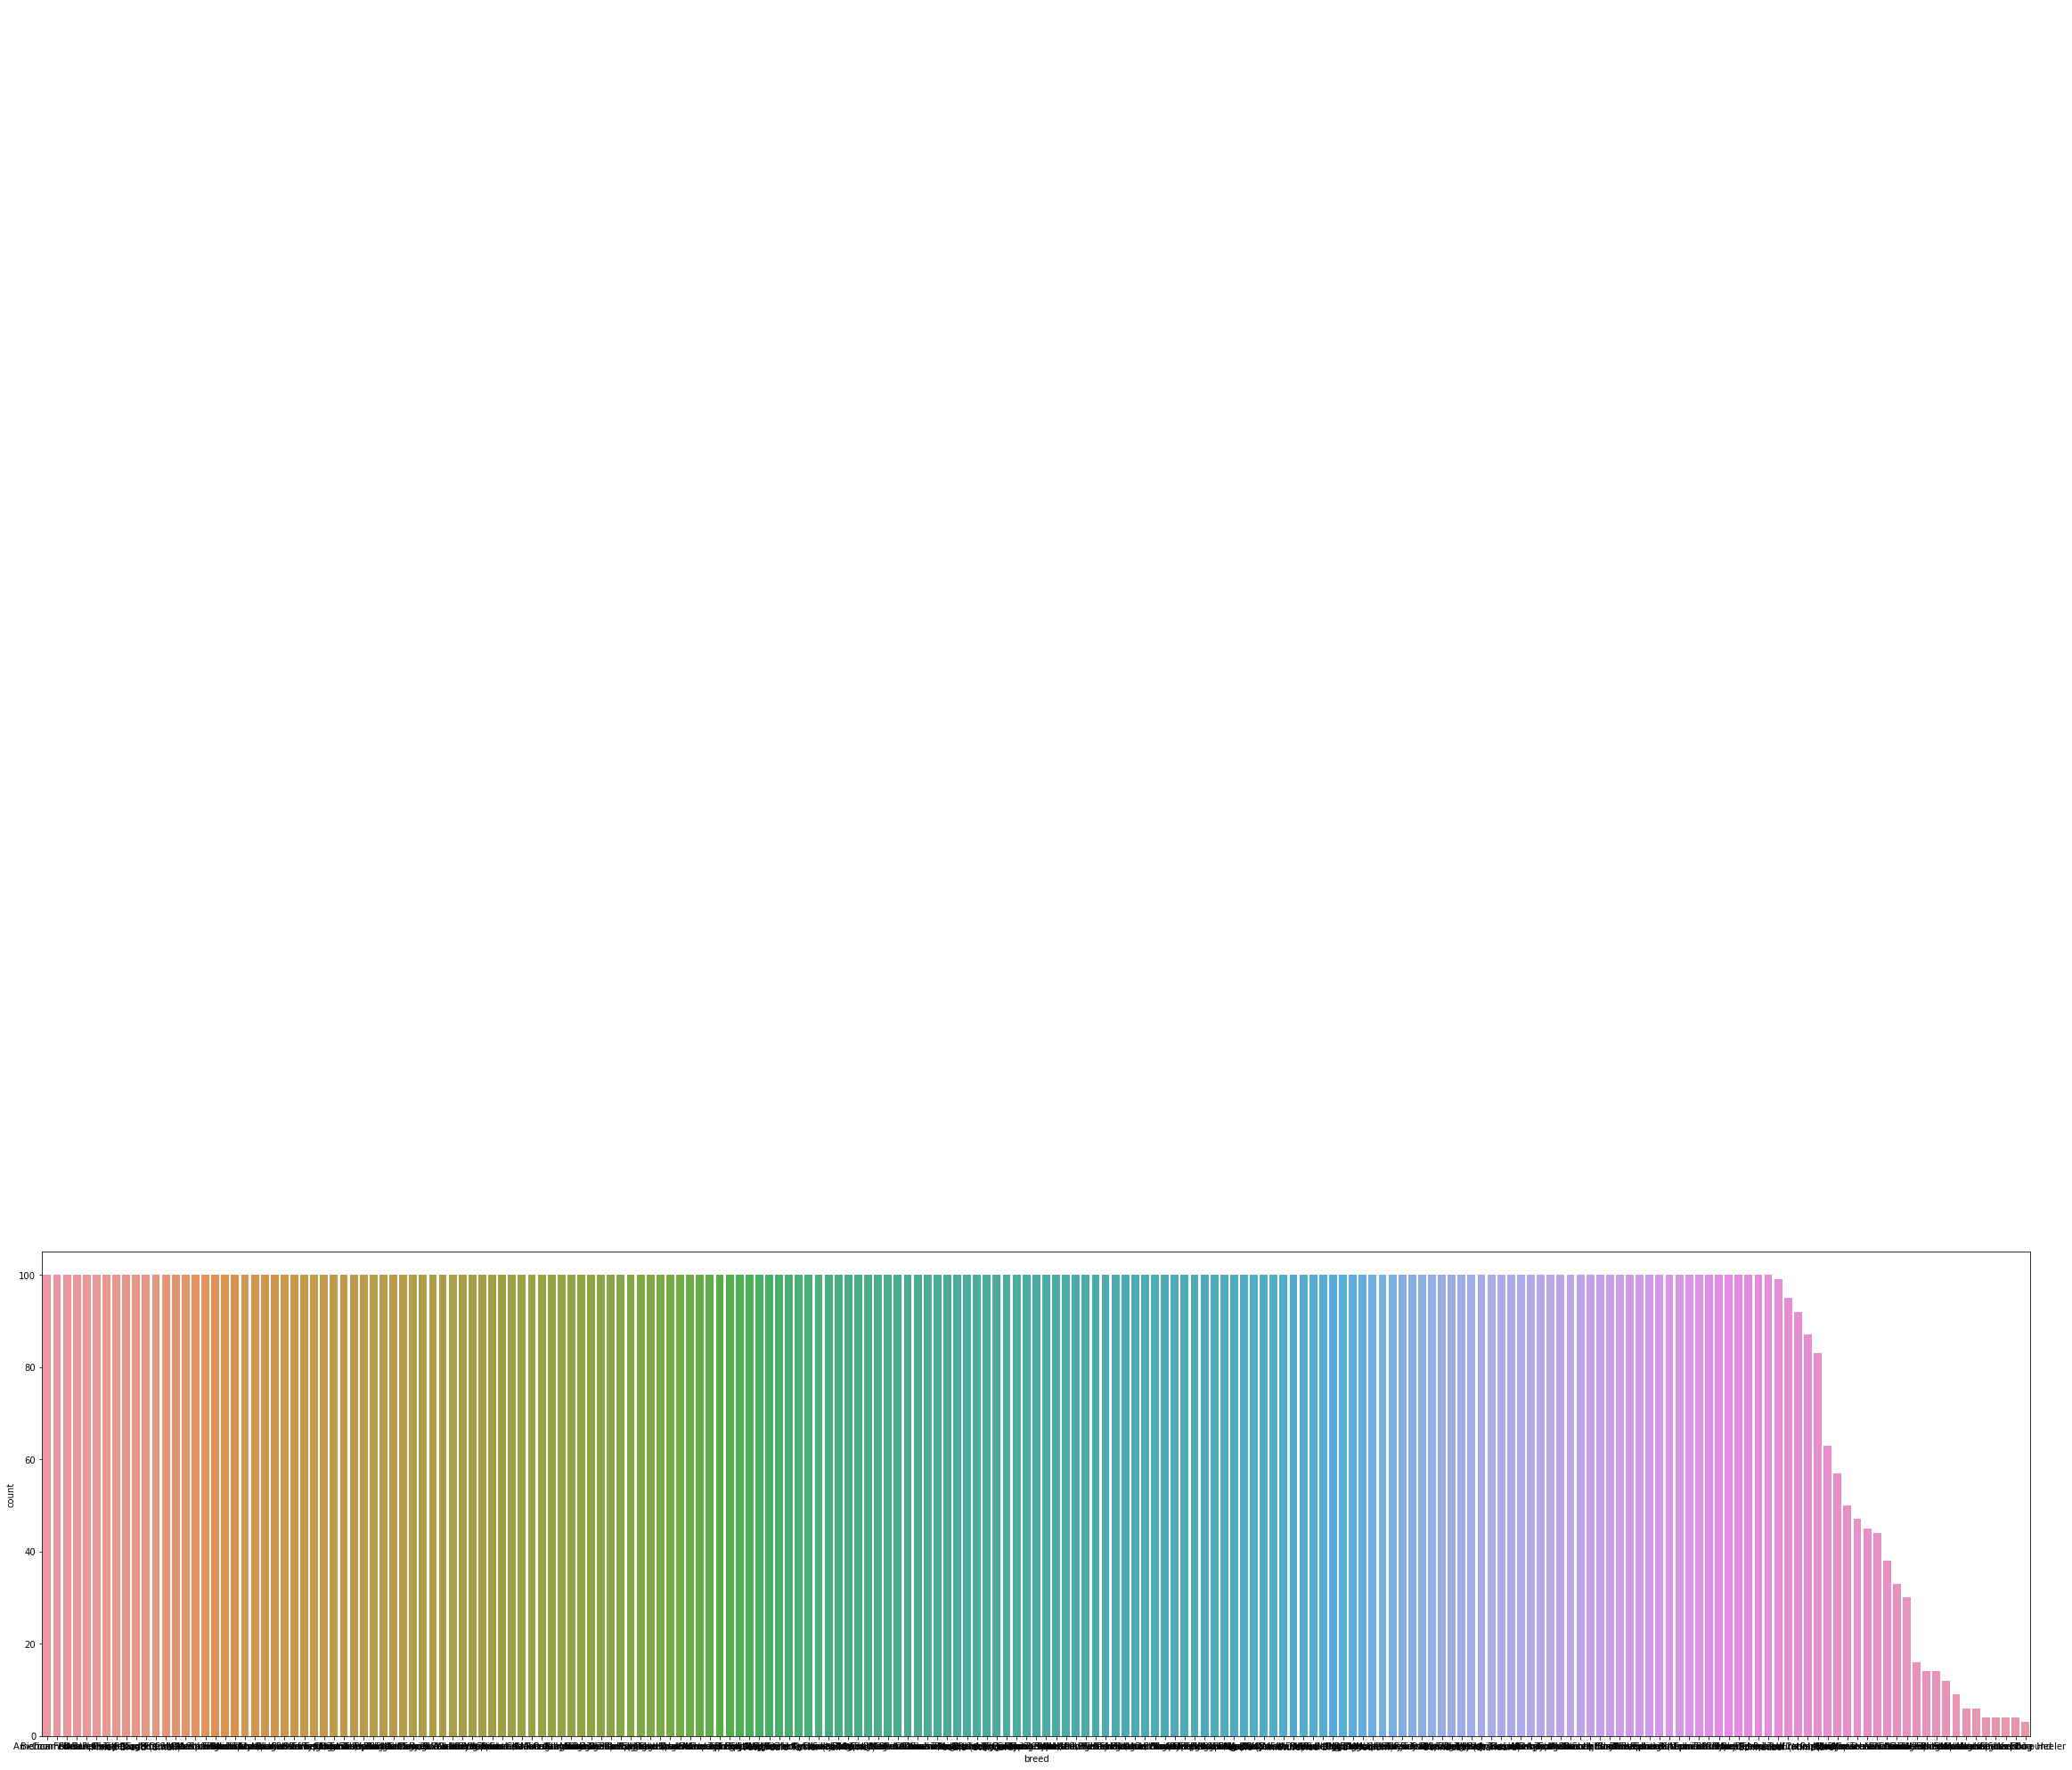

In [455]:
#Plotting the class distribution in a descending order

plt.figure(figsize = (40,10))
ax0 =sns.countplot(x=train_df_100['breed'],order=train_df_100['breed'].value_counts().index )
barh(ax0)
plt.show()   

## Detect non-Dog images

In [ ]:
import numpy as np

def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    else:
        not_a_dog_paths.append(image_path)
        print("You're not a dog! Stay outside!")

In [ ]:
not_a_dog_paths = []
for i in range(0, len(train_df_100)):
    doggy_door(train_df_100['img_dir'][i])

In [ ]:
len(not_a_dog_paths)

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
#label = data['breed']
#img = cv2.imread(img)
    
def process(filename):
    """
    View multiple images stored in files, stacking vertically

    Arguments:
        filename: str - path to filename containing image
    """
    image = mpimg.imread(filename)
    # <something gets done here>
    plt.figure()
    plt.imshow(image)
    #plt.xlabel(label, fontsize = (15))
    plt.tight_layout()
    plt.show

images = not_a_dog_paths[:40]
#label = test_dataframe['breed'][:20]
i= 0
for file in images:
    process(file)
    i +=1

In [ ]:
train_df_100.shape

In [ ]:
mask = train_df_100['img_dir'].isin(not_a_dog_paths)
train_df_100 = train_df_100[~mask]

In [ ]:
train_df_100.shape

### Detecting images with problems


In [ ]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(train_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

In [ ]:
images_bad = ['48000480000106.jpg', '490004900009.jpg', '5600056000092.jpg']
mask = train_df_100['pet_id'].isin(images_bad)
train_df_100 = train_df_100[~mask]

In [469]:
train_df_100.to_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_100_filtrado.csv', index=False)

In [466]:
cols = ['pet_id', 'breed']
train_df_100 = train_df_100[cols]

# Prepare data for Training 

In [255]:
train_df_100 = pd.read_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_100.csv')

In [250]:
cols =['pet_id','breed']
train_df_100 = train_df_100[cols]

In [467]:
train_df_100 = pd.merge(train_df_100,df_idMapping, on=['breed'])

In [468]:
train_df_100

pet_id               breed  breed_id
0           21425781.jpg  Labrador Retriever       123
1           21571324.jpg  Labrador Retriever       123
2           22589814.jpg  Labrador Retriever       123
3           25264499.jpg  Labrador Retriever       123
4           25016455.jpg  Labrador Retriever       123
...                  ...                 ...       ...
18354   920009200000.jpg          Otterhound       146
18355   920009200001.jpg          Otterhound       146
18356  9200092000010.jpg          Otterhound       146
18357  9200092000011.jpg          Otterhound       146
18358  9200092000012.jpg          Otterhound       146

[18359 rows x 3 columns]

In [253]:
train_df_100.isna()

pet_id  breed  breed_id
0       False  False     False
1       False  False     False
2       False  False     False
3       False  False     False
4       False  False     False
...       ...    ...       ...
19913   False  False     False
19914   False  False     False
19915   False  False     False
19916   False  False     False
19917   False  False     False

[19918 rows x 3 columns]

In [470]:
len(train_df_100['breed'].unique().tolist())

200

In [473]:
#list of img_dir accoring to train.csv file
img_dir =[]
for ix,img_id in enumerate(tqdm(train_df_100['pet_id'].values)):
    img_dir.append(os.path.join(train_dir,img_id))

train_df_100['img_dir'] = img_dir #creatinga new column
train_df_100= train_df_100.astype('str') #datagen requires the target value in str format
train_df_100.head()

pet_id               breed breed_id  \
0  21425781.jpg  Labrador Retriever      123   
1  21571324.jpg  Labrador Retriever      123   
2  22589814.jpg  Labrador Retriever      123   
3  25264499.jpg  Labrador Retriever      123   
4  25016455.jpg  Labrador Retriever      123   

                                             img_dir  
0  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
1  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
2  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
3  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
4  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...

In [477]:
train_df_100['img_dir'].iloc[0]

'D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/Train_images/21425781.jpg'

In [478]:
train_df_100.to_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_100_filtrado_con_imgdir.csv', index=False)

In [479]:
train_df_100.isna().sum()

pet_id      0
breed       0
breed_id    0
img_dir     0
dtype: int64

In [481]:
train_df_100['breed'].value_counts() < 50
train_df_100['breed'].value_counts()[mask]

Border Terrier          50
Manchester Terrier      47
Japanese Chin           45
Miniature Schnauzer     44
Labradoodle             38
Newfoundland            33
Airedale Terrier        30
Norfolk Terrier         16
English Shepherd        14
Giant Schnauzer         14
Neapolitan Mastiff      12
Leonberger               9
Munsterlander            6
King Charles Spaniel     6
Maremma Sheepdog         4
Kai Dog                  4
Keeshond                 4
Norwegian Elkhound       4
Lancashire Heeler        3
Name: breed, dtype: int64

In [186]:
mask = less60['pet_id'] == True
less60[mask]

pet_id  breed_id  img_dir
breed                                                     
Airedale Terrier                   True      True     True
Akbash                             True      True     True
Akita                              True      True     True
Alaskan Malamute                   True      True     True
American Bulldog                   True      True     True
...                                 ...       ...      ...
Whippet                            True      True     True
Wirehaired Fox Terrier             True      True     True
Wirehaired Pointing Griffon        True      True     True
Xoloitzcuintle/Mexican Hairless    True      True     True
Yorkie, Yorkshire Terrier          True      True     True

[205 rows x 3 columns]

In [552]:
train_df_100 = pd.read_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_100_filtrado_con_imgdir.csv')

In [553]:
train_df_100, val_df = train_test_split(train_df_100, test_size = 0.2, random_state = 0,
                                    stratify = train_df_100['breed_id'].values) # stratify as we have class imbalance
train_df_100.shape

(14687, 4)

In [554]:
val_df.shape

(3672, 4)

In [484]:
classes = train_df_100['breed'].unique().tolist()

In [485]:
len(classes)

200

In [486]:
train_dir

'D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/Train_images/'

In [487]:
len(list_to_delete)

15934

# Training Xception

In [488]:
# Hyperparameters
batch_size= 32 # Batch size > 32 will cause ResourceExhaustedError during model.fit()
epochs=10
learn_rate=.001
sgd=SGD(lr=learn_rate,momentum=.9,nesterov=False)
adam=Adam(lr=learn_rate, beta_1=0.9, beta_2=0.999, epsilon=None,  amsgrad=False)

input_shape = (320,320,3)
n_classes = len(classes)

C:\Users\franc\anaconda3\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:355: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



In [489]:
from keras.applications.xception import Xception, preprocess_input

xception = Xception(include_top= False, weights = 'imagenet',
                       input_shape = input_shape,
                       classes = n_classes)

In [555]:
# we are defining ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip = True,
                            vertical_flip = True,
                             zoom_range = 0.2,
#                              shear_range = 0.2,
                             rescale = 1.0/255,  # Ar RGB colors are presented in 0-155 range (1 pixel = 8 bits, since each bit can be 1 or 0, 8 bits info 2^8 = 256 , 0-255 , total 256)
#                              width_shift_range = 0.2,
#                              height_shift_range = 0.2,
                             fill_mode = 'nearest',
#                              preprocessing_function = preprocess_input
                             
                            ) 
datagen_val = ImageDataGenerator(#preprocessing_function = preprocess_input,
                                 rescale = 1.0/255) # as we don not need all transformation during validation

datagen_pred = ImageDataGenerator(#preprocessing_function = preprocess_input,
                                  rescale = 1.0/255 )

In [557]:
train_df_100['breed_id'] = train_df_100['breed_id'].astype(str)
val_df['breed_id'] = val_df['breed_id'].astype(str)

In [558]:
#we can use datagen from dataframe : https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1

train_generator= datagen.flow_from_dataframe(dataframe=train_df_100, directory=train_dir, x_col="pet_id", y_col="breed_id",
                                            class_mode="categorical", target_size=(320,320), batch_size=batch_size,
                                            color_mode = 'rgb')

Found 14687 validated image filenames belonging to 200 classes.


In [559]:
val_generator = datagen_val.flow_from_dataframe(dataframe=val_df, directory=train_dir, x_col="pet_id", y_col="breed_id",
                                            class_mode="categorical", target_size=(320,320), batch_size=batch_size,
                                               color_mode = 'rgb')

Found 3672 validated image filenames belonging to 199 classes.


In [493]:
#test datagen

pred_datagen = datagen_pred.flow_from_directory('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/Test_images/',
                                               batch_size = 1, # as we want all images in one batch during prediction
                                               target_size = (320,320),
                                               classes=['test_images'], # https://kylewbanks.com/blog/loading-unlabeled-images-with-imagedatagenerator-flowfromdirectory-keras
                                               color_mode ='rgb',
#                                                seed = 150
                                               ) 

Found 0 images belonging to 1 classes.


C:\Users\franc\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



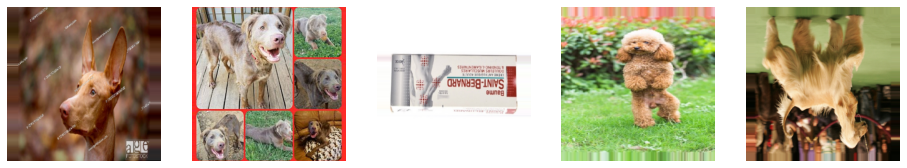

In [560]:
#plotting some images from image generator https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(16,16))


for i in range (5):
    
    image = next(train_generator)[0][0] # getting images
    
    image = np.squeeze(image) # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    
    ax[i].imshow(image)
    ax[i].axis('off')

In [495]:
# Callbacks

#Learning Rate Annealer
lrr= ReduceLROnPlateau(monitor='val_acc', factor=.01, patience=3, min_lr=1e-5,verbose = 1)

#Prepare call backs
EarlyStop = EarlyStopping(monitor='val_acc', patience=10, restore_best_weights=True)

#to save weights
sv = ModelCheckpoint(
        'model_weights.h5', monitor='val_acc', verbose=1, save_best_only=True,
        save_weights_only=True, mode='auto', save_freq='epoch') #to save best weights 

In [496]:
#creating a function to build the FC by taking the base model and return the final model

def build_model(base_modelx):
    
#     for layer in base_modelx.layers:
#         layer.trainable = False
    
    model = Sequential(base_modelx)
    model.add(GlobalAveragePooling2D())
    model.add(Dense(1024,activation ='relu', kernel_regularizer = tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(512,activation = 'relu',kernel_regularizer = tf.keras.regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Dense(n_classes,activation='softmax'))
    
    print(model.summary())
    
    model.compile(loss = 'categorical_crossentropy',optimizer = adam,metrics =['acc'])
    
    return model

In [497]:
model_xcp = build_model(xception)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
xception (Functional)        (None, 10, 10, 2048)      20861480  
_________________________________________________________________
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
batch_normalization_30 (Batc (None, 1024)              4096      
_________________________________________________________________
dropout_6 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 512)               524800    
_________________________________________________________________
batch_normalization_31 (Batc (None, 512)              

In [498]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=val_generator.n//val_generator.batch_size

In [499]:
model_xcp.fit(train_generator,
          epochs = epochs,
          steps_per_epoch=STEP_SIZE_TRAIN,
          validation_data=val_generator,
          validation_steps=STEP_SIZE_VALID,
          verbose =1,
          callbacks =[sv,EarlyStop]
         )

Epoch 1/10
148/458 [========>.....................] - ETA: 1:41:05 - loss: 18.1051 - acc: 0.0302

C:\Users\franc\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



428/458 [===========================>..] - ETA: 9:56 - loss: 11.3707 - acc: 0.0666 

UnknownError:  UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000002B088BF67C0>
Traceback (most recent call last):

  File "C:\Users\franc\anaconda3\lib\site-packages\tensorflow\python\ops\script_ops.py", line 249, in __call__
    ret = func(*args)

  File "C:\Users\franc\anaconda3\lib\site-packages\tensorflow\python\autograph\impl\api.py", line 645, in wrapper
    return func(*args, **kwargs)

  File "C:\Users\franc\anaconda3\lib\site-packages\tensorflow\python\data\ops\dataset_ops.py", line 892, in generator_py_func
    values = next(generator_state.get_iterator(iterator_id))

  File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 822, in wrapped_generator
    for data in generator_fn():

  File "C:\Users\franc\anaconda3\lib\site-packages\keras\engine\data_adapter.py", line 948, in generator_fn
    yield x[i]

  File "C:\Users\franc\anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 65, in __getitem__
    return self._get_batches_of_transformed_samples(index_array)

  File "C:\Users\franc\anaconda3\lib\site-packages\keras_preprocessing\image\iterator.py", line 227, in _get_batches_of_transformed_samples
    img = load_img(filepaths[j],

  File "C:\Users\franc\anaconda3\lib\site-packages\keras_preprocessing\image\utils.py", line 114, in load_img
    img = pil_image.open(io.BytesIO(f.read()))

  File "C:\Users\franc\anaconda3\lib\site-packages\PIL\Image.py", line 2967, in open
    raise UnidentifiedImageError(

PIL.UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x000002B088BF67C0>


	 [[{{node PyFunc}}]]
	 [[IteratorGetNext]] [Op:__inference_train_function_51313]

Function call stack:
train_function


# Mobilenet Training

#### Detecting images with problems

In [566]:
import PIL
from pathlib import Path
from PIL import UnidentifiedImageError

path = Path(train_dir).rglob("*.jpg")
for img_p in path:
    try:
        img = PIL.Image.open(img_p)
    except PIL.UnidentifiedImageError:
            print(img_p)

D:\Documentos\Master\temariomaster\TFM\Dog_Breed_Recognition_Competition_Datasets\Train_images\48000480000106.jpg
D:\Documentos\Master\temariomaster\TFM\Dog_Breed_Recognition_Competition_Datasets\Train_images\490004900009.jpg
D:\Documentos\Master\temariomaster\TFM\Dog_Breed_Recognition_Competition_Datasets\Train_images\5600056000092.jpg


In [592]:
train_df_100 = pd.read_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_100_filtrado_con_imgdir.csv')

In [593]:
len(train_df_100)

18359

In [594]:
images_bad = ['48000480000106.jpg', '490004900009.jpg', '5600056000092.jpg']
mask = train_df_100['pet_id'].isin(images_bad)
train_df_100 = train_df_100[~mask]

In [595]:
len(train_df_100)

18358

# Training with 200 classes

In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [623]:
train_df_100, val_df = train_test_split(train_df_100, test_size = 0.25, random_state = 32,
                                    stratify = train_df_100['breed_id'].values) # stratify as we have class imbalance
train_df_100.shape

(10326, 4)

In [597]:
# we are defining ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip = True,
                            vertical_flip = True,
                             zoom_range = 0.2,
#                              shear_range = 0.2,
                             rescale = 1.0/255,  # Ar RGB colors are presented in 0-155 range (1 pixel = 8 bits, since each bit can be 1 or 0, 8 bits info 2^8 = 256 , 0-255 , total 256)
#                              width_shift_range = 0.2,
#                              height_shift_range = 0.2,
                             fill_mode = 'nearest',
#                              preprocessing_function = preprocess_input
                             
                            ) 
datagen_val = ImageDataGenerator(#preprocessing_function = preprocess_input,
                                 rescale = 1.0/255) # as we don not need all transformation during validation

datagen_pred = ImageDataGenerator(#preprocessing_function = preprocess_input,
                                  rescale = 1.0/255 )

In [598]:
train_df_100['breed_id'] = train_df_100['breed_id'].astype(str)
val_df['breed_id'] = val_df['breed_id'].astype(str)

In [599]:
#we can use datagen from dataframe : https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1

train_generator= datagen.flow_from_dataframe(dataframe=train_df_100, directory=train_dir, x_col="pet_id", y_col="breed_id",
                                            class_mode="categorical", target_size=(320,320), batch_size=batch_size,
                                            color_mode = 'rgb')

Found 13768 validated image filenames belonging to 200 classes.


In [600]:
val_generator = datagen_val.flow_from_dataframe(dataframe=val_df, directory=train_dir, x_col="pet_id", y_col="breed_id",
                                            class_mode="categorical", target_size=(320,320), batch_size=batch_size,
                                               color_mode = 'rgb')

Found 4590 validated image filenames belonging to 200 classes.


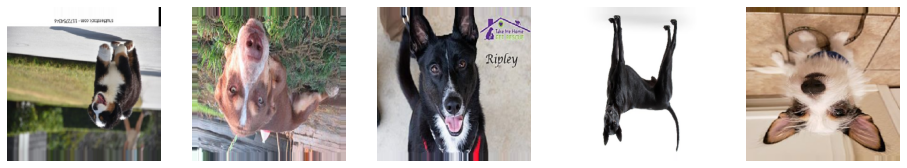

In [601]:
#plotting some images from image generator https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/

fig,ax = plt.subplots(nrows=1,ncols=5,figsize=(16,16))


for i in range (5):
    
    image = next(train_generator)[0][0] # getting images
    
    image = np.squeeze(image) # changing size from (1, 200, 200, 3) to (200, 200, 3) for plotting the image
    
    ax[i].imshow(image)
    ax[i].axis('off')

In [619]:
callbacks = [
    ModelCheckpoint("model.h5", verbose=1, save_best_only=True),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)
]
train_steps = (train_generator.n)//train_generator.batch_size+1
valid_steps = (val_generator.n)//val_generator.batch_size+1

In [620]:
model.fit(train_generator,
          steps_per_epoch=train_steps,
          validation_steps=valid_steps,
          validation_data=val_generator,
          epochs=epochs,
          callbacks=callbacks
         )

Epoch 1/16
431/431 [==============================] - 850s 2s/step - loss: 4.8214 - acc: 0.0795 - val_loss: 4.0215 - val_acc: 0.2462

Epoch 00001: val_loss improved from inf to 4.02153, saving model to model.h5


C:\Users\franc\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/16
431/431 [==============================] - 732s 2s/step - loss: 3.7392 - acc: 0.2278 - val_loss: 3.1734 - val_acc: 0.3320

Epoch 00002: val_loss improved from 4.02153 to 3.17343, saving model to model.h5
Epoch 3/16
431/431 [==============================] - 882s 2s/step - loss: 3.2227 - acc: 0.2926 - val_loss: 2.8774 - val_acc: 0.3564

Epoch 00003: val_loss improved from 3.17343 to 2.87742, saving model to model.h5
Epoch 4/16
431/431 [==============================] - 791s 2s/step - loss: 2.9766 - acc: 0.3304 - val_loss: 2.7267 - val_acc: 0.3800

Epoch 00004: val_loss improved from 2.87742 to 2.72670, saving model to model.h5
Epoch 5/16
431/431 [==============================] - 810s 2s/step - loss: 2.8163 - acc: 0.3528 - val_loss: 2.6211 - val_acc: 0.3991

Epoch 00005: val_loss improved from 2.72670 to 2.62113, saving model to model.h5
Epoch 6/16
431/431 [==============================] - 840s 2s/step - loss: 2.7046 - acc: 0.3732 - val_loss: 2.5958 - val_acc: 0.3963

Epoch 

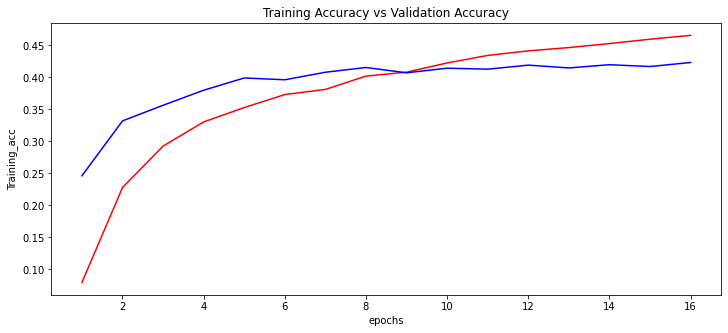

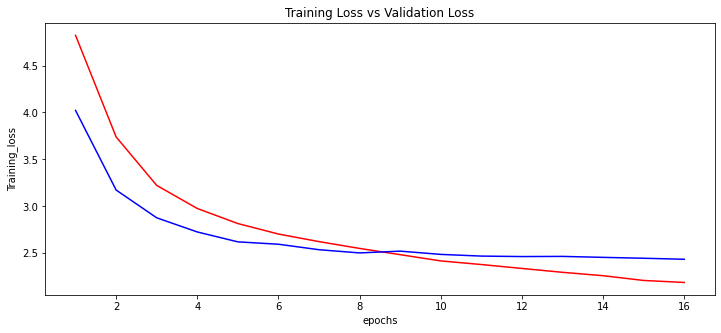

In [621]:
#Ploting acc and loss

def plot_result(modelx):
    results = pd.DataFrame({'epochs':list(range(1,epochs+1)),'Training_acc':modelx.history.history['acc'],'Validation_acc':modelx.history.history['val_acc'],
                          'Training_loss':modelx.history.history['loss'],'Validation_loss':modelx.history.history['val_loss']})

    plt.figure(figsize=(12,5))
    sns.lineplot(x = 'epochs', y ='Training_acc', data = results, color='r' )
    sns.lineplot(x = 'epochs', y ='Validation_acc', data = results, color='blue' )
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.show()

    plt.figure(figsize=(12,5))
    sns.lineplot(x = 'epochs', y ='Training_loss', data = results, color='r' )
    sns.lineplot(x = 'epochs', y ='Validation_loss', data = results, color='blue' )
    plt.title('Training Loss vs Validation Loss')
    plt.show()

plot_result(model)

In [622]:
model.save("model_mobilenet_V1.h5")

C:\Users\franc\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



# Training mobilenet and xception with less than 200 classes

In [657]:
train_df_100 = pd.read_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_100_filtrado_con_imgdir.csv')

In [658]:
train_df_100

pet_id               breed  breed_id  \
0           21425781.jpg  Labrador Retriever       123   
1           21571324.jpg  Labrador Retriever       123   
2           22589814.jpg  Labrador Retriever       123   
3           25264499.jpg  Labrador Retriever       123   
4           25016455.jpg  Labrador Retriever       123   
...                  ...                 ...       ...   
18354   920009200000.jpg          Otterhound       146   
18355   920009200001.jpg          Otterhound       146   
18356  9200092000010.jpg          Otterhound       146   
18357  9200092000011.jpg          Otterhound       146   
18358  9200092000012.jpg          Otterhound       146   

                                                 img_dir  
0      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
1      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
2      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
3      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
4      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
...                                                  ...  
18354  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18355  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18356  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18357  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18358  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  

[18359 rows x 4 columns]

In [659]:
images_bad = ['48000480000106.jpg', '490004900009.jpg', '5600056000092.jpg']
mask = train_df_100['pet_id'].isin(images_bad)
train_df_100 = train_df_100[~mask]

In [660]:
classes = train_df_100['breed'].unique().tolist()

In [631]:
classes.sort()

In [632]:
classes

['Affenpinscher',
 'Afghan Hound',
 'Airedale Terrier',
 'Akbash',
 'Akita',
 'Alaskan Malamute',
 'American Bulldog',
 'American Eskimo Dog',
 'American Hairless Terrier',
 'American Pit Bull Terrier',
 'American Staffordshire Terrier',
 'Anatolian Shepherd',
 'Australian Cattle Dog',
 'Australian Kelpie',
 'Australian Shepherd',
 'Australian Terrier',
 'Basenji',
 'Basset Hound',
 'Beagle',
 'Bearded Collie',
 'Beauceron',
 'Belgian Malinois',
 'Belgian Shepherd',
 'Bernese Mountain Dog',
 'Bichon Frise',
 'Black Mouth Cur',
 'Black and Tan Coonhound',
 'Bloodhound',
 'Blue Heeler',
 'Blue Lacy/Texas Lacy',
 'Bluetick Coonhound',
 'Border Collie',
 'Border Terrier',
 'Borzoi',
 'Boston Terrier',
 'Bouvier des Flandres',
 'Boxer',
 'Boykin Spaniel',
 'Brittany',
 'Brussels Griffon',
 'Bull Terrier',
 'Bulldog',
 'Bullmastiff',
 'Cairn Terrier',
 'Canaan Dog',
 'Cane Corso',
 'Cardigan Welsh Corgi',
 'Carolina Dog',
 'Catahoula Leopard Dog',
 'Cattle Dog',
 'Cavalier King Charles Spani

In [661]:
num_clases = len(classes)
print(num_clases)

200


In [7]:
to_eliminate = ['Mixed Breed (Large)', 'Mixed Breed (Medium)', 'Mixed Breed (Small)', 'Poodle (Miniature)', 'Schnauzer (Miniature)',
                'Terrier (Unknown Type, Small)', 'Bulldog', 'King Charles Spaniel', 'Lancashire Heeler', 'Norwegian Elkhound',
                'Kai Dog', 'Keeshond', 'Maremma Sheepdog', 'Munsterlander', 'Leonberger']

In [663]:

mask = train_df_100['breed'].isin(to_eliminate)
train_df_reduced = train_df_100[~mask]

In [664]:
classes_reduced = train_df_reduced['breed'].unique().tolist()

In [665]:
len(classes_reduced)

185

In [666]:
# --- img size
size = 224
# --- num of breeds
num_clases = classes_reduced
# --- learning rate
lr = 1e-4
# --- batch size
batch = 20
# --- number of epochs
epochs = 16

In [641]:
def build_model_mobilenet(size, num_clases):
    inputs = Input((size, size, 3))
    backbone = MobileNetV2(input_tensor=inputs, include_top=False, weights='imagenet')
    backbone.trainable = False
    x = backbone.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    x = Dense(1024,activation='relu')(x)
    x = Dense(num_clases, activation="softmax")(x)
    
    model = tf.keras.Model(inputs, x)
    return model

In [642]:
model_V2 = build_model_mobilenet(size, 185)

In [643]:
model_V2.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=["acc"])
model_V2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_11[0][0]                   
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
____________________________________________________________________________________________

In [667]:
train_df_reduced, val_df = train_test_split(train_df_reduced, test_size = 0.25, random_state = 32,
                                    stratify = train_df_reduced['breed_id'].values) # stratify as we have class imbalance
train_df_reduced.shape

(13217, 4)

In [668]:
# we are defining ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip = True,
                            vertical_flip = True,
                             zoom_range = 0.2,
#                              shear_range = 0.2,
                             rescale = 1.0/255,  # Ar RGB colors are presented in 0-155 range (1 pixel = 8 bits, since each bit can be 1 or 0, 8 bits info 2^8 = 256 , 0-255 , total 256)
#                              width_shift_range = 0.2,
#                              height_shift_range = 0.2,
                             fill_mode = 'nearest',
#                              preprocessing_function = preprocess_input
                             
                            ) 
datagen_val = ImageDataGenerator(#preprocessing_function = preprocess_input,
                                 rescale = 1.0/255) # as we don not need all transformation during validation

datagen_pred = ImageDataGenerator(#preprocessing_function = preprocess_input,
                                  rescale = 1.0/255 )

In [669]:
train_df_reduced['breed_id'] = train_df_reduced['breed_id'].astype(str)
val_df['breed_id'] = val_df['breed_id'].astype(str)

In [670]:
#we can use datagen from dataframe : https://vijayabhaskar96.medium.com/tutorial-on-keras-imagedatagenerator-with-flow-from-dataframe-8bd5776e45c1

train_generator= datagen.flow_from_dataframe(dataframe=train_df_reduced, directory=train_dir, x_col="pet_id", y_col="breed_id",
                                            class_mode="categorical", target_size=(320,320), batch_size=batch_size,
                                            color_mode = 'rgb')

Found 13217 validated image filenames belonging to 185 classes.


In [671]:
val_generator = datagen_val.flow_from_dataframe(dataframe=val_df, directory=train_dir, x_col="pet_id", y_col="breed_id",
                                            class_mode="categorical", target_size=(320,320), batch_size=batch_size,
                                               color_mode = 'rgb')

Found 4406 validated image filenames belonging to 185 classes.


In [672]:
callbacks = [
    ModelCheckpoint("modelV2.h5", verbose=1, save_best_only=True),
    ReduceLROnPlateau(factor=0.1, patience=5, min_lr=1e-6)
]
train_steps = (train_generator.n)//train_generator.batch_size+1
valid_steps = (val_generator.n)//val_generator.batch_size+1

In [673]:
epochs = 40

In [651]:
model_V2.fit(train_generator,
          steps_per_epoch=train_steps,
          validation_steps=valid_steps,
          validation_data=val_generator,
          epochs=epochs,
          callbacks=callbacks
         )

Epoch 1/16
 73/414 [====>.........................] - ETA: 7:35 - loss: 5.2141 - acc: 0.0143

C:\Users\franc\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning:

Palette images with Transparency expressed in bytes should be converted to RGBA images



414/414 [==============================] - 847s 2s/step - loss: 4.7503 - acc: 0.0878 - val_loss: 3.9403 - val_acc: 0.2653

Epoch 00001: val_loss improved from inf to 3.94028, saving model to modelV2.h5


C:\Users\franc\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/16
414/414 [==============================] - 996s 2s/step - loss: 3.6669 - acc: 0.2359 - val_loss: 3.0791 - val_acc: 0.3448

Epoch 00002: val_loss improved from 3.94028 to 3.07909, saving model to modelV2.h5
Epoch 3/16
414/414 [==============================] - 926s 2s/step - loss: 3.1311 - acc: 0.3016 - val_loss: 2.7838 - val_acc: 0.3727

Epoch 00003: val_loss improved from 3.07909 to 2.78380, saving model to modelV2.h5
Epoch 4/16
414/414 [==============================] - 915s 2s/step - loss: 2.9016 - acc: 0.3359 - val_loss: 2.6176 - val_acc: 0.3974

Epoch 00004: val_loss improved from 2.78380 to 2.61756, saving model to modelV2.h5
Epoch 5/16
414/414 [==============================] - 1029s 2s/step - loss: 2.7360 - acc: 0.3679 - val_loss: 2.5278 - val_acc: 0.4094

Epoch 00005: val_loss improved from 2.61756 to 2.52784, saving model to modelV2.h5
Epoch 6/16
414/414 [==============================] - 1046s 3s/step - loss: 2.6332 - acc: 0.3833 - val_loss: 2.4866 - val_acc: 0.41

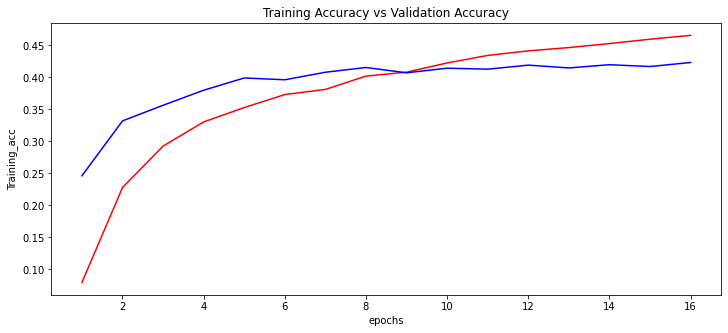

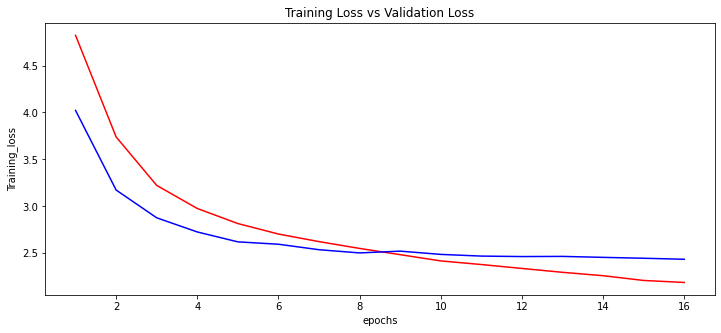

In [655]:
#Ploting acc and loss

def plot_result(modelx):
    results = pd.DataFrame({'epochs':list(range(1,epochs+1)),'Training_acc':modelx.history.history['acc'],'Validation_acc':modelx.history.history['val_acc'],
                          'Training_loss':modelx.history.history['loss'],'Validation_loss':modelx.history.history['val_loss']})

    plt.figure(figsize=(12,5))
    sns.lineplot(x = 'epochs', y ='Training_acc', data = results, color='r' )
    sns.lineplot(x = 'epochs', y ='Validation_acc', data = results, color='blue' )
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.show()

    plt.figure(figsize=(12,5))
    sns.lineplot(x = 'epochs', y ='Training_loss', data = results, color='r' )
    sns.lineplot(x = 'epochs', y ='Validation_loss', data = results, color='blue' )
    plt.title('Training Loss vs Validation Loss')
    plt.show()

plot_result(model)

In [656]:
model_V2.save("model_mobilenet_V1.h5")

C:\Users\franc\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



### xception

In [692]:
# --- img size
size = 331
# --- num of breeds
num_clases = 185
lr = 1e-4
# --- batch size
batch = 20
# --- number of epochs
epochs = 30

In [685]:
#creating a function to build the FC by taking the base model and return the final model

def build_model(size, num_clases):
    
    #base_model = Xception(weights='imagenet', include_top=False)
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(size, size, 3))
    base_model.trainable = False
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    x = Dense(1024,activation='relu')(x)
    x = Dense(num_clases, activation="softmax")(x)
    model = Model(inputs = base_model.input, outputs=x)
    return model

In [686]:
model_xcp_V2 = build_model(size, num_clases)

In [695]:
model_xcp_V2.compile(loss='categorical_crossentropy', optimizer=Adam(lr), metrics=["acc"])
model_xcp_V2.summary()

Model: "model_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 165, 165, 32) 864         input_12[0][0]                   
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 165, 165, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 165, 165, 32) 0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [699]:
epochs = 24

In [696]:
model_xcp_V2.fit(train_generator,
          steps_per_epoch=train_steps,
          validation_steps=valid_steps,
          validation_data=val_generator,
          epochs=epochs,
          callbacks=callbacks
         )

Epoch 1/30
414/414 [==============================] - 2170s 5s/step - loss: 4.4989 - acc: 0.1546 - val_loss: 3.2588 - val_acc: 0.3684

Epoch 00001: val_loss improved from inf to 3.25884, saving model to modelV2.h5


C:\Users\franc\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning:

Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.



Epoch 2/30
414/414 [==============================] - 1770s 4s/step - loss: 3.2288 - acc: 0.3026 - val_loss: 2.5102 - val_acc: 0.4260

Epoch 00002: val_loss improved from 3.25884 to 2.51022, saving model to modelV2.h5
Epoch 3/30
414/414 [==============================] - 1779s 4s/step - loss: 2.8173 - acc: 0.3551 - val_loss: 2.3044 - val_acc: 0.4507

Epoch 00003: val_loss improved from 2.51022 to 2.30440, saving model to modelV2.h5
Epoch 4/30
414/414 [==============================] - 1772s 4s/step - loss: 2.6292 - acc: 0.3842 - val_loss: 2.2095 - val_acc: 0.4591

Epoch 00004: val_loss improved from 2.30440 to 2.20946, saving model to modelV2.h5
Epoch 5/30
414/414 [==============================] - 1773s 4s/step - loss: 2.5453 - acc: 0.3942 - val_loss: 2.1655 - val_acc: 0.4675

Epoch 00005: val_loss improved from 2.20946 to 2.16555, saving model to modelV2.h5
Epoch 6/30
414/414 [==============================] - 1812s 4s/step - loss: 2.4581 - acc: 0.4092 - val_loss: 2.1247 - val_acc: 0

KeyboardInterrupt: 

### Concatenated Model

In [35]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os #interacting with the operating system
import gc #optional garbage collector
import cv2
from glob import glob
import tensorflow as tf #end-to-end open source platform for machine learning
#keras and tensor flow modules used for the DL model and preprocessing
from keras import Sequential 
from keras.layers import *
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.utils import to_categorical
from keras.models import Model
from keras.preprocessing.image import load_img
from keras.callbacks import ReduceLROnPlateau,EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator

# matplotlib to plot images and visualizations 
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.autonotebook import tqdm

#train test split module from sklearn
from sklearn.model_selection import train_test_split

In [46]:
train_df_100 = pd.read_csv('D:/Documentos/Master/temariomaster/TFM/Dog_Breed_Recognition_Competition_Datasets/train_df_100_filtrado_con_imgdir.csv')

In [47]:
to_eliminate = ['Mixed Breed (Large)', 'Mixed Breed (Medium)', 'Mixed Breed (Small)', 'Poodle (Miniature)', 'Schnauzer (Miniature)',
                'Terrier (Unknown Type, Small)', 'Bulldog', 'King Charles Spaniel', 'Lancashire Heeler', 'Norwegian Elkhound',
                'Kai Dog', 'Keeshond', 'Maremma Sheepdog', 'Munsterlander', 'Leonberger']
mask = train_df_100['breed'].isin(to_eliminate)
train_df_reduced = train_df_100[~mask]

In [48]:
dog_breeds = sorted(train_df_reduced.breed_id.unique().tolist())
n_classes = len(dog_breeds)
print(n_classes)

185


In [17]:
train_df_reduced

pet_id               breed  breed_id  \
0           21425781.jpg  Labrador Retriever       123   
1           21571324.jpg  Labrador Retriever       123   
2           22589814.jpg  Labrador Retriever       123   
3           25264499.jpg  Labrador Retriever       123   
4           25016455.jpg  Labrador Retriever       123   
...                  ...                 ...       ...   
18354   920009200000.jpg          Otterhound       146   
18355   920009200001.jpg          Otterhound       146   
18356  9200092000010.jpg          Otterhound       146   
18357  9200092000011.jpg          Otterhound       146   
18358  9200092000012.jpg          Otterhound       146   

                                                 img_dir  
0      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
1      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
2      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
3      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
4      D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
...                                                  ...  
18354  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18355  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18356  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18357  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  
18358  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...  

[17624 rows x 4 columns]

In [49]:
columns = ['breed', 'img_dir']
train_df_reduced = train_df_reduced[columns]

In [50]:
train_df_reduced

breed                                            img_dir
0      Labrador Retriever  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
1      Labrador Retriever  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
2      Labrador Retriever  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
3      Labrador Retriever  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
4      Labrador Retriever  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
...                   ...                                                ...
18354          Otterhound  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18355          Otterhound  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18356          Otterhound  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18357          Otterhound  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18358          Otterhound  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...

[17624 rows x 2 columns]

In [51]:
len(train_df_reduced['breed'].unique().tolist())

185

In [52]:
dog_breeds = sorted(train_df_reduced.breed.unique().tolist())
n_classes = len(dog_breeds)
print(n_classes)

185


In [53]:
class_to_num = dict(zip(dog_breeds, range(n_classes)))
class_to_num

{'Affenpinscher': 0,
 'Afghan Hound': 1,
 'Airedale Terrier': 2,
 'Akbash': 3,
 'Akita': 4,
 'Alaskan Malamute': 5,
 'American Bulldog': 6,
 'American Eskimo Dog': 7,
 'American Hairless Terrier': 8,
 'American Pit Bull Terrier': 9,
 'American Staffordshire Terrier': 10,
 'Anatolian Shepherd': 11,
 'Australian Cattle Dog': 12,
 'Australian Kelpie': 13,
 'Australian Shepherd': 14,
 'Australian Terrier': 15,
 'Basenji': 16,
 'Basset Hound': 17,
 'Beagle': 18,
 'Bearded Collie': 19,
 'Beauceron': 20,
 'Belgian Malinois': 21,
 'Belgian Shepherd': 22,
 'Bernese Mountain Dog': 23,
 'Bichon Frise': 24,
 'Black Mouth Cur': 25,
 'Black and Tan Coonhound': 26,
 'Bloodhound': 27,
 'Blue Heeler': 28,
 'Blue Lacy/Texas Lacy': 29,
 'Bluetick Coonhound': 30,
 'Border Collie': 31,
 'Border Terrier': 32,
 'Borzoi': 33,
 'Boston Terrier': 34,
 'Bouvier des Flandres': 35,
 'Boxer': 36,
 'Boykin Spaniel': 37,
 'Brittany': 38,
 'Brussels Griffon': 39,
 'Bull Terrier': 40,
 'Bullmastiff': 41,
 'Cairn Terrie

In [54]:
train_df_reduced['breed'] = train_df_reduced.breed.map(class_to_num)

In [56]:
y = to_categorical(train_df_reduced.breed)

In [57]:
len(y)

17624

In [58]:
train_df_reduced


breed                                            img_dir
0        109  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
1        109  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
2        109  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
3        109  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
4        109  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
...      ...                                                ...
18354    123  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18355    123  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18356    123  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18357    123  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...
18358    123  D:/Documentos/Master/temariomaster/TFM/Dog_Bre...

[17624 rows x 2 columns]

## Feature extracction

In [61]:
import tensorflow.keras as keras
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input as restnet_preprocess
from keras.applications.inception_v3 import InceptionV3, preprocess_input as inception_preprocess
from keras.applications.xception import Xception, preprocess_input as xception_preprocess
from keras.applications.nasnet import NASNetLarge, preprocess_input as nasnet_preprocess
from keras.layers.merge import concatenate

input_shape = (331,331,3)
input_layer = Input(shape=input_shape) 

# First extractor inception_resnet
preprocesor_resnet = Lambda(restnet_preprocess)(input_layer)
inception_resnet = InceptionResNetV2(weights='imagenet',
                                     include_top = False,
                                     input_shape=input_shape,
                                     pooling='avg')(preprocesor_resnet)

# Second extractor inceptionV3
preprocesor_inception = Lambda(inception_preprocess)(input_layer)
inception_v3 = InceptionV3(weights='imagenet',
                                  include_top = False,
                                  input_shape=input_shape,
                                  pooling='avg')(preprocesor_inception)

# Third extractor Xception
preprocesor_xception = Lambda(xception_preprocess)(input_layer)
xception = Xception(weights='imagenet',
                              include_top = False,
                              input_shape=input_shape,
                              pooling='avg')(preprocesor_xception)

# Fouth extractor Xception
preprocesor_nasnet = Lambda(nasnet_preprocess)(input_layer)
nasnet = NASNetLarge(weights='imagenet',
                               include_top = False,
                               input_shape=input_shape,
                               pooling='avg')(preprocesor_nasnet)

merge = concatenate([inception_v3, xception, nasnet, inception_resnet])
model1 = keras.Model(inputs = input_layer, outputs=merge)

In [62]:
model1.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 331, 331, 3) 0                                            
__________________________________________________________________________________________________
lambda_5 (Lambda)               (None, 331, 331, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
lambda_6 (Lambda)               (None, 331, 331, 3)  0           input_8[0][0]                    
__________________________________________________________________________________________________
lambda_7 (Lambda)               (None, 331, 331, 3)  0           input_8[0][0]                    
____________________________________________________________________________________________

In [63]:
model1.output.shape

TensorShape([None, 9664])

In [64]:
model1.save('feature_extractor2.h5')

C:\Users\franc\anaconda3\lib\site-packages\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [65]:
from keras.preprocessing.image import ImageDataGenerator
from tqdm import tqdm

def feature_extractor(df):
    img_size = (331,331,3)
    data_size = len(train_df_reduced)
    batch_size = 20
    X = np.zeros([data_size,9664], dtype=np.uint8)
    datagen = ImageDataGenerator()
    generator = datagen.flow_from_dataframe(train_df_reduced,x_col='img_dir', class_mode=None, batch_size=20, shuffle=False,
                                           target_size=(img_size[:2]), color_mode = 'rgb')
    i = 0
    try:
        for input_batch in tqdm(generator):
            input_batch = model1.predict(input_batch)
            X[i * batch_size : (i + 1) * batch_size] = input_batch
            i += 1
            if i * batch_size >= data_size:
                break
    except:
        pass
    return X

In [66]:
X = feature_extractor(train_df_reduced)

  0%|                                                                                          | 0/882 [00:00<?, ?it/s]

Found 17624 validated image filenames.


 53%|████████████████████████████████████████▏                                   | 467/882 [2:38:22<2:30:07, 21.70s/it]C:\Users\franc\anaconda3\lib\site-packages\PIL\Image.py:962: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(
 90%|█████████████████████████████████████████████████████████████████████▉        | 791/882 [4:21:35<30:05, 19.84s/it]


In [67]:
X.shape

(17624, 9664)

In [68]:
from keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau

EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
checkpoint = ModelCheckpoint(path, monitor='val_loss', mode='min', save_best_only=True)
lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.5, patience=3, min_lr=0.0001)
my_callback=[EarlyStop_callback,checkpoint]

In [78]:
dnn = keras.models.Sequential([
    InputLayer(X.shape[1:]),
    Dropout(0.7),
    Dense(n_classes, activation='softmax')
])
dnn.compile(optimizer='adam',
           loss='categorical_crossentropy',
           metrics=['accuracy'])

In [79]:
h = dnn.fit(X,y,
           batch_size=128,
           epochs=60,
           validation_split=0.1,
           callbacks=my_callback)

Epoch 1/60
124/124 [==============================] - 4s 26ms/step - loss: 4.4748 - accuracy: 0.2587 - val_loss: 5.3227 - val_accuracy: 0.0000e+00
Epoch 2/60
124/124 [==============================] - 3s 25ms/step - loss: 2.9118 - accuracy: 0.5030 - val_loss: 5.3909 - val_accuracy: 0.0000e+00
Epoch 3/60
124/124 [==============================] - 3s 27ms/step - loss: 2.2494 - accuracy: 0.5663 - val_loss: 5.4401 - val_accuracy: 0.0000e+00
Epoch 4/60
124/124 [==============================] - 4s 30ms/step - loss: 1.9029 - accuracy: 0.6066 - val_loss: 5.4800 - val_accuracy: 0.0000e+00
Epoch 5/60
124/124 [==============================] - 4s 30ms/step - loss: 1.6837 - accuracy: 0.6389 - val_loss: 5.5142 - val_accuracy: 0.0000e+00
Epoch 6/60
124/124 [==============================] - 4s 30ms/step - loss: 1.5203 - accuracy: 0.6641 - val_loss: 5.5449 - val_accuracy: 0.0000e+00
Epoch 7/60
124/124 [==============================] - 4s 29ms/step - loss: 1.3946 - accuracy: 0.6869 - val_loss: 5.572

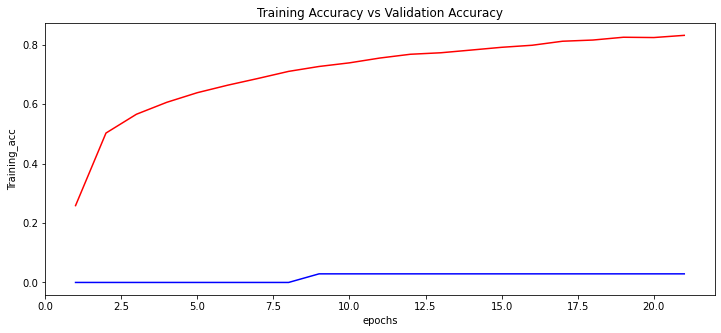

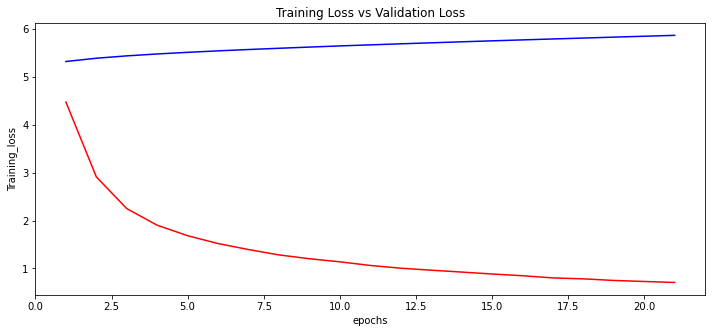

In [80]:
#Ploting acc and loss

def plot_result(modelx):
    results = pd.DataFrame({'epochs':list(range(1,21+1)),'Training_acc':modelx.history.history['accuracy'],'Validation_acc':modelx.history.history['val_accuracy'],
                          'Training_loss':modelx.history.history['loss'],'Validation_loss':modelx.history.history['val_loss']})

    plt.figure(figsize=(12,5))
    sns.lineplot(x = 'epochs', y ='Training_acc', data = results, color='r' )
    sns.lineplot(x = 'epochs', y ='Validation_acc', data = results, color='blue' )
    plt.title('Training Accuracy vs Validation Accuracy')
    plt.show()

    plt.figure(figsize=(12,5))
    sns.lineplot(x = 'epochs', y ='Training_loss', data = results, color='r' )
    sns.lineplot(x = 'epochs', y ='Validation_loss', data = results, color='blue' )
    plt.title('Training Loss vs Validation Loss')
    plt.show()

plot_result(dnn)